## Proyector Final 
### Muestreo II
#### Sebastian Andres Caamaño Contreras

In [1]:
library(survey)
library(haven)
library(tidyverse)
library(fdth)

Warning message:
"package 'survey' was built under R version 4.1.2"
Loading required package: grid

Loading required package: Matrix

Loading required package: survival


Attaching package: 'survey'


The following object is masked from 'package:graphics':

    dotchart


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x tidyr::expand() masks Matrix::expand()
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x tidyr::pack()   masks Matrix::pack()
x tidyr::unpack() masks Matrix::unpack()

Warning message:
"package 'fdth' was built under R version 4.1.2"

Attaching package: 'fdth'


The following objects are masked from 'packag

In [2]:
options(scipen=999)
data = read_sav("2018.11.20_ENCAVI.2015.ocupacion.y.sf12.sav")
head(data)

FOLIO,SEXO_ENCUESTADO,EDAD_ENCUESTADO,Macrozona,Area,Region,MODULO_1,P1_2,P1_3,P1_3_OTRO,...,EDUC_JH2,VarStrat,VarUnit,wgt03,codigociiuo,Largo_código,CIUO_88,PCS,MCS,SF6D_R2
<dbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<chr+lbl>,<dbl+lbl>,<dbl+lbl>,<chr>,...,<dbl+lbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl+lbl>,<dbl>,<dbl>,<dbl>
1,1,38,1,1,1,MODULO 1,1,1,,...,2,21001,2100400,2922.6348,,0,NA,48.51,46.72,0.786
2,2,48,1,1,1,MODULO 1,1,1,,...,2,21001,2100400,311.5404,9131,4,9,54.64,38.33,0.705
3,1,38,1,1,1,MODULO 1,1,1,,...,2,21001,2100400,1948.4232,,0,NA,47.23,36.03,NA
4,2,59,1,1,1,MODULO 1,1,1,,...,1,21001,2100400,810.3324,,0,NA,52.87,40.76,0.797
5,2,60,1,1,1,MODULO 1,1,1,,...,1,21001,2100300,147.2124,,0,NA,57.21,47.14,0.732
6,1,40,1,1,1,MODULO 1,1,1,,...,3,21001,2100300,966.2899,,0,NA,58.17,44.64,0.789


In [3]:
data=data %>% mutate(Rango_edad = case_when(EDAD_ENCUESTADO   >=60 ~ '60 años o mas',
EDAD_ENCUESTADO   >= 27  & EDAD_ENCUESTADO   <= 59  ~ '27- 59 años',
EDAD_ENCUESTADO   >= 18  & EDAD_ENCUESTADO   <= 26 ~ '18 - 26 años',
EDAD_ENCUESTADO   >= 12  & EDAD_ENCUESTADO   <= 17 ~ '17 años o menos')) 


In [4]:
data=data %>% mutate(Ingreso_liquido = case_when(P10_9  == 99 ~ 'No Sabe o No responde',
P10_9   <= 561999  ~ 'E',
P10_9   >= 562000  & P10_9   <= 898999 ~ 'D',
P10_9   >= 899000  & P10_9   <= 1359999 ~ 'C3',
P10_9   >= 1360.000  & P10_9   <= 1985999 ~ 'C2',
P10_9   >= 1986000  & P10_9   <= 2738999 ~ 'C1b',
P10_9   >= 2739.000  & P10_9   <= 6451999 ~ 'C1a',
P10_9   >= 6452000 ~ 'AB')) 

In [5]:
diseño=svydesign(id=~VarUnit,weights =~wgt03,strata =~VarStrat,data=data,nest = TRUE)

2. Analisis exploratorio de datos de las variables socio demograficas (edad, genero, etcetera).

In [6]:
Area=c('Urbana','Rural')
Area_ecuestado=data.frame('Area'=Area,svytable(~Area, diseño))
colnames(Area_ecuestado)=c('Area','Proporcion','Freq')
Area_ecuestado=Area_ecuestado %>% mutate(Proporcion=Freq/sum(Freq))
Area_ecuestado

Area,Proporcion,Freq
<chr>,<dbl>,<dbl>
Urbana,0.8691131,12463008
Rural,0.1308869,1876907


In [7]:
sexo=c('Hombre','Mujer')
sexo_ecuestado=data.frame('Sexo'=sexo,svytable(~SEXO_ENCUESTADO, diseño))
colnames(sexo_ecuestado)=c('Sexo','Proporcion','Freq')
sexo_ecuestado=sexo_ecuestado %>% mutate(Proporcion=Freq/sum(Freq))
sexo_ecuestado

Sexo,Proporcion,Freq
<chr>,<dbl>,<dbl>
Hombre,0.4911376,7042872
Mujer,0.5088624,7297043


In [8]:
rango_edad=c('17 años o menos'
,'17 años o menos'
,'18 - 26 años'
,'18 - 26 años'
,'27- 59 años'
,'27- 59 años'
,'60 años o mas'
,'60 años o mas')

In [9]:
sexo_edad=data.frame('Sexo'=as.factor(sexo),as.factor(rango_edad),svytable(~interaction(SEXO_ENCUESTADO,Rango_edad), diseño))
colnames(sexo_edad)=c('Sexo','Edad','Proporcion','Freq')
sexo_edad=sexo_edad %>% mutate(Proporcion=Freq/sum(Freq))
sexo_edad

Sexo,Edad,Proporcion,Freq
<fct>,<fct>,<dbl>,<dbl>
Hombre,17 años o menos,0.03684566,528363.7
Mujer,17 años o menos,0.02780957,398786.9
Hombre,18 - 26 años,0.08662849,1242245.1
Mujer,18 - 26 años,0.08855387,1269855.0
Hombre,27- 59 años,0.28406600,4073482.3
Mujer,27- 59 años,0.28921177,4147272.2
Hombre,60 años o mas,0.08359748,1198780.8
Mujer,60 años o mas,0.10328715,1481128.9


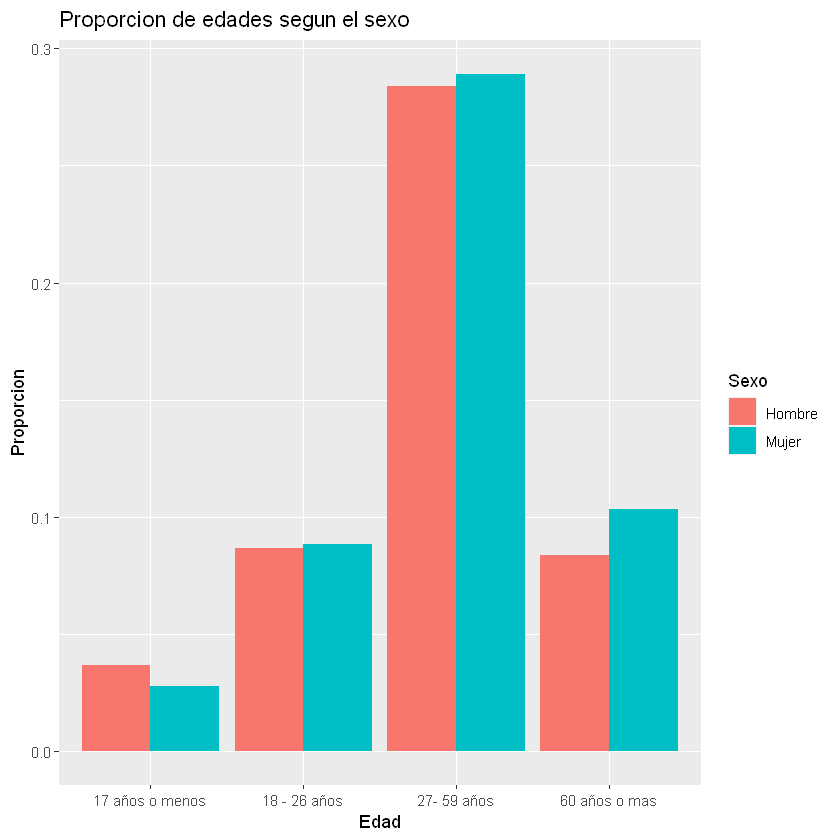

In [10]:
ggplot(sexo_edad, aes(x = Edad, y = Proporcion, fill = Sexo)) + 
  geom_bar(stat = "identity",position = 'dodge')+ 
  labs(title = "Proporcion de edades segun el sexo")

In [11]:
Edad=data.frame(svytable(~Rango_edad, diseño))
Edad=Edad %>% mutate(Proporcion=(Freq/sum(Freq))*100)
colnames(Edad)=c('Rango de Edad','Freq','Proporcion')
Edad

Rango de Edad,Freq,Proporcion
<fct>,<dbl>,<dbl>
17 años o menos,927150.6,6.465524
18 - 26 años,2512100.2,17.518236
27- 59 años,8220754.5,57.327777
60 años o mas,2679909.7,18.688463


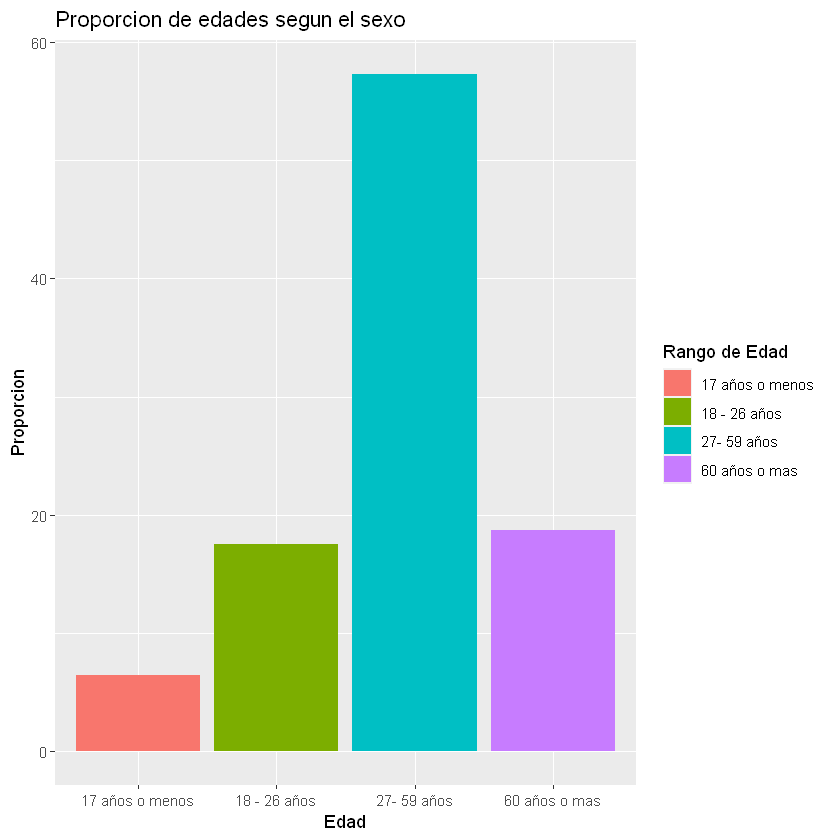

In [12]:
ggplot(Edad, aes(x = `Rango de Edad`, y = Proporcion, fill = `Rango de Edad`)) + 
  geom_bar(stat = "identity",position = 'dodge')+
  labs(title = "Proporcion de edades segun el sexo",x='Edad',y='Proporcion') 

In [13]:
rango_edad_macro=c(rep('17 años o menos',4)
,rep('18 - 26 años',4)
,rep('27- 59 años',4)
,rep('60 años o mas',4))

In [14]:
macrozona=c('Norte (Tarapacá, Antofagasta, Atacama, Coquimbo, Arica y Parinacota)'
,'Centro (Valparaíso, O’Higgins, Maule, Biobío)'
,'Sur (La Araucanía, Los Lagos, Aysén, Magallanes y Antártica, Arica y Parinacota)'
,'Metropolitana (Región Metropolitana)')

In [15]:
mac=c('Norte','Centro','Sur','Metropolitana')

In [16]:
edad_region=data.frame(macrozona,mac,rango_edad_macro,svytable(~interaction(Macrozona,Rango_edad), diseño))
colnames(edad_region)=c('Macrozona_Descripcion','Macrozona','Edad','Proporcion','Freq')
edad_region=edad_region %>% mutate(Proporcion=(Freq/sum(Freq))*100)
edad_region

Macrozona_Descripcion,Macrozona,Edad,Proporcion,Freq
<chr>,<chr>,<chr>,<dbl>,<dbl>
"Norte (Tarapacá, Antofagasta, Atacama, Coquimbo, Arica y Parinacota)",Norte,17 años o menos,1.6394989,235102.75
"Centro (Valparaíso, O’Higgins, Maule, Biobío)",Centro,17 años o menos,2.0040198,287374.74
"Sur (La Araucanía, Los Lagos, Aysén, Magallanes y Antártica, Arica y Parinacota)",Sur,17 años o menos,0.6149775,88187.25
Metropolitana (Región Metropolitana),Metropolitana,17 años o menos,2.2070275,316485.87
"Norte (Tarapacá, Antofagasta, Atacama, Coquimbo, Arica y Parinacota)",Norte,18 - 26 años,1.9175092,274969.20
"Centro (Valparaíso, O’Higgins, Maule, Biobío)",Centro,18 - 26 años,5.2420496,751705.46
"Sur (La Araucanía, Los Lagos, Aysén, Magallanes y Antártica, Arica y Parinacota)",Sur,18 - 26 años,2.2570111,323653.47
Metropolitana (Región Metropolitana),Metropolitana,18 - 26 años,8.1016661,1161772.03
"Norte (Tarapacá, Antofagasta, Atacama, Coquimbo, Arica y Parinacota)",Norte,27- 59 años,6.9613914,998257.61


In [17]:
edad_region %>% filter(Macrozona == mac[1]) %>% summarize(norte=sum(Proporcion),Total=sum(Freq))
edad_region %>% filter(Macrozona == mac[2]) %>% summarize(centro=sum(Proporcion),Total=sum(Freq))
edad_region %>% filter(Macrozona == mac[3]) %>% summarize(sur=sum(Proporcion),Total=sum(Freq))
edad_region %>% filter(Macrozona == mac[4]) %>% summarize(metropolitana=sum(Proporcion),Total=sum(Freq))


norte,Total
<dbl>,<dbl>
12.36873,1773665


centro,Total
<dbl>,<dbl>
32.99351,4731241


sur,Total
<dbl>,<dbl>
13.85388,1986634


metropolitana,Total
<dbl>,<dbl>
40.78389,5848375


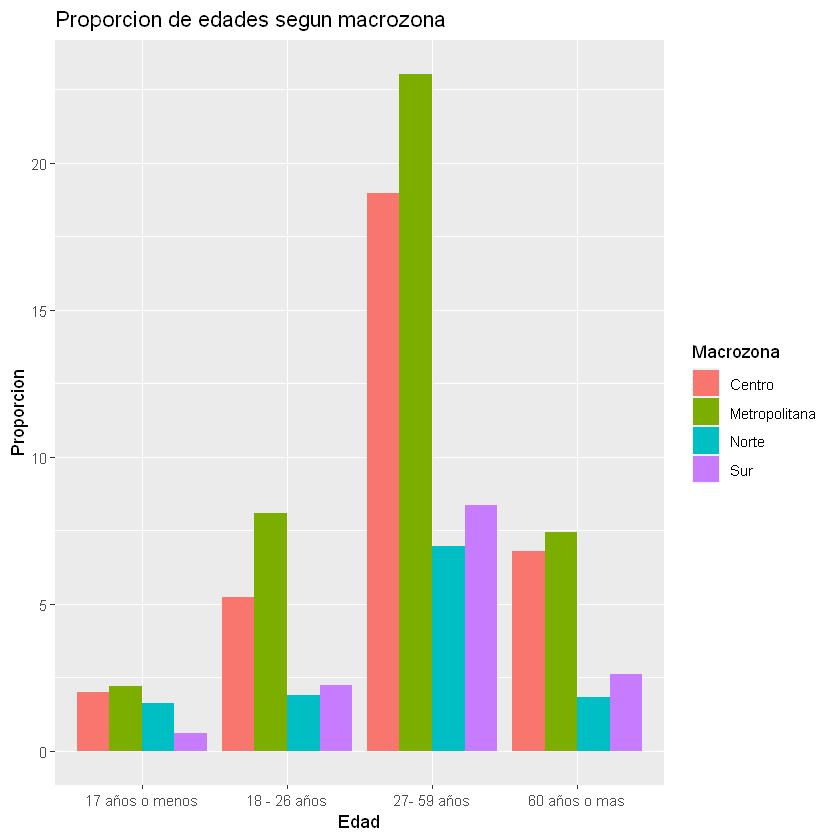

In [18]:
ggplot(edad_region, aes(x = Edad, y = Proporcion, fill = Macrozona)) + 
  geom_bar(stat = "identity",position = 'dodge')+
  labs(title = "Proporcion de edades segun macrozona",x='Edad',y='Proporcion') 

In [19]:
pueblos_indigenas=c(
'Aymara'
,'Rapa-Nui (Pascuense)'
,'Quechua'
,'Mapuche'
,'Atacameño (Linkán Antai)'
,'Coya'
,'Kawésqar (Alacalufes)'
,'Yagán (Yámana)'
,'Diaguita'
,'No pertenece a ningún pueblo indígena'
,'No sabe'
,'No responde')

In [20]:
Pueblos_indigenas=data.frame(pueblos_indigenas,svytable(~P1_5, diseño))
colnames(Pueblos_indigenas)=c('Pueblos indigenas','Proporcion','Freq')

Pueblos_indigenas=Pueblos_indigenas %>% mutate(Proporcion=(Freq/sum(Freq))*100)
Pueblos_indigenas

Pueblos indigenas,Proporcion,Freq
<chr>,<dbl>,<dbl>
Aymara,0.6284176574,90114.5579
Rapa-Nui (Pascuense),0.0254713385,3652.5683
Quechua,0.0792976970,11371.2224
Mapuche,5.9219803777,849206.9528
Atacameño (Linkán Antai),0.3247847428,46573.8561
Coya,0.1888311385,27078.2248
Kawésqar (Alacalufes),0.0005092862,73.0312
Yagán (Yámana),0.0626073440,8977.8399
Diaguita,0.4395673391,63033.5828


In [21]:
Pueblos_indigenas[order(Pueblos_indigenas$Proporcion,decreasing = TRUE), ]


,Pueblos indigenas,Proporcion,Freq
,<chr>,<dbl>,<dbl>
10,No pertenece a ningún pueblo indígena,86.5475517927,12410845.3666
4,Mapuche,5.9219803777,849206.9528
11,No sabe,3.8842610988,556999.7402
12,No responde,1.8967201874,271988.0628
1,Aymara,0.6284176574,90114.5579
9,Diaguita,0.4395673391,63033.5828
5,Atacameño (Linkán Antai),0.3247847428,46573.8561
6,Coya,0.1888311385,27078.2248
3,Quechua,0.0792976970,11371.2224


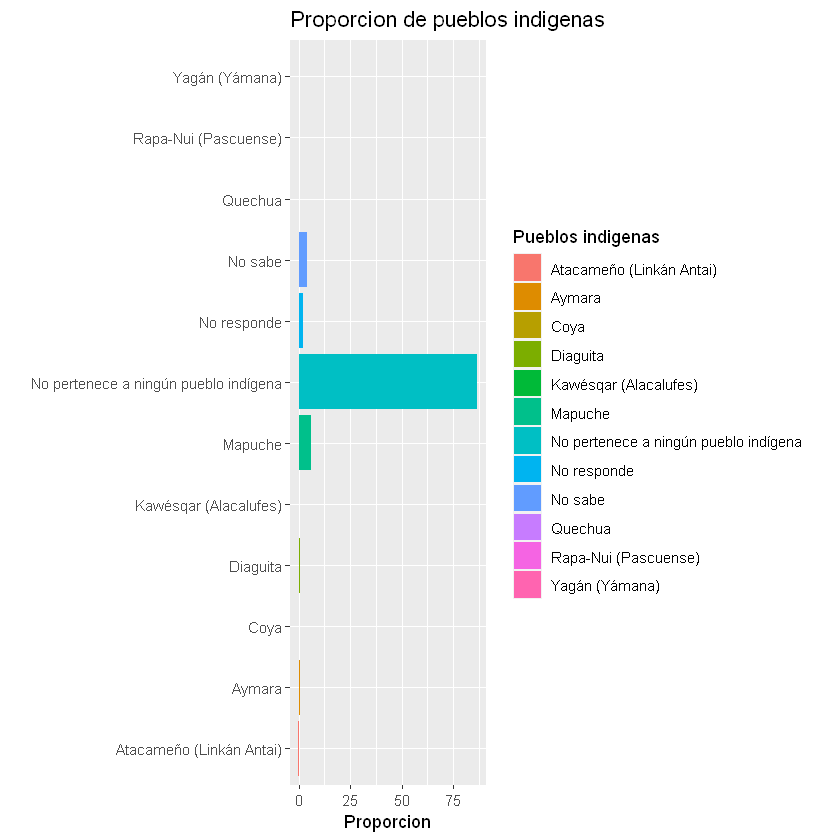

In [22]:
ggplot(Pueblos_indigenas, aes(x = `Pueblos indigenas`, y = Proporcion, fill = `Pueblos indigenas`)) + 
  geom_bar(stat = "identity",position = 'dodge') +  coord_flip()+
  labs(title = "Proporcion de pueblos indigenas",x='',y='Proporcion') 

In [23]:
mac=c(rep('Norte',12),rep('Centro',12),rep('Sur',12),rep('Metropolitana',12))
Pueblos_indigenas_macro=data.frame(mac,pueblos_indigenas,svytable(~interaction(P1_5,Macrozona), diseño))
colnames(Pueblos_indigenas_macro)=c('Macrozona','Pueblos indigenas','Proporcion','Freq')

Pueblos_indigenas_macro=Pueblos_indigenas_macro %>% mutate(Proporcion=(Freq/sum(Freq))*100)
Pueblos_indigenas_macro

Macrozona,Pueblos indigenas,Proporcion,Freq
<chr>,<chr>,<dbl>,<dbl>
Norte,Aymara,0.4415053455,63311.4913
Norte,Rapa-Nui (Pascuense),0.0000000000,0.0000
Norte,Quechua,0.0180058979,2582.0305
Norte,Mapuche,0.1932877034,27717.2924
Norte,Atacameño (Linkán Antai),0.1471620687,21102.9156
Norte,Coya,0.1802402054,25846.2923
Norte,Kawésqar (Alacalufes),0.0000000000,0.0000
Norte,Yagán (Yámana),0.0030557603,438.1934
Norte,Diaguita,0.4035629731,57870.5873


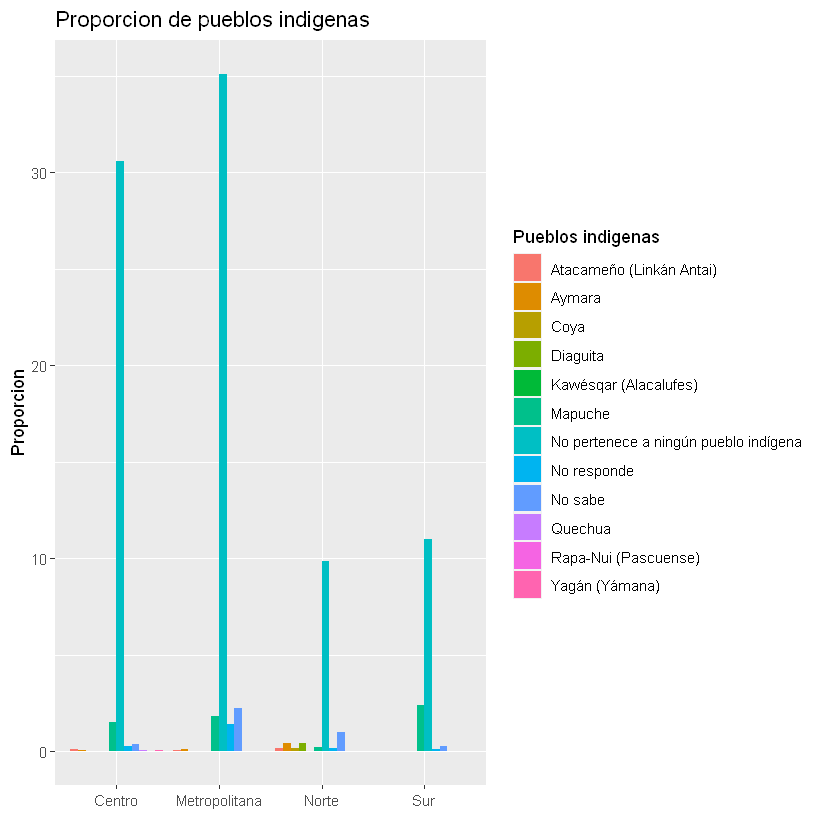

In [24]:
ggplot(Pueblos_indigenas_macro, aes(x =Macrozona , y = Proporcion, fill = `Pueblos indigenas` )) + 
  geom_bar(stat = "identity",position = 'dodge') +
  labs(title = "Proporcion de pueblos indigenas",x='',y='Proporcion') 

3. Analisis de las variables creadas (revisar manual de uso).

In [25]:
nivel_edu_encuestado=c(
"Educación Básica Completa o menos" #1
,"Educación Media Incompleta" #2
,"Educación Media Completa"  #3
,"Educación Superior Completa o menos") #9

In [26]:
Nee=data.frame('Nivel Educacional Encuestado'=nivel_edu_encuestado,svytable(~EDUC_ENCUESTADO2, diseño))
colnames(Nee)=c('Nivel Educacional Encuestado','Proporcion','Freq')

Nee=Nee %>% mutate(Proporcion=(Freq/sum(Freq))*100)
Nee

Nivel Educacional Encuestado,Proporcion,Freq
<chr>,<dbl>,<dbl>
Educación Básica Completa o menos,22.96025,3292480
Educación Media Incompleta,16.72094,2397768
Educación Media Completa,28.41032,4074015
Educación Superior Completa o menos,31.90850,4575651


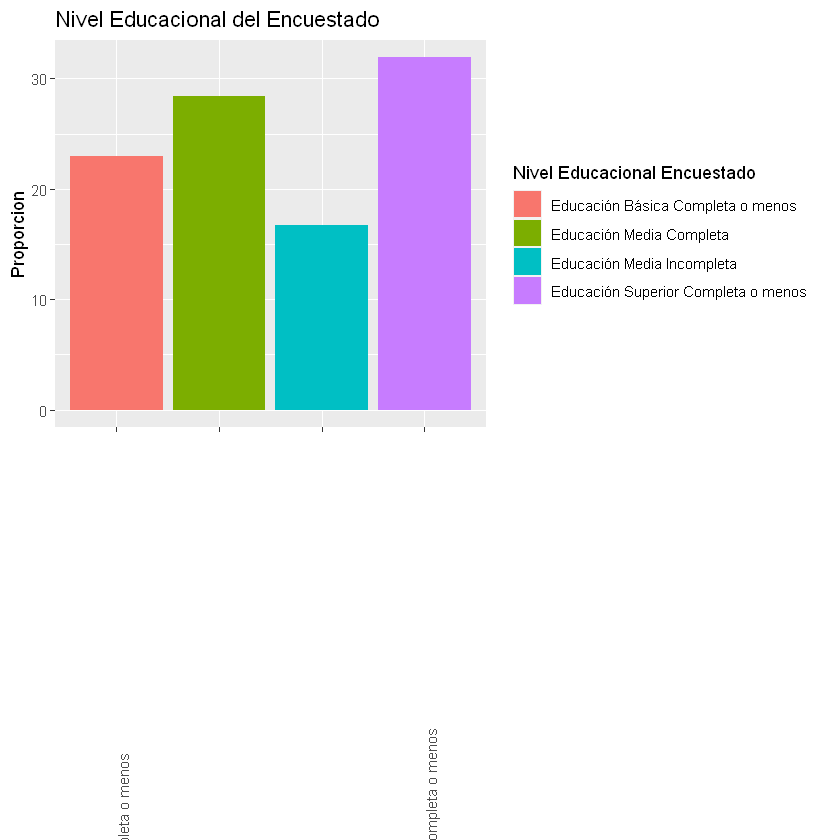

In [27]:
ggplot(Nee, aes(x =`Nivel Educacional Encuestado` , y = Proporcion, fill = `Nivel Educacional Encuestado` )) + 
  geom_bar(stat = "identity",position = 'dodge')  + 
  labs(title = "Nivel Educacional del Encuestado",x='',y='Proporcion') + theme(axis.text.x=element_text(angle=90, hjust=-1.5))

In [28]:
nivel_jefe=c(
'Educación Media incompleta o menos'
,'Educación Media completa'
,'Educación Superior incompleta o más'
,'No sabe o No responde')

In [29]:
escolaridad_jefe=data.frame('Nivel Educacional Jefe de hogar'=nivel_jefe,svytable(~EDUC_JH2, diseño))
colnames(escolaridad_jefe)=c('Nivel Educacional Jefe de hogar','Proporcion','Freq')

escolaridad_jefe=escolaridad_jefe %>% mutate(Proporcion=(Freq/sum(Freq))*100)
escolaridad_jefe

Nivel Educacional Jefe de hogar,Proporcion,Freq
<chr>,<dbl>,<dbl>
Educación Media incompleta o menos,37.199574,5334387
Educación Media completa,29.107636,4174010
Educación Superior incompleta o más,26.430433,3790102
No sabe o No responde,7.262357,1041416


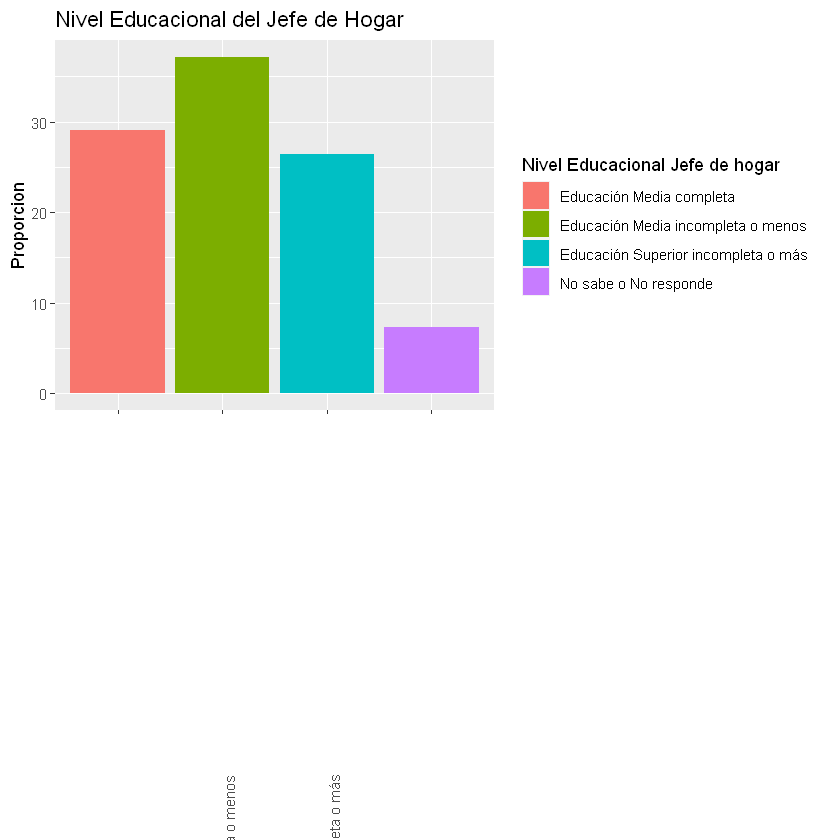

In [30]:
ggplot(escolaridad_jefe, aes(x =`Nivel Educacional Jefe de hogar` , y = Proporcion, fill = `Nivel Educacional Jefe de hogar` )) + 
  geom_bar(stat = "identity",position = 'dodge')  + 
  labs(title = "Nivel Educacional del Jefe de Hogar",x='',y='Proporcion') + theme(axis.text.x=element_text(angle=90, hjust=-1.5))

4. Analisis del ingreso mensual liquido de los hogares por macrozona, region y area (Urbano o Rural) y nivel educacional.

In [31]:
macrozona=c('Norte (Tarapacá, Antofagasta, Atacama, Coquimbo, Arica y Parinacota)'
,'Centro (Valparaíso, O’Higgins, Maule, Biobío)'
,'Sur (La Araucanía, Los Lagos, Aysén, Magallanes y Antártica, Arica y Parinacota)'
,'Metropolitana (Región Metropolitana)')

In [32]:
regiones=c('Tarapacá'
,'Antofagasta'
,'Atacama'
,'Coquimbo'
,'Valparaíso'
,'O’Higgins'
,'Maule'
,'Biobío'
,'La Araucanía'
,'Los Lagos'
,'Aysén'
,'Magallanes y Antártica'
,'Región Metropolitana'
,'Los Ríos'
,'Arica y Parinacota')
regiones=as.factor(regiones)

In [33]:
Ingresos=c('Menos de 77.000'
,'77.000 a 132.999'
,'133.000 a 214.999'
,'215.000 a 291.999'
,'292.000 a 378.999'
,'379.000 a 473.999'
,'474.000 a 598.999'
,'599.000 a 753.999'
,'754.000 a 1.015.999'
,'1.016.000 a 1.551.999'
,'1.552.000 o más'
,'No sabe'
,'No responde')

In [34]:
Ingreso_liquido=data.frame(svytable(~Ingreso_liquido,diseño))
Ingreso_liquido=Ingreso_liquido %>% mutate(Porcentaje=(Freq/sum(Freq))*100)
colnames(Ingreso_liquido)=c('Clase','Freq','Proporcion')
Ingreso_liquido

Clase,Freq,Proporcion
<fct>,<dbl>,<dbl>
AB,2292.197,0.01598473
C1a,114148.730,0.79602097
C1b,184571.702,1.28711852
C2,422556.572,2.94671601
C3,1233951.794,8.60501470
D,2161163.837,15.07096685
E,4678471.936,32.62552068
No Sabe o No responde,5542758.239,38.65265754


In [35]:
sum(Ingreso_liquido$Proporcion[1:3])

[1] 2.099124

In [36]:
mac=c(rep('Norte',13),rep('Centro',13),rep('Sur',13),rep('Metropolitana',13))

In [37]:
macro_ingreso=data.frame(Macrozona=mac,Ingresos=as.factor(Ingresos),svytotal(~interaction(P10_10,Macrozona), diseño))
rownames(macro_ingreso)=c()
macro_ingreso

Macrozona,Ingresos,total,SE
<chr>,<fct>,<dbl>,<dbl>
Norte,Menos de 77.000,13764.266,4025.776
Norte,77.000 a 132.999,33399.324,9709.168
Norte,133.000 a 214.999,84959.886,8798.197
Norte,215.000 a 291.999,97004.075,21004.302
Norte,292.000 a 378.999,166609.971,27969.579
Norte,379.000 a 473.999,128416.843,17089.484
Norte,474.000 a 598.999,133856.435,16121.355
Norte,599.000 a 753.999,237134.964,27981.447
Norte,754.000 a 1.015.999,275817.205,37839.753


In [38]:
Ingresos_total=data.frame(Ingresos=as.factor(Ingresos),svytable(~P10_10, diseño))
colnames(Ingresos_total)=c('Ingresos','Proporcion','Freq')
Ingresos_total=Ingresos_total %>% mutate(Proporcion=(Freq/sum(Freq))*100)
Ingresos_total

Ingresos,Proporcion,Freq
<fct>,<dbl>,<dbl>
Menos de 77.000,0.5852269,83921.03
77.000 a 132.999,2.6678624,382569.20
133.000 a 214.999,6.2780300,900264.16
215.000 a 291.999,6.8245482,978634.42
292.000 a 378.999,9.5918743,1375466.62
379.000 a 473.999,8.3805491,1201763.62
474.000 a 598.999,9.1717262,1315217.74
599.000 a 753.999,13.2158999,1895148.82
754.000 a 1.015.999,13.4250805,1925145.13


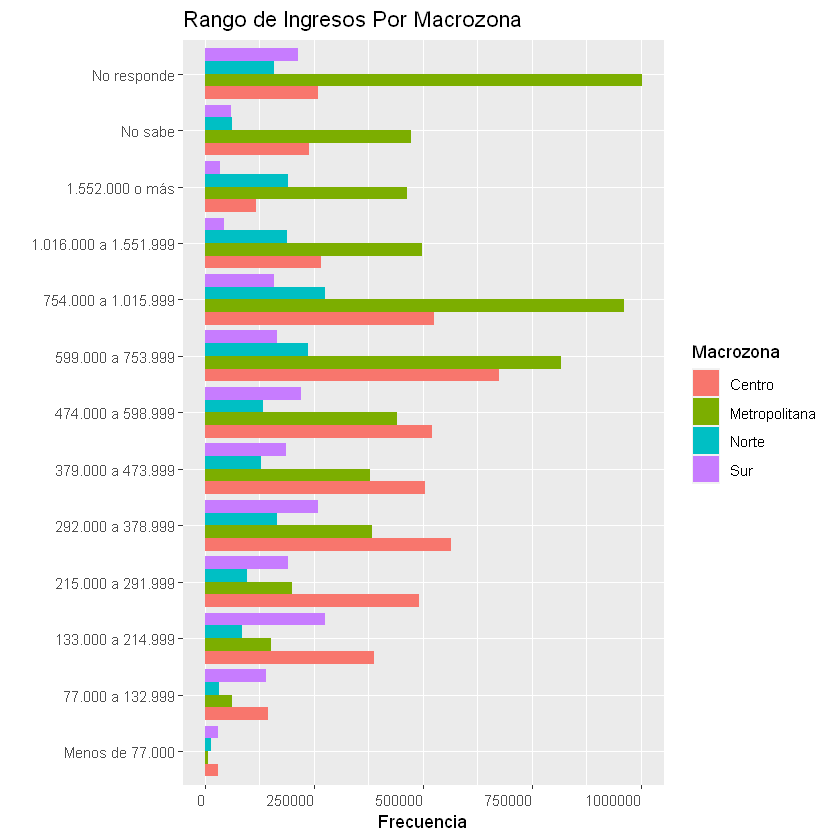

In [39]:
ggplot(macro_ingreso, aes(x =Ingresos , y = total, fill = Macrozona )) + 
  geom_bar(stat = "identity",position = 'dodge')  + coord_flip() +
  labs(title = "Rango de Ingresos Por Macrozona",x='',y='Frecuencia') +
  theme(axis.text.x=element_text(angle=0, hjust=1)) + 
  scale_x_discrete(limits = Ingresos) 

In [40]:
color_m=c('#00BFC4','#F8766D','#C77CFF','#7CAE00')
macro=c('Norte','Centro','Sur','Metropolitana')

In [41]:
tabla_macro_ingresos <- function(n) {    
tabla=macro_ingreso %>% filter(Macrozona == macro[n]) %>% mutate(Porcentaje_regional=(total/sum(total))*100)
tabla=tabla[order(tabla[,5],decreasing = TRUE),]
    return(tabla)
}

grafico_macro_ingresos <- function(n) {    
grafico=macro_ingreso %>% filter(Macrozona == macro[n]) %>% mutate(Porcentaje_regional=total/sum(total)) %>% 
ggplot(aes(x = Ingresos, y = Porcentaje_regional,fill=Macrozona)) +  
  theme(legend.position = "none")+ scale_fill_manual(values=c(color_m[n]))+ 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title =paste( "Rango de Ingresos de la Macrozona,\n",macro[n]),y='Proporcion',x='') + 
  scale_x_discrete(limits = Ingresos) 
return(grafico)
}

,Macrozona,Ingresos,total,SE,Porcentaje_regional
,<chr>,<fct>,<dbl>,<dbl>,<dbl>
9,Norte,754.000 a 1.015.999,275817.21,37839.753,15.5506933
8,Norte,599.000 a 753.999,237134.96,27981.447,13.3697718
11,Norte,1.552.000 o más,191702.29,18738.849,10.8082583
10,Norte,1.016.000 a 1.551.999,188870.09,32706.227,10.6485774
5,Norte,292.000 a 378.999,166609.97,27969.579,9.3935422
13,Norte,No responde,158939.15,17180.303,8.9610582
7,Norte,474.000 a 598.999,133856.43,16121.355,7.5468837
6,Norte,379.000 a 473.999,128416.84,17089.484,7.2401972
4,Norte,215.000 a 291.999,97004.08,21004.302,5.4691317


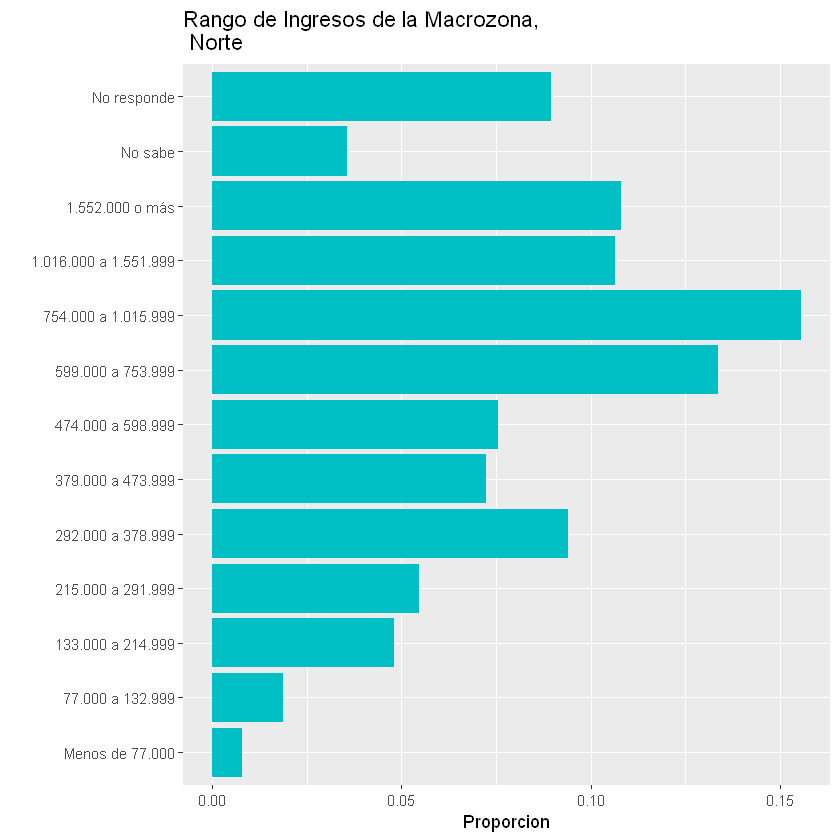

In [42]:
grafico_macro_ingresos(1)
tabla_macro_ingresos(1)

,Macrozona,Ingresos,total,SE,Porcentaje_regional
,<chr>,<fct>,<dbl>,<dbl>,<dbl>
8,Centro,599.000 a 753.999,674935.05,52862.151,14.265497
5,Centro,292.000 a 378.999,564692.60,60439.276,11.935401
9,Centro,754.000 a 1.015.999,526837.12,49361.570,11.135284
7,Centro,474.000 a 598.999,520413.98,46855.408,10.999524
6,Centro,379.000 a 473.999,505685.27,41225.435,10.688216
4,Centro,215.000 a 291.999,491012.07,35467.633,10.378082
3,Centro,133.000 a 214.999,387590.78,36331.186,8.192159
10,Centro,1.016.000 a 1.551.999,267674.06,32830.977,5.657587
13,Centro,No responde,260508.13,34983.997,5.506127


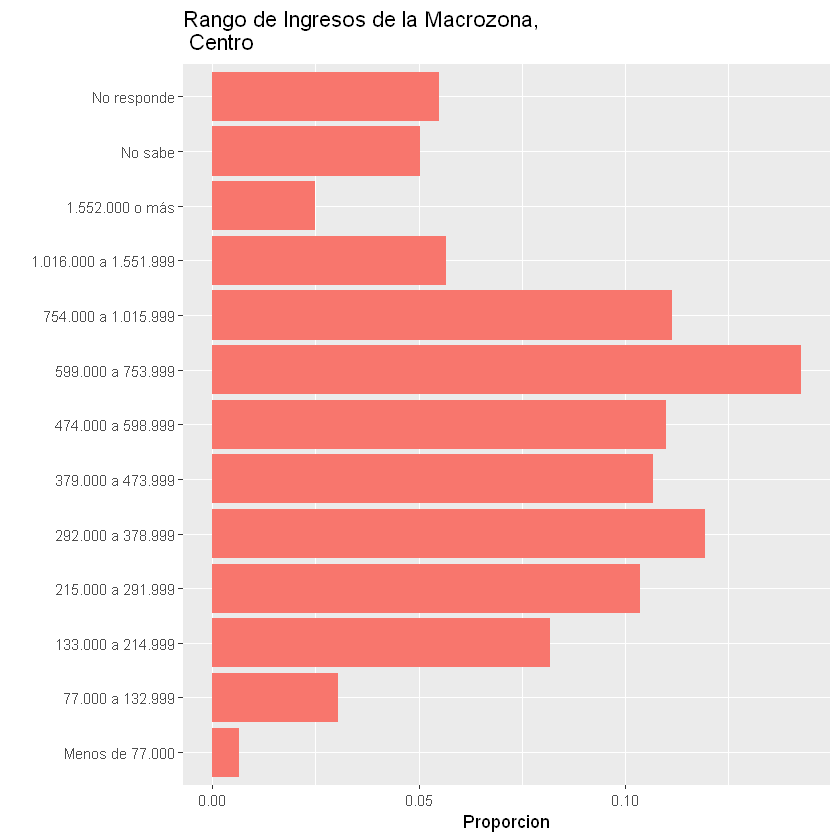

In [43]:
grafico_macro_ingresos(2)
tabla_macro_ingresos(2)

,Macrozona,Ingresos,total,SE,Porcentaje_regional
,<chr>,<fct>,<dbl>,<dbl>,<dbl>
3,Sur,133.000 a 214.999,275982.93,31889.59,13.891987
5,Sur,292.000 a 378.999,259549.22,26685.84,13.064773
7,Sur,474.000 a 598.999,220028.10,36421.36,11.075422
13,Sur,No responde,214941.84,21039.25,10.819398
4,Sur,215.000 a 291.999,190164.41,20200.94,9.572191
6,Sur,379.000 a 473.999,187504.82,19318.46,9.438317
8,Sur,599.000 a 753.999,166458.23,27113.56,8.378908
9,Sur,754.000 a 1.015.999,159836.68,29284.15,8.045603
2,Sur,77.000 a 132.999,140623.72,22923.16,7.078492


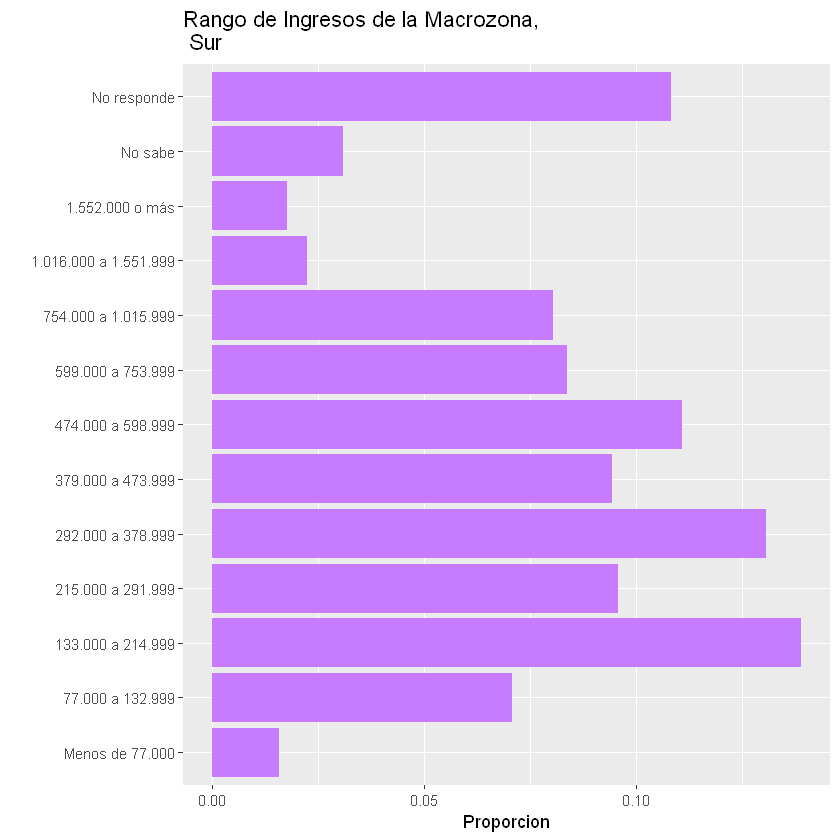

In [44]:
grafico_macro_ingresos(3)
tabla_macro_ingresos(3)

,Macrozona,Ingresos,total,SE,Porcentaje_regional
,<chr>,<fct>,<dbl>,<dbl>,<dbl>
13,Metropolitana,No responde,1003737.802,102823.690,17.1626785
9,Metropolitana,754.000 a 1.015.999,962654.132,93552.604,16.4601984
8,Metropolitana,599.000 a 753.999,816620.575,89477.406,13.9632047
10,Metropolitana,1.016.000 a 1.551.999,498936.428,68685.120,8.5311976
12,Metropolitana,No sabe,472098.972,53628.148,8.0723102
11,Metropolitana,1.552.000 o más,464504.509,40476.220,7.9424542
7,Metropolitana,474.000 a 598.999,440919.218,42901.192,7.5391749
5,Metropolitana,292.000 a 378.999,384614.820,44193.914,6.5764391
6,Metropolitana,379.000 a 473.999,380156.694,59436.373,6.5002106


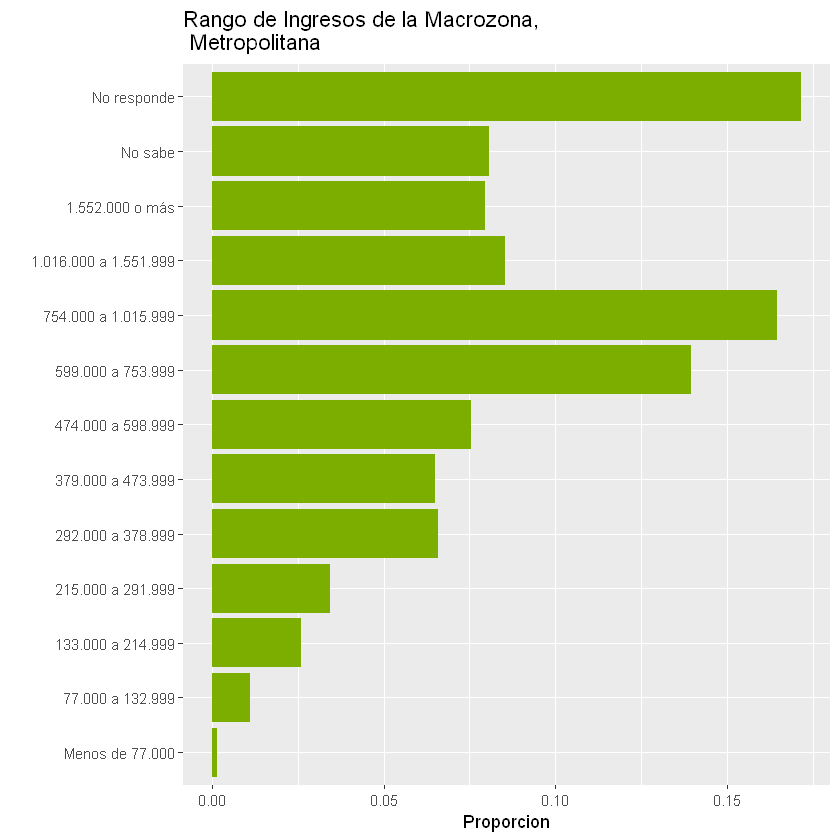

In [45]:
grafico_macro_ingresos(4)
tabla_macro_ingresos(4)

In [46]:
Ingresos_region=c(rep('Menos de 77.000',15)
,rep('77.000 a 132.999',15)
,rep('133.000 a 214.999',15)
,rep('215.000 a 291.999',15)
,rep('292.000 a 378.999',15)
,rep('379.000 a 473.999',15)
,rep('474.000 a 598.999',15)
,rep('599.000 a 753.999',15)
,rep('754.000 a 1.015.999',15)
,rep('1.016.000 a 1.551.999',15)
,rep('1.552.000 o más',15)
,rep('No sabe',15)
,rep('No responde',15))

In [47]:
region_ingreso=data.frame(Region=regiones,'Ingresos'=Ingresos_region,svytotal(~interaction(Region,P10_10), diseño))
rownames(region_ingreso)=c()
head(region_ingreso)

,Region,Ingresos,total,SE
,<fct>,<chr>,<dbl>,<dbl>
1,Tarapacá,Menos de 77.000,1251.993,885.6563
2,Antofagasta,Menos de 77.000,0.000,0.0000
3,Atacama,Menos de 77.000,1105.324,944.0520
4,Coquimbo,Menos de 77.000,8652.876,3676.7246
5,Valparaíso,Menos de 77.000,4341.625,3153.5571
6,O’Higgins,Menos de 77.000,3348.189,1972.7385


In [48]:
pir=function(n) { 
tabla=region_ingreso %>% filter(Region == regiones[n]) %>% summarize(
    Region=regiones[n],Proporcion=total) %>% summarise(Region=regiones[n],Total=sum(Proporcion))
return(tabla)
}
region_total=rbind(pir(1),pir(2),pir(3),pir(4),pir(5),pir(6),pir(7),pir(8),pir(9),pir(10),pir(11),pir(12),pir(13),pir(14),pir(15))
pregional=region_total[order(region_total[,2],decreasing = TRUE),]
pregional=data.frame(pregional$Region,pregional$Total,pregional$Total/sum(pregional$Total)*100)
colnames(pregional)=c('Region','Frecuencia','Proporcion')
pregional

Region,Frecuencia,Proporcion
<fct>,<dbl>,<dbl>
Región Metropolitana,5848375,40.7838889
Biobío,1695343,11.8225457
Valparaíso,1471962,10.2647889
Maule,833828,5.8147346
La Araucanía,786773,5.4865946
O’Higgins,730108,5.0914388
Los Lagos,660124,4.6034025
Coquimbo,608615,4.2442023
Antofagasta,482565,3.3651873


In [49]:
sum(pregional$Frecuencia)

[1] 14339915

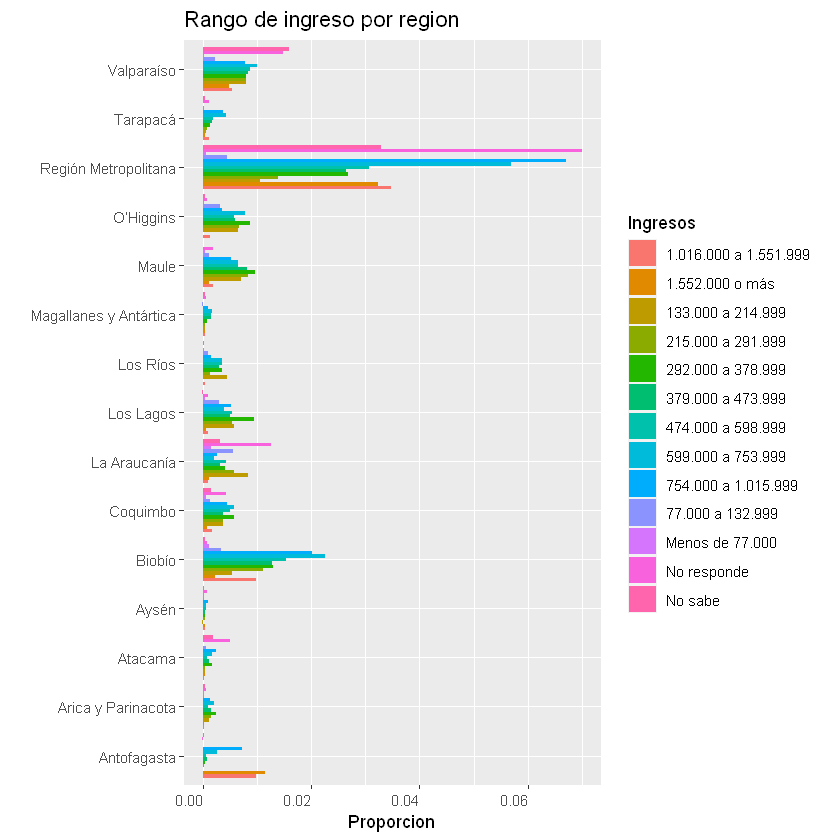

In [50]:
ggplot(region_ingreso, aes(x = Region  , y = total/sum(total), fill = Ingresos )) + 
  geom_bar(stat = "identity",position = 'dodge')  + coord_flip() +
  labs(title = "Rango de ingreso por region",x='',y='Proporcion') + theme(axis.text.x=element_text(angle=0, hjust=1))

In [51]:
color_region=c('#f8766d','#e58700','#c99800','#a3a500','#6bb100',
                '#00ba38','#00bf7d','#00c0af','#00bcd8','#00b0f6','#619cff','#b983ff','#e76bf3','#fd61d1','#ff67a4')

In [52]:
ingreso_region_f <- function(n) {    
tabla=region_ingreso %>% filter(Region == regiones[n])%>% mutate(Porcentaje_regional=(total/sum(total))*100)
return(tabla)
}

grafico_region_ingresos <- function(n) {    
grafico=region_ingreso %>% filter(Region == regiones[n]) %>% mutate(Porcentaje_regional=(total/sum(total))*100) %>% 
ggplot(aes(x = Ingresos, y = Porcentaje_regional/100,fill=Region)) +  
  theme(legend.position = "none")+ scale_fill_manual(values=c(color_region[n]))+ 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title =paste( "Rango de Ingresos de la Region de",regiones[n]),y='Porcentaje',x='') + 
  scale_x_discrete(limits = Ingresos) 
return(grafico)
}

Region,Ingresos,total,SE,Porcentaje_regional
<fct>,<chr>,<dbl>,<dbl>,<dbl>
Tarapacá,Menos de 77.000,1251.993,885.6563,0.4906543
Tarapacá,77.000 a 132.999,2629.629,619.6351,1.0305481
Tarapacá,133.000 a 214.999,7708.268,2057.3902,3.0208599
Tarapacá,215.000 a 291.999,11426.144,1955.9263,4.4778906
Tarapacá,292.000 a 378.999,19520.138,3516.3776,7.6499162
Tarapacá,379.000 a 473.999,23888.479,1987.0194,9.3618632
Tarapacá,474.000 a 598.999,25906.670,6378.4815,10.1527897
Tarapacá,599.000 a 753.999,62470.148,17023.9186,24.4819681
Tarapacá,754.000 a 1.015.999,53498.702,11228.9747,20.9660703


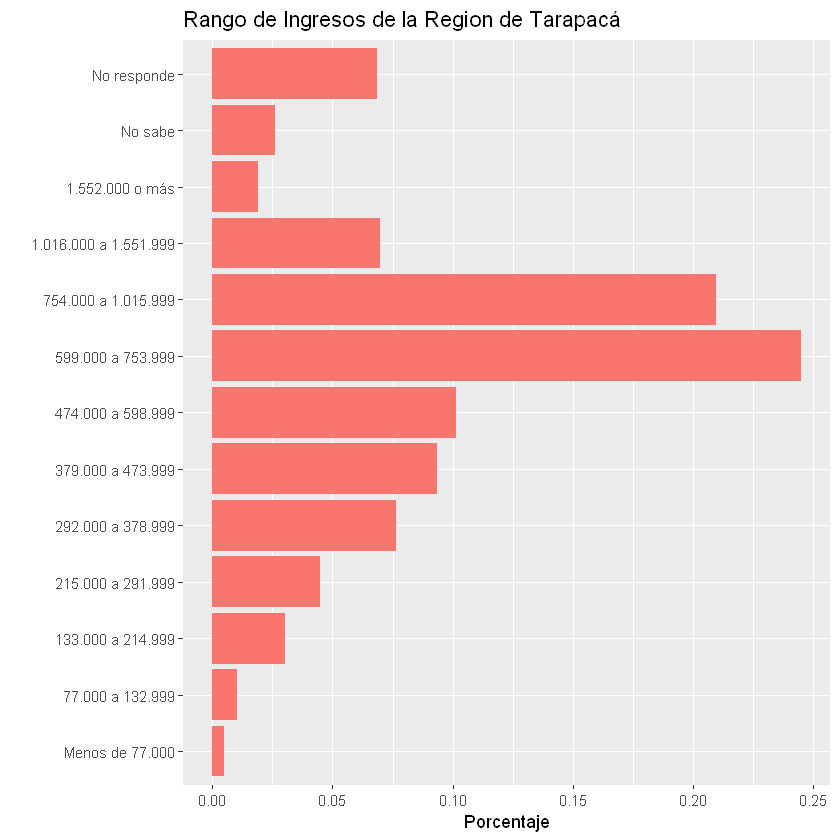

In [53]:
n=1
ingreso_region_f(n)
grafico_region_ingresos(n)

Region,Ingresos,total,SE,Porcentaje_regional
<fct>,<chr>,<dbl>,<dbl>,<dbl>
Antofagasta,Menos de 77.000,0.0000,0.0000,0.0000000
Antofagasta,77.000 a 132.999,0.0000,0.0000,0.0000000
Antofagasta,133.000 a 214.999,184.6236,184.6236,0.0382588
Antofagasta,215.000 a 291.999,3391.5035,3391.5035,0.7028076
Antofagasta,292.000 a 378.999,4902.2756,4162.0725,1.0158788
Antofagasta,379.000 a 473.999,12545.2050,7466.9130,2.5996923
Antofagasta,474.000 a 598.999,9931.6840,5144.0051,2.0581028
Antofagasta,599.000 a 753.999,38160.1536,18758.9896,7.9077748
Antofagasta,754.000 a 1.015.999,103611.0482,20979.0143,21.4708999


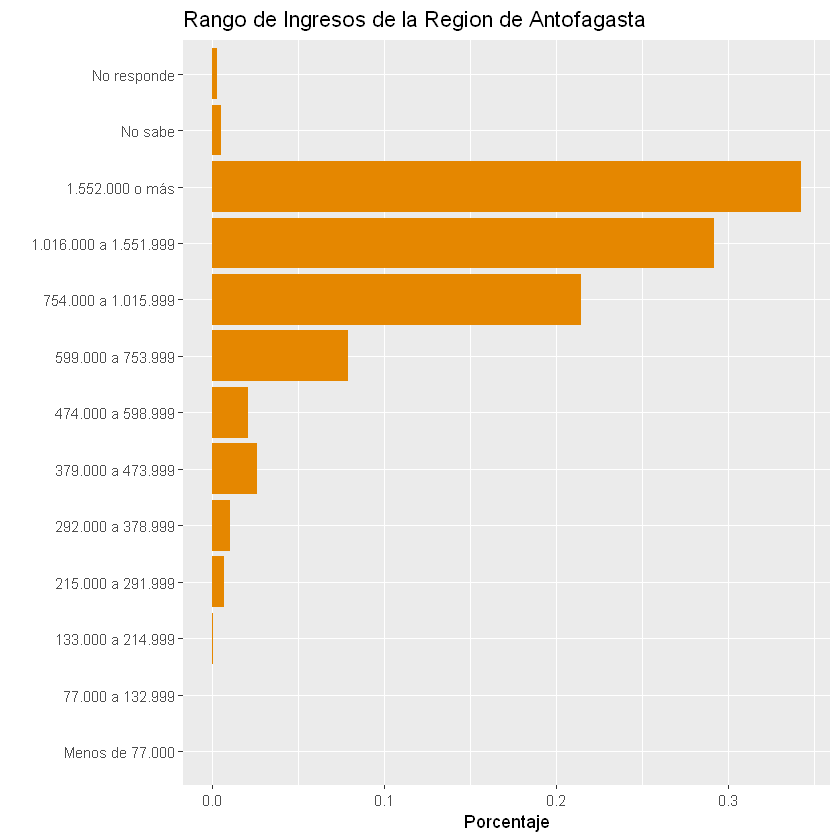

In [54]:
n=2
ingreso_region_f(n)
grafico_region_ingresos(n)

Region,Ingresos,total,SE,Porcentaje_regional
<fct>,<chr>,<dbl>,<dbl>,<dbl>
Atacama,Menos de 77.000,1105.324,944.0520,0.4581425
Atacama,77.000 a 132.999,8133.109,3615.4232,3.3710694
Atacama,133.000 a 214.999,5860.365,1738.9665,2.4290459
Atacama,215.000 a 291.999,5185.083,2343.4303,2.1491504
Atacama,292.000 a 378.999,23559.713,15666.5020,9.7651986
Atacama,379.000 a 473.999,17017.626,11718.5697,7.0535875
Atacama,474.000 a 598.999,12570.951,5833.2960,5.2104977
Atacama,599.000 a 753.999,23534.521,6565.3323,9.7547566
Atacama,754.000 a 1.015.999,34654.945,24209.4719,14.3640294


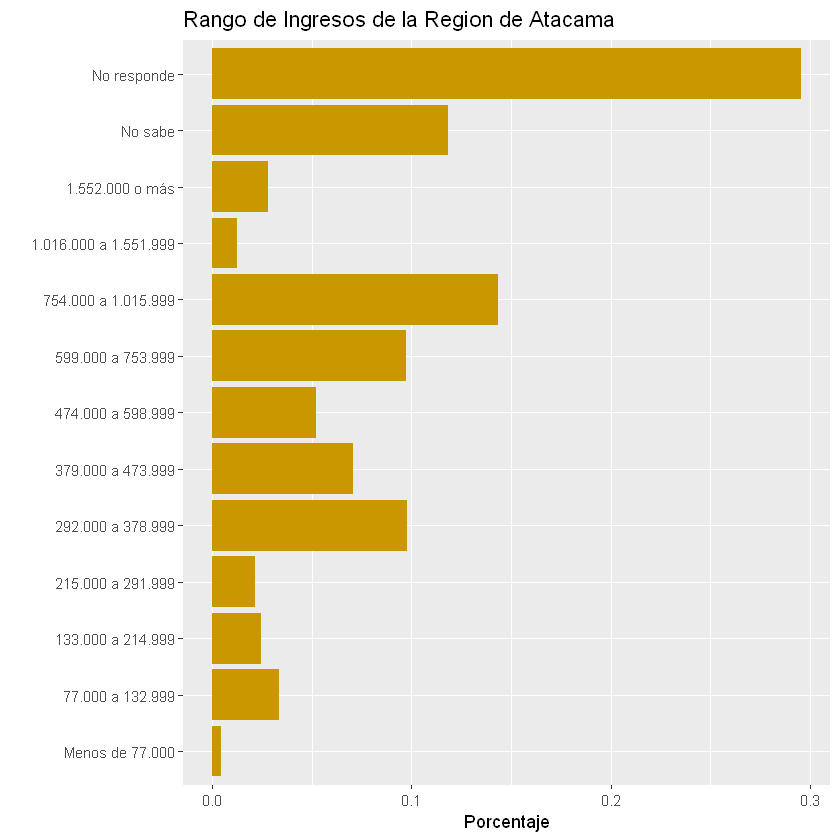

In [55]:
n=3
ingreso_region_f(n)
grafico_region_ingresos(n)

Region,Ingresos,total,SE,Porcentaje_regional
<fct>,<chr>,<dbl>,<dbl>,<dbl>
Coquimbo,Menos de 77.000,8652.876,3676.725,1.421732
Coquimbo,77.000 a 132.999,18068.677,8823.790,2.968819
Coquimbo,133.000 a 214.999,53935.217,6634.450,8.861960
Coquimbo,215.000 a 291.999,54842.713,19593.268,9.011068
Coquimbo,292.000 a 378.999,83506.945,22189.329,13.720816
Coquimbo,379.000 a 473.999,53062.566,5948.795,8.718577
Coquimbo,474.000 a 598.999,71175.910,12347.432,11.694735
Coquimbo,599.000 a 753.999,83988.483,8555.168,13.799936
Coquimbo,754.000 a 1.015.999,63520.731,16033.087,10.436932


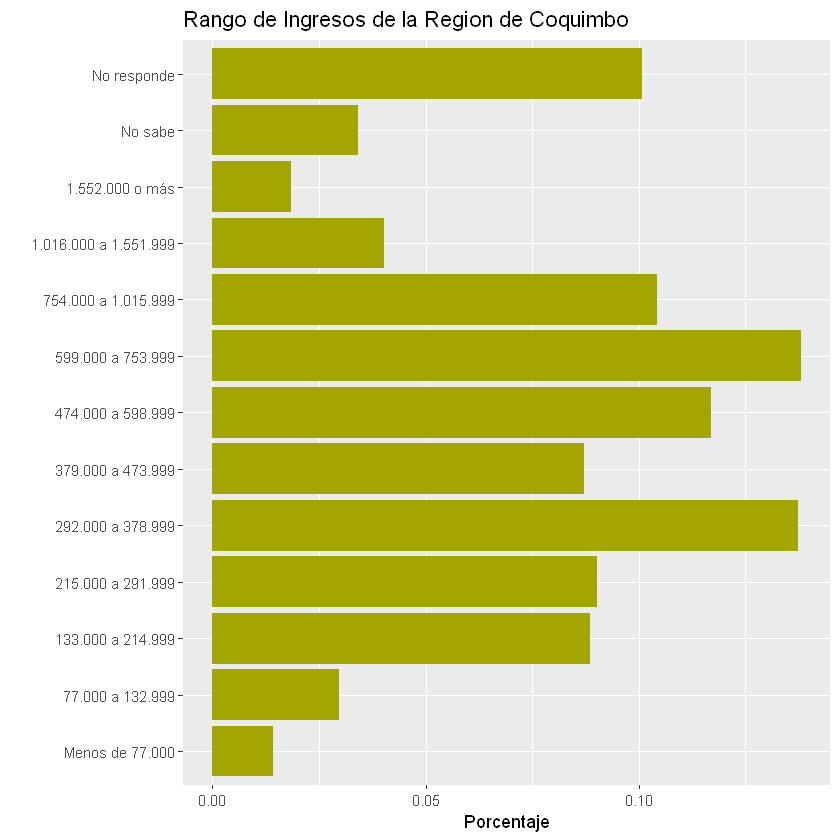

In [56]:
n=4
ingreso_region_f(n)
grafico_region_ingresos(n)

Region,Ingresos,total,SE,Porcentaje_regional
<fct>,<chr>,<dbl>,<dbl>,<dbl>
Valparaíso,Menos de 77.000,4341.625,3153.557,0.2949549
Valparaíso,77.000 a 132.999,33646.520,6472.063,2.2858280
Valparaíso,133.000 a 214.999,115172.822,13332.109,7.8244426
Valparaíso,215.000 a 291.999,114629.532,15321.067,7.7875334
Valparaíso,292.000 a 378.999,114600.946,12488.660,7.7855914
Valparaíso,379.000 a 473.999,120851.975,26501.219,8.2102646
Valparaíso,474.000 a 598.999,124683.424,16160.832,8.4705600
Valparaíso,599.000 a 753.999,144058.141,23027.143,9.7868111
Valparaíso,754.000 a 1.015.999,112507.857,15548.195,7.6433941


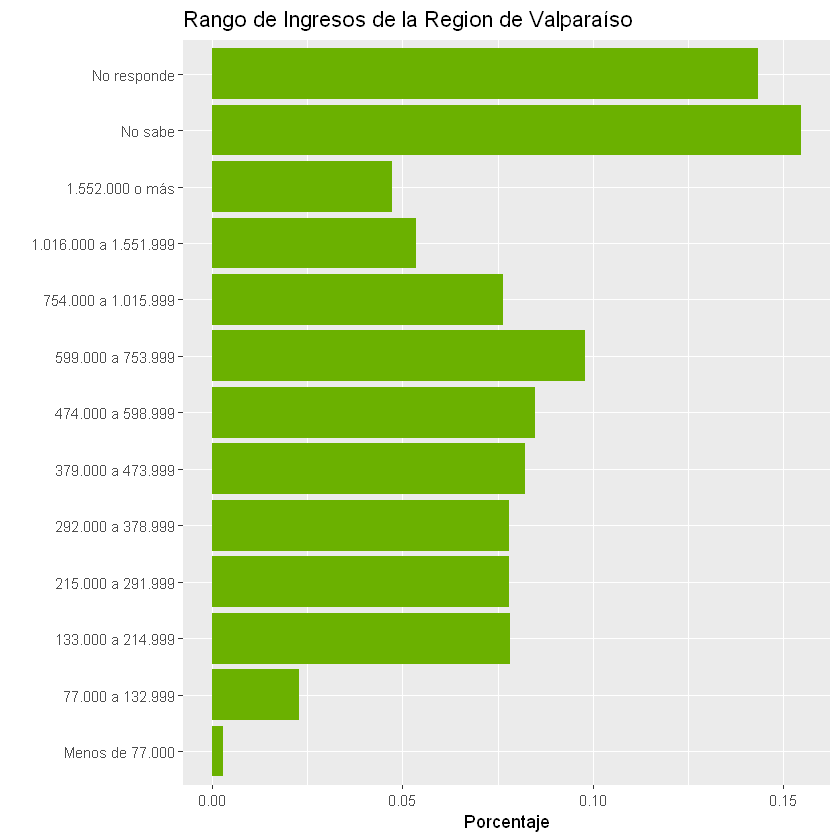

In [57]:
n=5
ingreso_region_f(n)
grafico_region_ingresos(n)

Region,Ingresos,total,SE,Porcentaje_regional
<fct>,<chr>,<dbl>,<dbl>,<dbl>
O’Higgins,Menos de 77.000,3348.189,1972.739,0.4585882
O’Higgins,77.000 a 132.999,45373.912,13058.914,6.2146850
O’Higgins,133.000 a 214.999,93531.626,24686.356,12.8106562
O’Higgins,215.000 a 291.999,95846.667,13766.225,13.1277382
O’Higgins,292.000 a 378.999,125764.747,40760.458,17.2254991
O’Higgins,379.000 a 473.999,84175.813,8180.460,11.5292275
O’Higgins,474.000 a 598.999,84037.771,25140.592,11.5103206
O’Higgins,599.000 a 753.999,112028.576,26204.982,15.3441102
O’Higgins,754.000 a 1.015.999,50205.035,4768.071,6.8763848


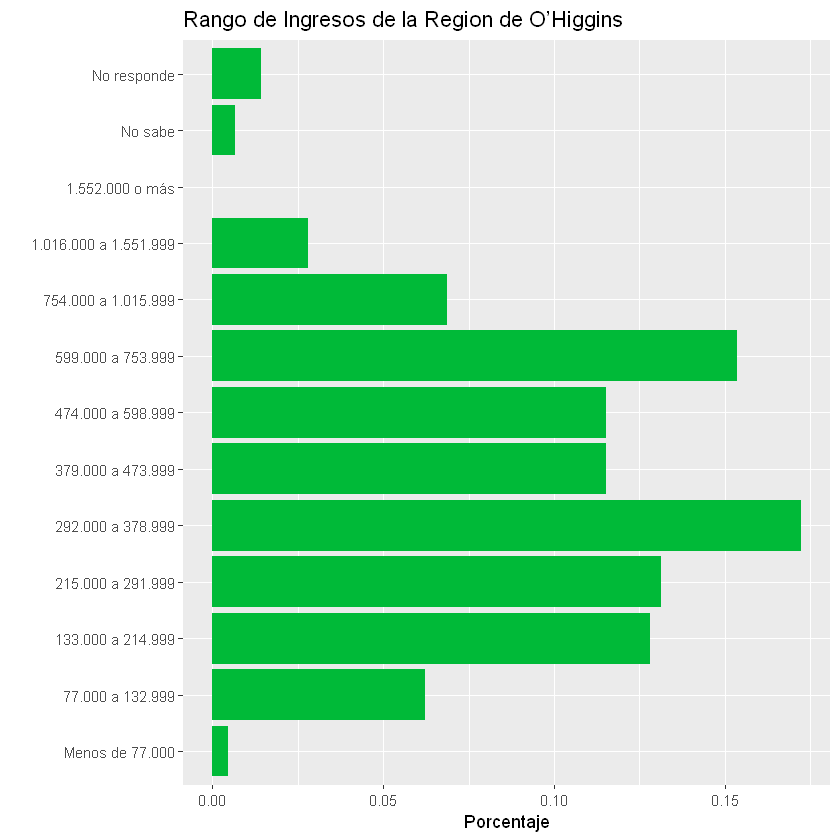

In [58]:
n=6
ingreso_region_f(n)
grafico_region_ingresos(n)

Region,Ingresos,total,SE,Porcentaje_regional
<fct>,<chr>,<dbl>,<dbl>,<dbl>
Maule,Menos de 77.000,6172.502,2571.954,0.7402608
Maule,77.000 a 132.999,16764.137,3005.401,2.0105030
Maule,133.000 a 214.999,100572.261,19052.109,12.0615116
Maule,215.000 a 291.999,120762.750,16512.443,14.4829330
Maule,292.000 a 378.999,138336.540,27153.385,16.5905367
Maule,379.000 a 473.999,117556.389,14233.287,14.0983979
Maule,474.000 a 598.999,92395.985,13639.745,11.0809406
Maule,599.000 a 753.999,93952.782,25299.888,11.2676453
Maule,754.000 a 1.015.999,75920.950,21075.443,9.1051092


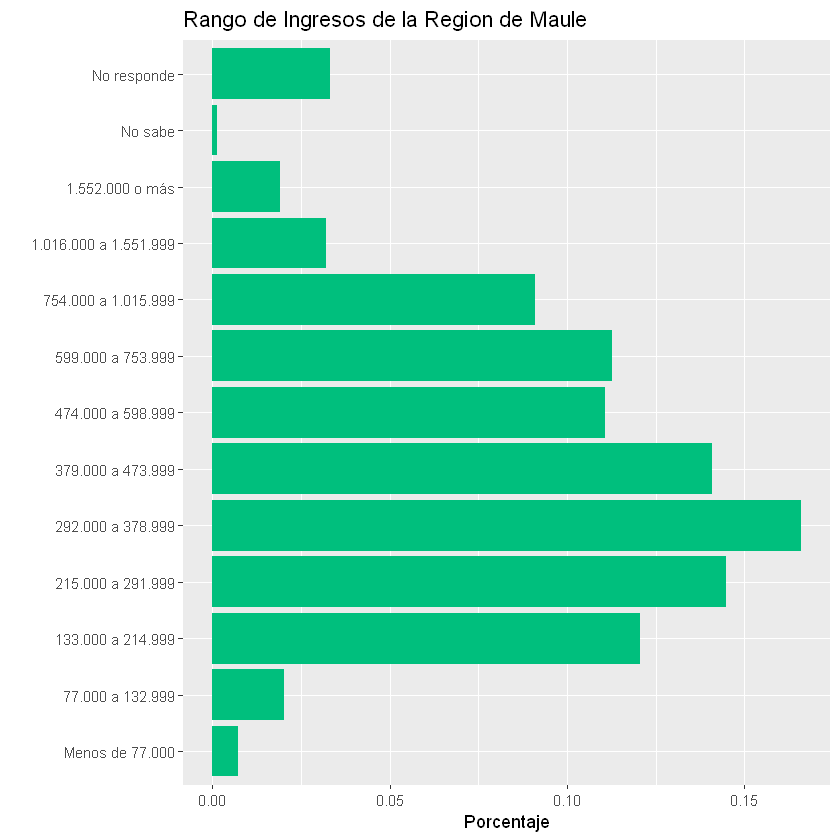

In [59]:
n=7
ingreso_region_f(n)
grafico_region_ingresos(n)

Region,Ingresos,total,SE,Porcentaje_regional
<fct>,<chr>,<dbl>,<dbl>,<dbl>
Biobío,Menos de 77.000,16946.577,6205.198,0.9995958
Biobío,77.000 a 132.999,48958.497,14821.150,2.8878225
Biobío,133.000 a 214.999,78314.075,13031.152,4.6193646
Biobío,215.000 a 291.999,159773.124,23686.455,9.4242359
Biobío,292.000 a 378.999,185990.369,33139.376,10.9706631
Biobío,379.000 a 473.999,183101.089,26976.203,10.8002386
Biobío,474.000 a 598.999,219296.799,33409.052,12.9352467
Biobío,599.000 a 753.999,324895.548,30616.535,19.1640009
Biobío,754.000 a 1.015.999,288203.279,41568.130,16.9997032


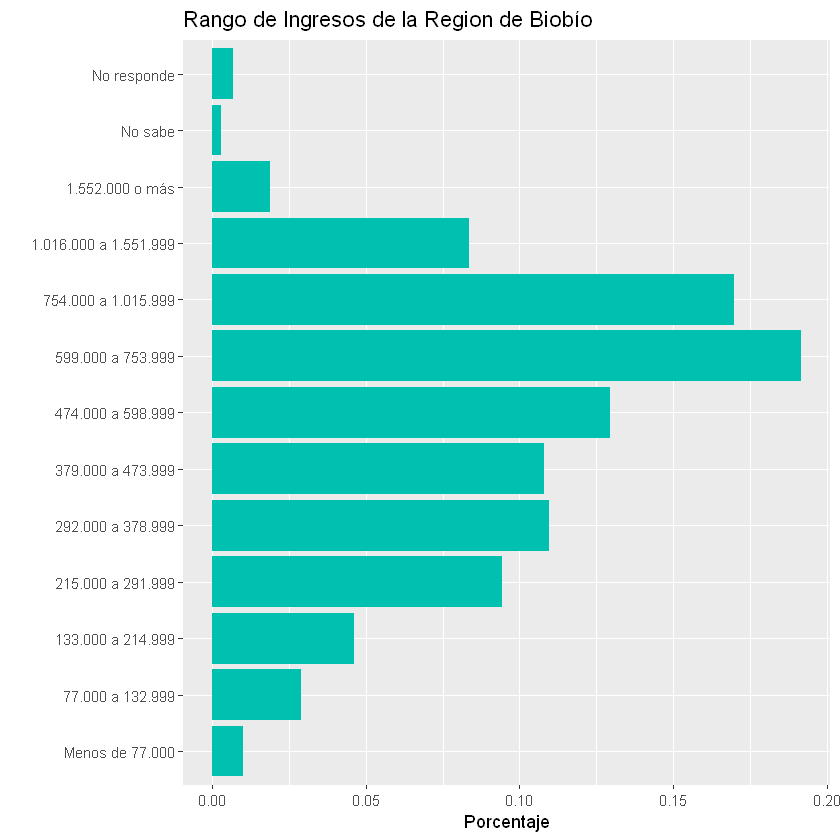

In [60]:
n=8
ingreso_region_f(n)
grafico_region_ingresos(n)

Region,Ingresos,total,SE,Porcentaje_regional
<fct>,<chr>,<dbl>,<dbl>,<dbl>
La Araucanía,Menos de 77.000,21038.37,10782.482,2.674007
La Araucanía,77.000 a 132.999,80143.74,15566.606,10.186387
La Araucanía,133.000 a 214.999,120217.60,20165.014,15.279832
La Araucanía,215.000 a 291.999,81740.11,12454.413,10.389288
La Araucanía,292.000 a 378.999,58015.83,10327.514,7.373897
La Araucanía,379.000 a 473.999,45016.20,11390.985,5.721625
La Araucanía,474.000 a 598.999,60964.03,22385.929,7.748618
La Araucanía,599.000 a 753.999,28556.44,6309.194,3.629566
La Araucanía,754.000 a 1.015.999,36637.42,9723.763,4.656670


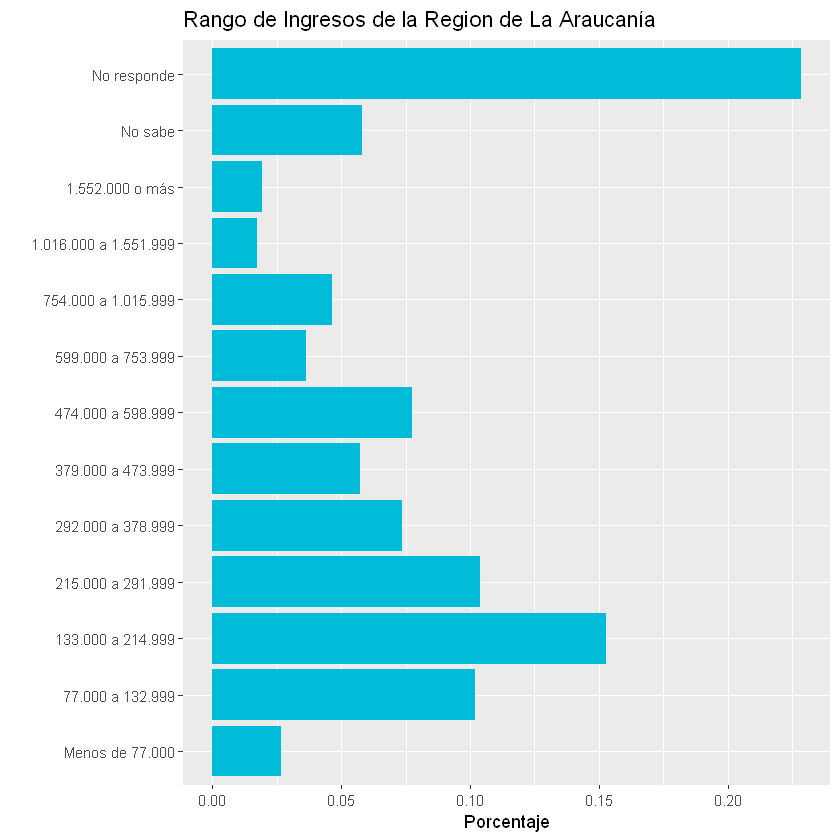

In [61]:
n=9
ingreso_region_f(n)
grafico_region_ingresos(n)

Region,Ingresos,total,SE,Porcentaje_regional
<fct>,<chr>,<dbl>,<dbl>,<dbl>
Los Lagos,Menos de 77.000,5281.665,1696.478,0.8001020
Los Lagos,77.000 a 132.999,42120.769,15541.691,6.3807360
Los Lagos,133.000 a 214.999,83321.111,21602.687,12.6220394
Los Lagos,215.000 a 291.999,77144.580,14838.252,11.6863772
Los Lagos,292.000 a 378.999,135840.595,23755.891,20.5780422
Los Lagos,379.000 a 473.999,71107.695,14032.014,10.7718694
Los Lagos,474.000 a 598.999,77611.487,24921.952,11.7571072
Los Lagos,599.000 a 753.999,55485.169,15951.306,8.4052646
Los Lagos,754.000 a 1.015.999,74522.445,20336.121,11.2891586


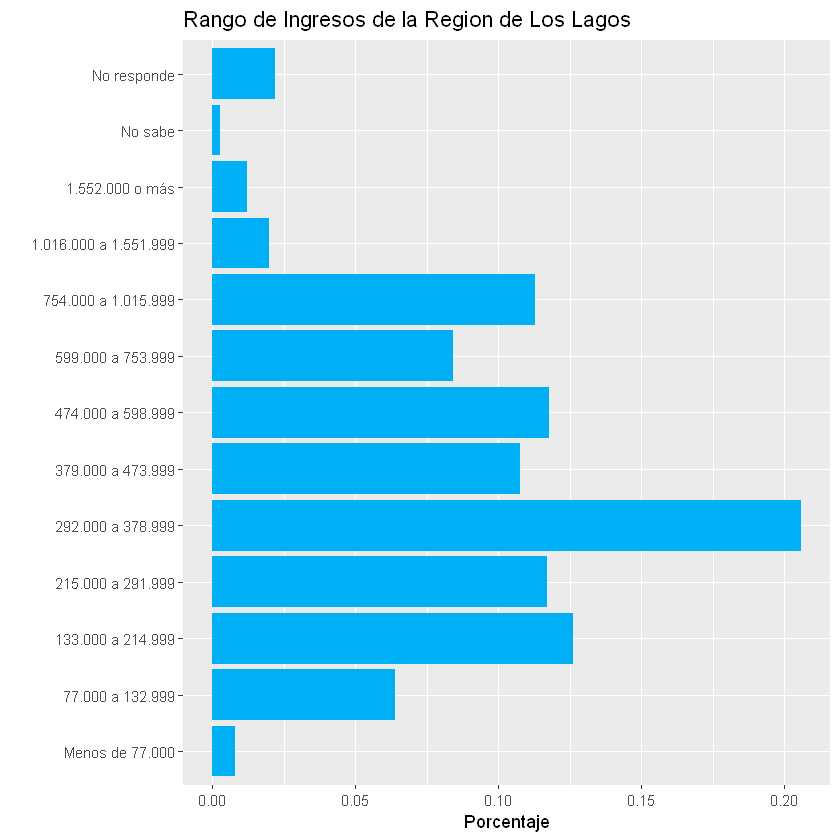

In [62]:
n=10
ingreso_region_f(n)
grafico_region_ingresos(n)

Region,Ingresos,total,SE,Porcentaje_regional
<fct>,<chr>,<dbl>,<dbl>,<dbl>
Aysén,Menos de 77.000,2539.572,1733.5861,3.033773
Aysén,77.000 a 132.999,2629.089,493.3517,3.140711
Aysén,133.000 a 214.999,1748.228,399.3934,2.088434
Aysén,215.000 a 291.999,6197.727,2450.4791,7.403808
Aysén,292.000 a 378.999,5333.867,2789.6142,6.371839
Aysén,379.000 a 473.999,5792.978,3526.3706,6.920294
Aysén,474.000 a 598.999,8155.529,2323.3810,9.742598
Aysén,599.000 a 753.999,8791.296,580.6292,10.502086
Aysén,754.000 a 1.015.999,14562.146,4698.6318,17.395946


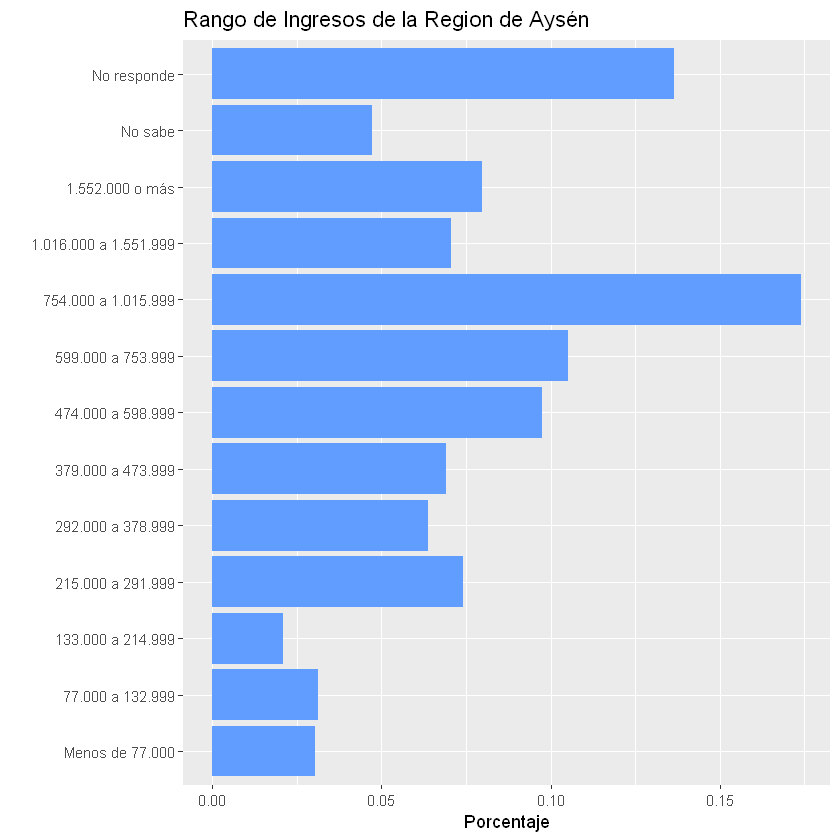

In [63]:
n=11
ingreso_region_f(n)
grafico_region_ingresos(n)

Region,Ingresos,total,SE,Porcentaje_regional
<fct>,<chr>,<dbl>,<dbl>,<dbl>
Magallanes y Antártica,Menos de 77.000,0.000,0.0000,0.000000
Magallanes y Antártica,77.000 a 132.999,1544.100,584.4910,1.172901
Magallanes y Antártica,133.000 a 214.999,6534.137,745.7729,4.963339
Magallanes y Antártica,215.000 a 291.999,6928.276,926.1100,5.262728
Magallanes y Antártica,292.000 a 378.999,10394.288,994.1363,7.895516
Magallanes y Antártica,379.000 a 473.999,21593.718,2504.6454,16.402617
Magallanes y Antártica,474.000 a 598.999,22762.438,5839.0448,17.290379
Magallanes y Antártica,599.000 a 753.999,23294.031,1100.6942,17.694178
Magallanes y Antártica,754.000 a 1.015.999,13110.470,4855.9450,9.958731


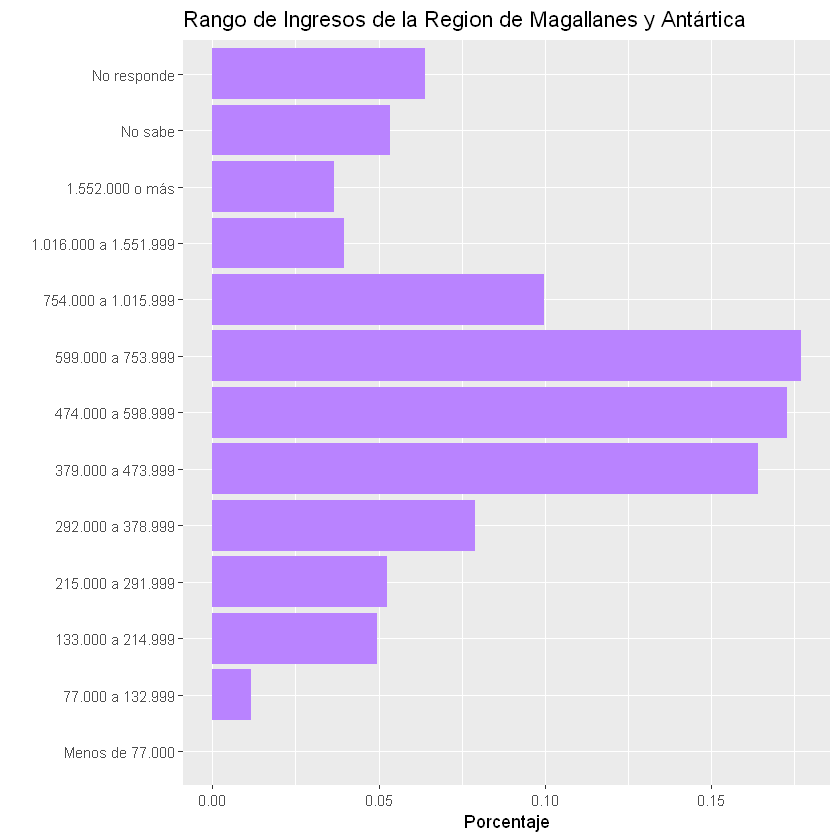

In [64]:
n=12
ingreso_region_f(n)
grafico_region_ingresos(n)

In [65]:
16.402617+17.290379+17.694178

[1] 51.38717

Region,Ingresos,total,SE,Porcentaje_regional
<fct>,<chr>,<dbl>,<dbl>,<dbl>
Región Metropolitana,Menos de 77.000,8144.355,5802.562,0.1392584
Región Metropolitana,77.000 a 132.999,63803.086,14939.781,1.0909541
Región Metropolitana,133.000 a 214.999,151730.557,26102.640,2.5944054
Región Metropolitana,215.000 a 291.999,200453.859,36535.741,3.4275138
Región Metropolitana,292.000 a 378.999,384614.820,44193.914,6.5764391
Región Metropolitana,379.000 a 473.999,380156.694,59436.373,6.5002106
Región Metropolitana,474.000 a 598.999,440919.218,42901.192,7.5391749
Región Metropolitana,599.000 a 753.999,816620.575,89477.406,13.9632047
Región Metropolitana,754.000 a 1.015.999,962654.132,93552.604,16.4601984


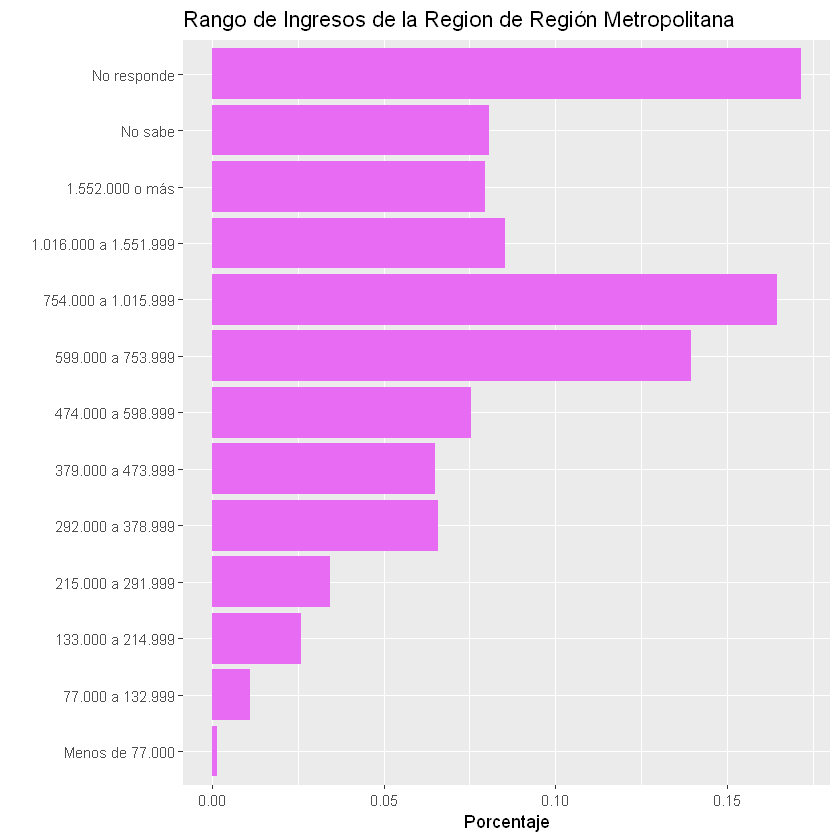

In [66]:
n=13
ingreso_region_f(n)
grafico_region_ingresos(n)

Region,Ingresos,total,SE,Porcentaje_regional
<fct>,<chr>,<dbl>,<dbl>,<dbl>
Los Ríos,Menos de 77.000,2343.9169,1763.1666,0.7225859
Los Ríos,77.000 a 132.999,14186.0207,6404.9107,4.3732858
Los Ríos,133.000 a 214.999,64161.8620,11955.1805,19.7799062
Los Ríos,215.000 a 291.999,18153.7138,5092.1027,5.5964516
Los Ríos,292.000 a 378.999,49964.6375,5688.9250,15.4031665
Los Ríos,379.000 a 473.999,43994.2279,5276.6008,13.5626005
Los Ríos,474.000 a 598.999,50534.6163,12837.0223,15.5788804
Los Ríos,599.000 a 753.999,50331.2917,20960.5855,15.5161992
Los Ríos,754.000 a 1.015.999,21004.1908,17429.7018,6.4752006


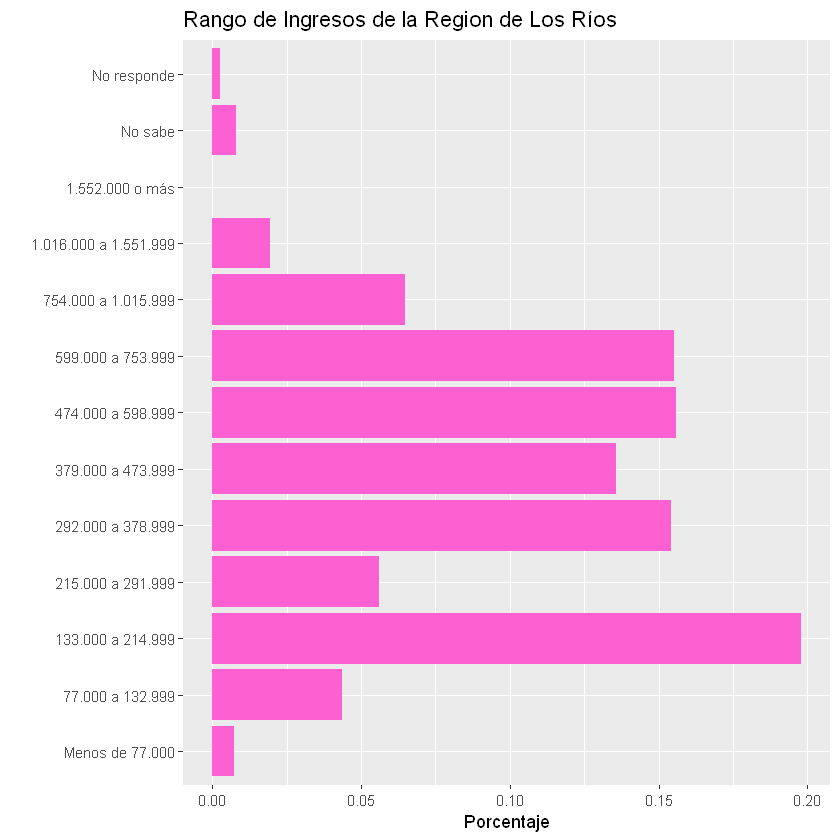

In [67]:
n=14
ingreso_region_f(n)
grafico_region_ingresos(n)

Region,Ingresos,total,SE,Porcentaje_regional
<fct>,<chr>,<dbl>,<dbl>,<dbl>
Arica y Parinacota,Menos de 77.000,2754.074,1006.452,1.480247
Arica y Parinacota,77.000 a 132.999,4567.908,1718.558,2.455139
Arica y Parinacota,133.000 a 214.999,17271.413,5108.953,9.282961
Arica y Parinacota,215.000 a 291.999,22158.632,6038.622,11.909721
Arica y Parinacota,292.000 a 378.999,35120.899,3847.590,18.876622
Arica y Parinacota,379.000 a 473.999,21902.967,7722.331,11.772307
Arica y Parinacota,474.000 a 598.999,14271.219,2503.173,7.670430
Arica y Parinacota,599.000 a 753.999,28981.658,4995.334,15.576930
Arica y Parinacota,754.000 a 1.015.999,20531.779,4741.262,11.035328


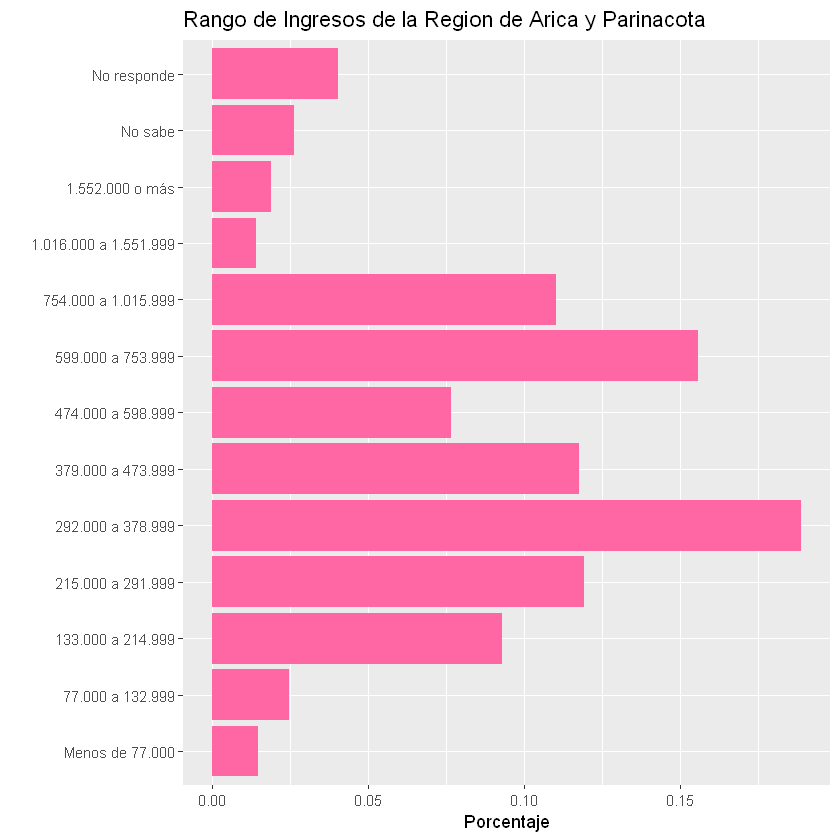

In [68]:
n=15
ingreso_region_f(n)
grafico_region_ingresos(n)

In [69]:
Area=c(rep('Urbano',13),rep('Rural',13))

In [70]:
area_ingreso=data.frame(Zona=Area,Ingresos=as.factor(Ingresos),svytotal(~interaction(P10_10,Area), diseño))
rownames(area_ingreso)=c()
area_ingreso[1:13,]
area_ingreso[14:26,]

,Zona,Ingresos,total,SE
,<chr>,<fct>,<dbl>,<dbl>
1,Urbano,Menos de 77.000,62673.85,14547.71
2,Urbano,77.000 a 132.999,233466.95,27949.48
3,Urbano,133.000 a 214.999,645946.09,46141.92
4,Urbano,215.000 a 291.999,718589.03,50234.02
5,Urbano,292.000 a 378.999,1058096.05,64800.91
6,Urbano,379.000 a 473.999,1007777.91,73269.80
7,Urbano,474.000 a 598.999,1087278.70,67115.75
8,Urbano,599.000 a 753.999,1734075.76,105176.40
9,Urbano,754.000 a 1.015.999,1850901.31,115303.11


,Zona,Ingresos,total,SE
,<chr>,<fct>,<dbl>,<dbl>
14,Rural,Menos de 77.000,21247.18,4738.222
15,Rural,77.000 a 132.999,149102.25,22425.093
16,Rural,133.000 a 214.999,254318.07,31089.874
17,Rural,215.000 a 291.999,260045.39,30308.663
18,Rural,292.000 a 378.999,317370.57,53863.551
19,Rural,379.000 a 473.999,193985.71,23000.188
20,Rural,474.000 a 598.999,227939.04,33433.973
21,Rural,599.000 a 753.999,161073.06,35449.187
22,Rural,754.000 a 1.015.999,74243.82,13537.168


In [71]:
head(area_ingreso)

,Zona,Ingresos,total,SE
,<chr>,<fct>,<dbl>,<dbl>
1,Urbano,Menos de 77.000,62673.85,14547.71
2,Urbano,77.000 a 132.999,233466.95,27949.48
3,Urbano,133.000 a 214.999,645946.09,46141.92
4,Urbano,215.000 a 291.999,718589.03,50234.02
5,Urbano,292.000 a 378.999,1058096.05,64800.91
6,Urbano,379.000 a 473.999,1007777.91,73269.80


In [72]:
area_ingreso %>% filter(Zona == 'Urbano')%>% 
mutate(Porcentaje=(total/sum(total))*100)

Zona,Ingresos,total,SE,Porcentaje
<chr>,<fct>,<dbl>,<dbl>,<dbl>
Urbano,Menos de 77.000,62673.85,14547.71,0.5028791
Urbano,77.000 a 132.999,233466.95,27949.48,1.8732794
Urbano,133.000 a 214.999,645946.09,46141.92,5.1829070
Urbano,215.000 a 291.999,718589.03,50234.02,5.7657754
Urbano,292.000 a 378.999,1058096.05,64800.91,8.4898933
Urbano,379.000 a 473.999,1007777.91,73269.80,8.0861534
Urbano,474.000 a 598.999,1087278.70,67115.75,8.7240475
Urbano,599.000 a 753.999,1734075.76,105176.40,13.9137825
Urbano,754.000 a 1.015.999,1850901.31,115303.11,14.8511609


In [73]:
0.5028791+1.8732794+5.1829070+5.7657754+8.4898933+8.0861534

[1] 29.90089

In [74]:
area_ingreso %>% filter(Zona == 'Rural')%>% 
mutate(Porcentaje=(total/sum(total))*100) 

Zona,Ingresos,total,SE,Porcentaje
<chr>,<fct>,<dbl>,<dbl>,<dbl>
Rural,Menos de 77.000,21247.18,4738.222,1.132031
Rural,77.000 a 132.999,149102.25,22425.093,7.944038
Rural,133.000 a 214.999,254318.07,31089.874,13.549846
Rural,215.000 a 291.999,260045.39,30308.663,13.854993
Rural,292.000 a 378.999,317370.57,53863.551,16.909228
Rural,379.000 a 473.999,193985.71,23000.188,10.335390
Rural,474.000 a 598.999,227939.04,33433.973,12.144394
Rural,599.000 a 753.999,161073.06,35449.187,8.581833
Rural,754.000 a 1.015.999,74243.82,13537.168,3.955646


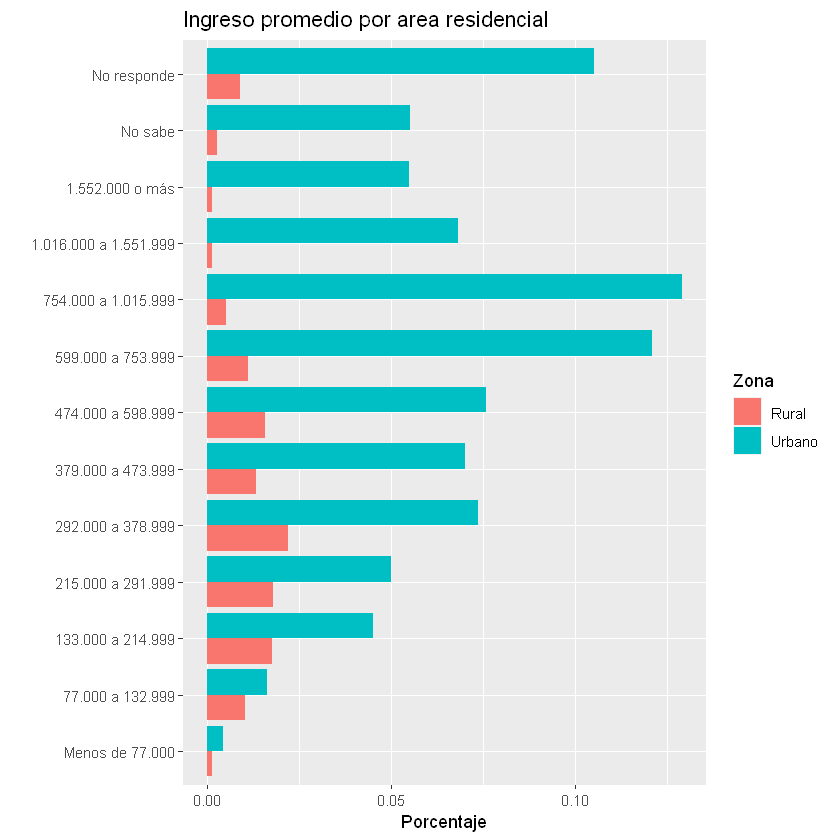

In [75]:
ggplot(area_ingreso, aes(x = Ingresos, y = total/sum(total), fill = Zona)) + 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title = "Ingreso promedio por area residencial",y='Porcentaje',x='') + 
  scale_x_discrete(limits = Ingresos)

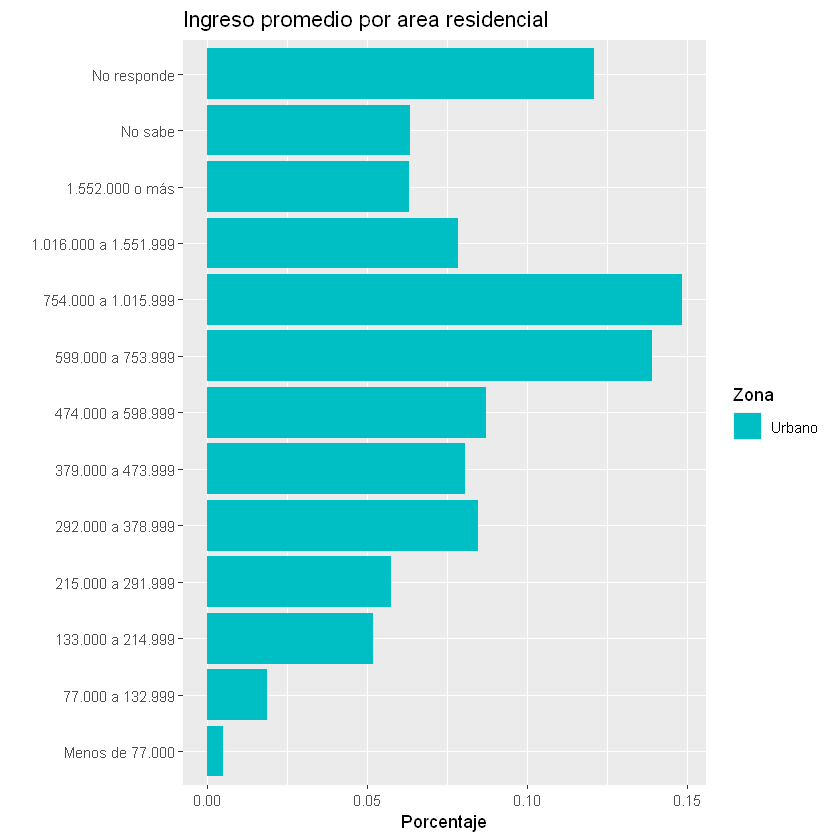

In [76]:
ingreso_urbano=area_ingreso[1:13,]
ggplot(ingreso_urbano, aes(x = Ingresos, y = total/sum(total), fill = Zona)) + 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title = "Ingreso promedio por area residencial",y='Porcentaje',x='') + 
  scale_x_discrete(limits = Ingresos) +
scale_fill_manual(,values=c('#00BFC4'))

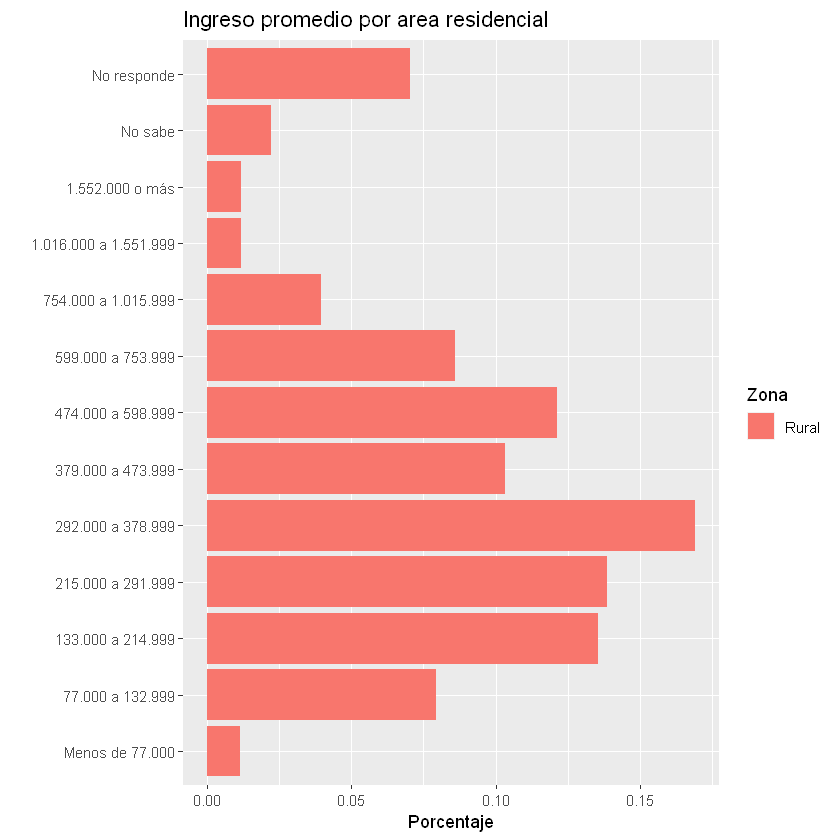

In [77]:
ingreso_rural=area_ingreso[14:26,]
ggplot(ingreso_rural, aes(x = Ingresos, y = total/sum(total), fill = Zona)) + 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title = "Ingreso promedio por area residencial",y='Porcentaje',x='') + 
  scale_x_discrete(limits = Ingresos)+
scale_fill_manual(,values=c('#F8766D'))


In [78]:
Nivel_educacional=c(
 'Nunca asistió'
,'Jardín Infantil'
,'Kinder/Prekinder'
,'Educación Especial'
,'Primaria o Preparatoria (sistema antiguo)'
,'Educación Básica'
,'Humanidades (sistema antiguo)'
,'Educación Media C-H'
,'Técnica Comercial, Industrial o Normalista (sistema antiguo)'
,'Educación Media TP'
,'Técnico Nivel Superior (carreras 1 a 3 años)'
,'Profesional (carreras 4 o más años)'
,'Postgrado'
,'No sabe'
,'No responde')

In [79]:
Nivel_educacional_rep=c(
 rep('Nunca asistió',13)
,rep('Jardín Infantil',13)
,rep('Kinder/Prekinder',13)
,rep('Educación Especial',13)
,rep('Primaria o Preparatoria (sistema antiguo)',13)
,rep('Educación Básica',13)
,rep('Humanidades (sistema antiguo)',13)
,rep('Educación Media C-H',13)
,rep('Técnica Comercial, Industrial o Normalista (sistema antiguo)',13)
,rep('Educación Media TP',13)
,rep('Técnico Nivel Superior (carreras 1 a 3 años)',13)
,rep('Profesional (carreras 4 o más años)',13)
,rep('Postgrado',13)
,rep('No sabe',13)
,rep('No responde',13))

In [80]:
Educacion_ingreso=data.frame('Nivel Educacional'=Nivel_educacional_rep,Ingresos,svytotal(~interaction(P10_10,S2.enc), diseño))
rownames(Educacion_ingreso)=c()
colnames(Educacion_ingreso)=c('Nivel Educacional','Ingresos','total','SE')

In [81]:
Educacion_ingreso

Nivel Educacional,Ingresos,total,SE
<chr>,<chr>,<dbl>,<dbl>
Nunca asistió,Menos de 77.000,7644.0612,4589.1913
Nunca asistió,77.000 a 132.999,20452.5479,4761.1607
Nunca asistió,133.000 a 214.999,44020.6683,7460.9815
Nunca asistió,215.000 a 291.999,47271.7752,15172.8070
Nunca asistió,292.000 a 378.999,15915.9491,7067.1442
Nunca asistió,379.000 a 473.999,13231.9247,6307.9706
Nunca asistió,474.000 a 598.999,18238.8391,13329.2387
Nunca asistió,599.000 a 753.999,3305.0288,3305.0288
Nunca asistió,754.000 a 1.015.999,24907.0581,20207.1965


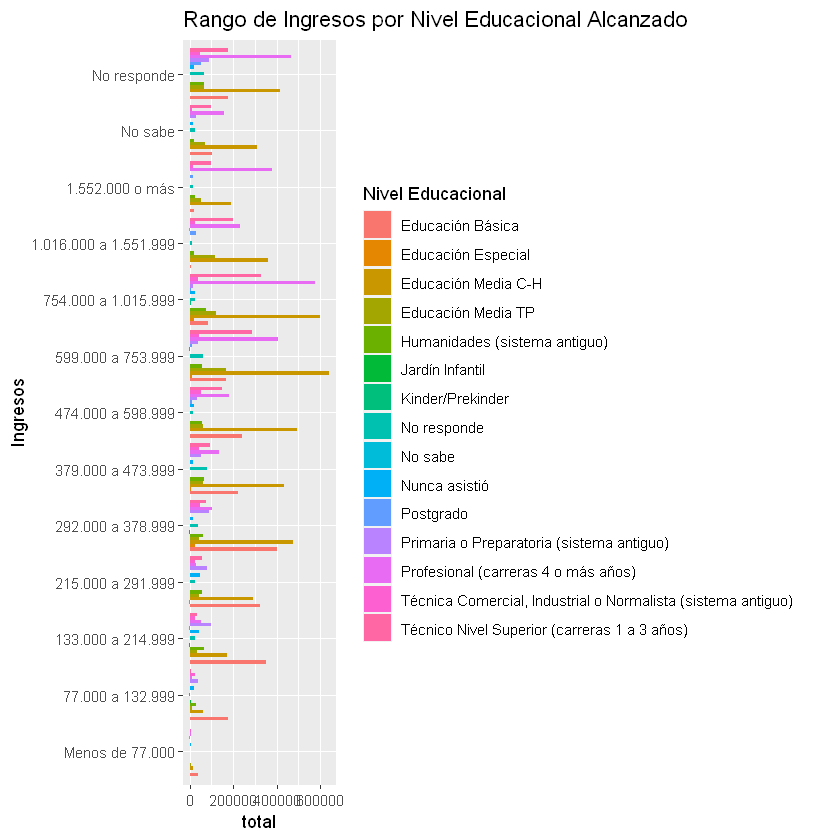

In [82]:
ggplot(Educacion_ingreso, aes(x = Ingresos, y = total, fill = `Nivel Educacional`)) + 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title = "Rango de Ingresos por Nivel Educacional Alcanzado") + 
  scale_x_discrete(limits = Ingresos)

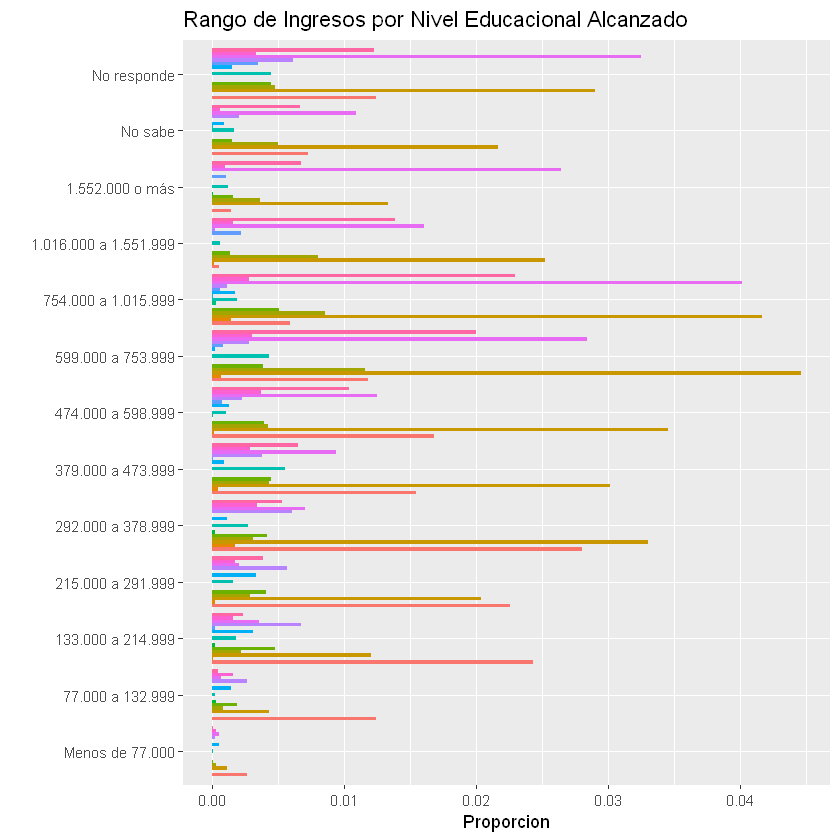

In [83]:
ggplot(Educacion_ingreso, aes(x = Ingresos, y = total/sum(total), fill = `Nivel Educacional`)) + 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip()+  
  theme(legend.position = "none") + 
  labs(title = "Rango de Ingresos por Nivel Educacional Alcanzado",x='',y='Proporcion') + 
  scale_x_discrete(limits = Ingresos)

In [84]:
nivel_color=c(
'Educación Básica'
,'Educación Especial'
,'Educación Media C-H'
,'Educación Media TP'
,'Humanidades (sistema antiguo)'
,'Jardín Infantil'
,'Kinder/Prekinder'
,'No responde'
,'No sabe'
,'Nunca asistió'
,'Postgrado'
,'Primaria o Preparatoria (sistema antiguo)'
,'Profesional (carreras 4 o más años)'
,'Técnica Comercial, Industrial o Normalista (sistema antiguo)'
,'Técnico Nivel Superior (carreras 1 a 3 años)'
)
color_ingreso=c('#f8766d','#e58700','#c99800','#a3a500','#6bb100',
                '#00ba38','#00bf7d','#00c0af','#00bcd8','#00b0f6','#619cff','#b983ff','#e76bf3','#fd61d1','#ff67a4')
color=cbind(nivel_color,color_ingreso)
color=data.frame(color)
colnames(color)=c('Nivel Educacional','color')
Nivel_educacional=data.frame(Nivel_educacional)
colnames(Nivel_educacional)=c('Nivel Educacional')

Nivel_educacional=merge(x = Nivel_educacional, y = color,all.y = TRUE)
Nivel_educacional

Nivel Educacional,color
<chr>,<chr>
Educación Básica,#f8766d
Educación Especial,#e58700
Educación Media C-H,#c99800
Educación Media TP,#a3a500
Humanidades (sistema antiguo),#6bb100
Jardín Infantil,#00ba38
Kinder/Prekinder,#00bf7d
No responde,#00c0af
No sabe,#00bcd8


In [85]:
Educacion_ingreso_f_tab <- function(n) {    
tabla= Educacion_ingreso %>% filter(`Nivel Educacional` == Nivel_educacional[n,1])%>% mutate(Porcentaje_regional=(total/sum(total))*100)
return(tabla)
}

grafico_region_ingresos <- function(n) {    
grafico=Educacion_ingreso %>% filter(`Nivel Educacional` == Nivel_educacional[n,1])%>% mutate(Porcentaje_regional=(total/sum(total))*100) %>% 
ggplot(aes(x = Ingresos, y = total/sum(total),fill=`Nivel Educacional`)) +  
  theme(legend.position = "none")+ scale_fill_manual(values=c(Nivel_educacional[n,2]))+ 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title =paste( "Rango de Ingresos por Nivel Educacional Alcanzado,\n",Nivel_educacional[n,1]),y='Frecuencia',x='') + 
  scale_x_discrete(limits = Ingresos) 
return(grafico)
}

Nivel Educacional,Ingresos,total,SE,Porcentaje_regional
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Educación Básica,Menos de 77.000,37762.377,10039.306,1.6294227
Educación Básica,77.000 a 132.999,178306.766,27748.901,7.6938242
Educación Básica,133.000 a 214.999,349104.972,41346.418,15.0636587
Educación Básica,215.000 a 291.999,323476.290,31753.780,13.9577973
Educación Básica,292.000 a 378.999,402014.233,51726.013,17.3466599
Educación Básica,379.000 a 473.999,221171.274,28132.540,9.5434006
Educación Básica,474.000 a 598.999,241241.951,31420.669,10.4094376
Educación Básica,599.000 a 753.999,168901.136,34641.541,7.2879772
Educación Básica,754.000 a 1.015.999,84739.599,17325.759,3.6564601


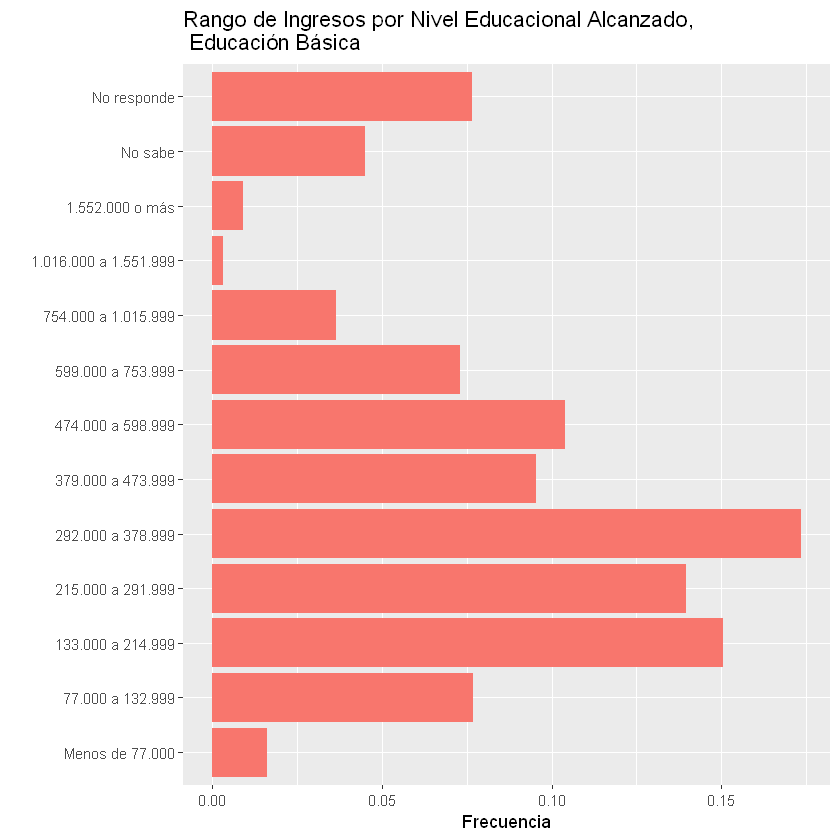

In [86]:
n=1
Educacion_ingreso_f_tab(n)
grafico_region_ingresos(n)

Nivel Educacional,Ingresos,total,SE,Porcentaje_regional
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Educación Especial,Menos de 77.000,88.81474,88.81474,0.1320548
Educación Especial,77.000 a 132.999,227.29489,227.29489,0.3379550
Educación Especial,133.000 a 214.999,710.54968,710.54968,1.0564858
Educación Especial,215.000 a 291.999,2923.11108,1755.39512,4.3462481
Educación Especial,292.000 a 378.999,24280.79193,11693.14694,36.1020649
Educación Especial,379.000 a 473.999,6443.94666,4850.72831,9.5812270
Educación Especial,474.000 a 598.999,1511.39856,1087.82504,2.2472335
Educación Especial,599.000 a 753.999,9425.59100,5309.40473,14.0145058
Educación Especial,754.000 a 1.015.999,20043.75787,19394.81730,29.8022013


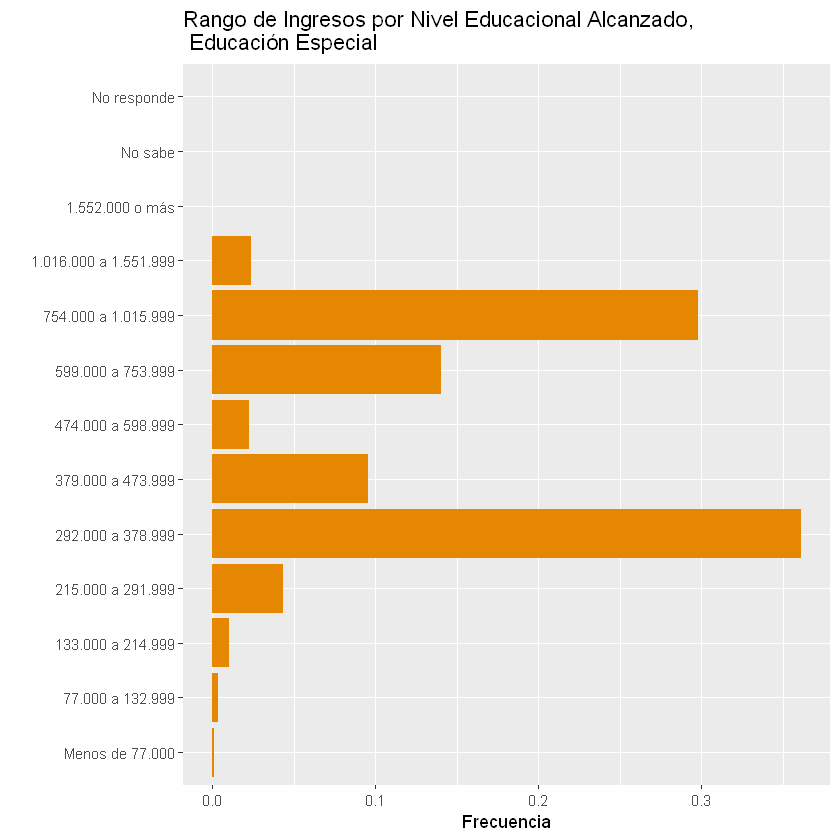

In [87]:
n=2
Educacion_ingreso_f_tab(n)
grafico_region_ingresos(n)

Nivel Educacional,Ingresos,total,SE,Porcentaje_regional
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Educación Media C-H,Menos de 77.000,15882.82,4830.625,0.3559473
Educación Media C-H,77.000 a 132.999,61658.83,10316.095,1.3818260
Educación Media C-H,133.000 a 214.999,172988.38,19631.070,3.8768147
Educación Media C-H,215.000 a 291.999,292547.02,32262.131,6.5562243
Educación Media C-H,292.000 a 378.999,474339.15,45658.727,10.6303384
Educación Media C-H,379.000 a 473.999,432433.71,37717.000,9.6912023
Educación Media C-H,474.000 a 598.999,495121.22,48358.356,11.0960822
Educación Media C-H,599.000 a 753.999,640148.10,54423.298,14.3462562
Educación Media C-H,754.000 a 1.015.999,597923.12,53059.613,13.3999589


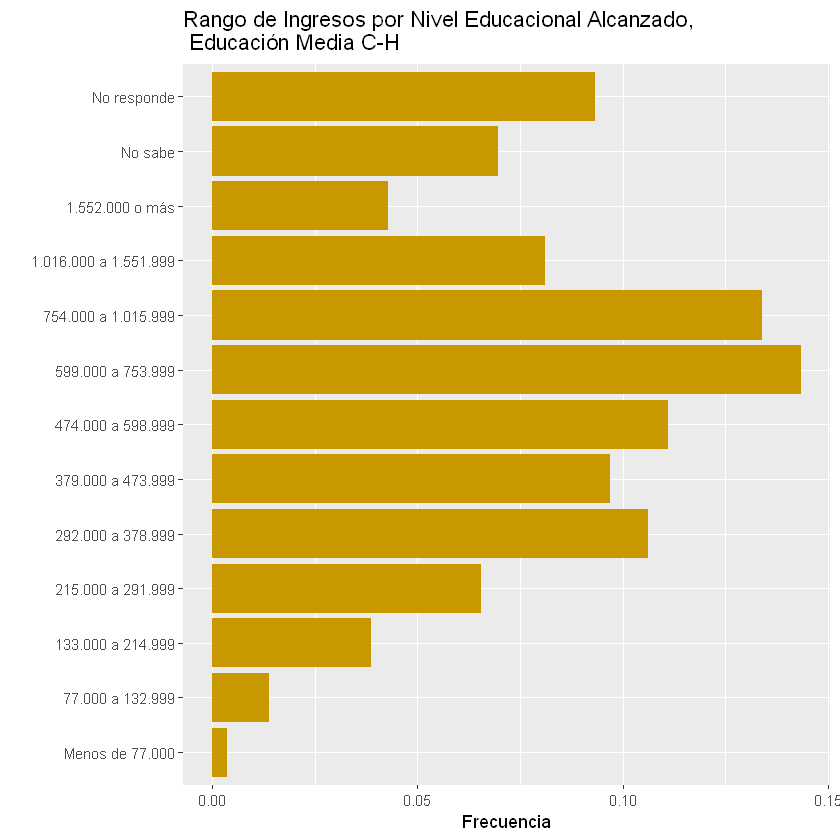

In [88]:
n=3
Educacion_ingreso_f_tab(n)
grafico_region_ingresos(n)

Nivel Educacional,Ingresos,total,SE,Porcentaje_regional
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Educación Media TP,Menos de 77.000,4102.353,1749.516,0.4817274
Educación Media TP,77.000 a 132.999,12229.753,5041.032,1.4361044
Educación Media TP,133.000 a 214.999,31493.142,9256.271,3.6981484
Educación Media TP,215.000 a 291.999,40884.010,9048.599,4.8008909
Educación Media TP,292.000 a 378.999,44766.632,11856.844,5.2568160
Educación Media TP,379.000 a 473.999,61333.864,13841.160,7.2022580
Educación Media TP,474.000 a 598.999,60868.026,12572.245,7.1475561
Educación Media TP,599.000 a 753.999,166567.752,28727.764,19.5595687
Educación Media TP,754.000 a 1.015.999,122846.482,18096.833,14.4255066


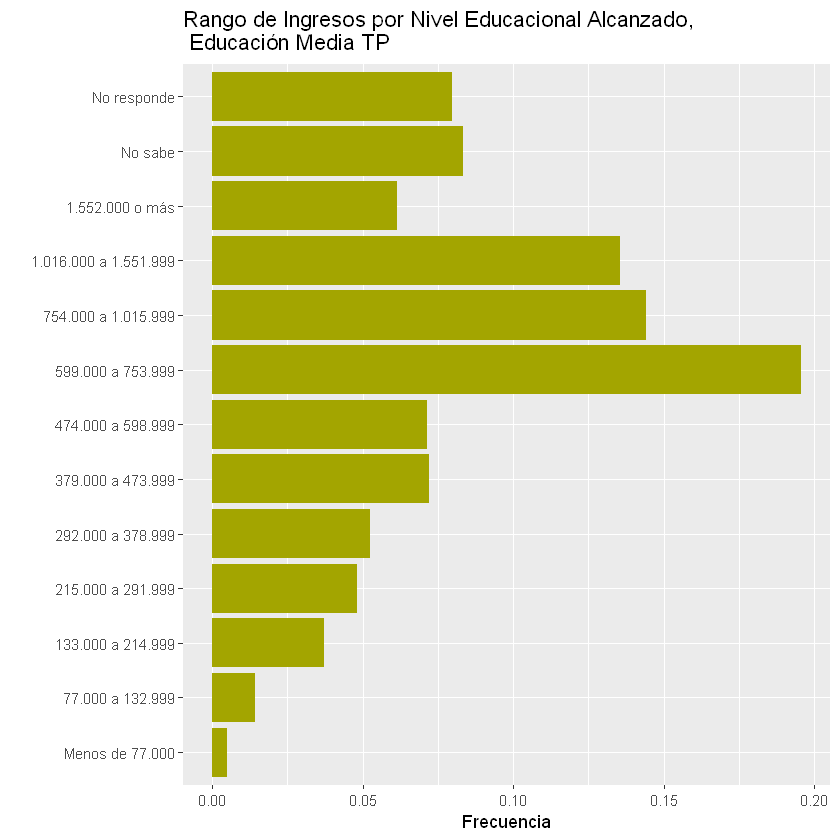

In [89]:
n=4
Educacion_ingreso_f_tab(n)
grafico_region_ingresos(n)

Nivel Educacional,Ingresos,total,SE,Porcentaje_regional
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Humanidades (sistema antiguo),Menos de 77.000,548.1194,548.1194,0.09319148
Humanidades (sistema antiguo),77.000 a 132.999,26903.0768,6786.2845,4.57407209
Humanidades (sistema antiguo),133.000 a 214.999,67884.7356,13367.4724,11.54179042
Humanidades (sistema antiguo),215.000 a 291.999,58314.9286,15611.6832,9.91472793
Humanidades (sistema antiguo),292.000 a 378.999,59310.8614,10117.7177,10.08405683
Humanidades (sistema antiguo),379.000 a 473.999,63728.0015,10858.0698,10.83506080
Humanidades (sistema antiguo),474.000 a 598.999,56742.0105,20536.7410,9.64729976
Humanidades (sistema antiguo),599.000 a 753.999,54974.8042,11695.2237,9.34683863
Humanidades (sistema antiguo),754.000 a 1.015.999,72799.5268,22536.1980,12.37740523


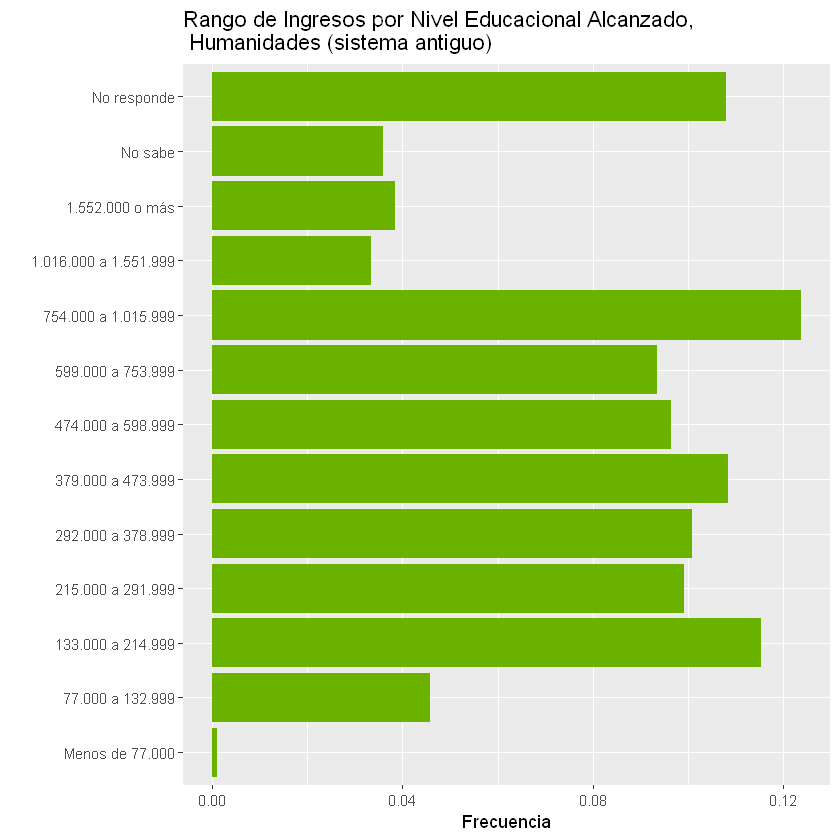

In [90]:
n=5
Educacion_ingreso_f_tab(n)
grafico_region_ingresos(n)

Nivel Educacional,Ingresos,total,SE,Porcentaje_regional
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Jardín Infantil,Menos de 77.000,0.0000,0.0000,0.000000
Jardín Infantil,77.000 a 132.999,3835.3755,2723.4410,35.136325
Jardín Infantil,133.000 a 214.999,2609.6008,2609.6008,23.906860
Jardín Infantil,215.000 a 291.999,0.0000,0.0000,0.000000
Jardín Infantil,292.000 a 378.999,3467.5320,2325.7376,31.766468
Jardín Infantil,379.000 a 473.999,0.0000,0.0000,0.000000
Jardín Infantil,474.000 a 598.999,0.0000,0.0000,0.000000
Jardín Infantil,599.000 a 753.999,0.0000,0.0000,0.000000
Jardín Infantil,754.000 a 1.015.999,0.0000,0.0000,0.000000


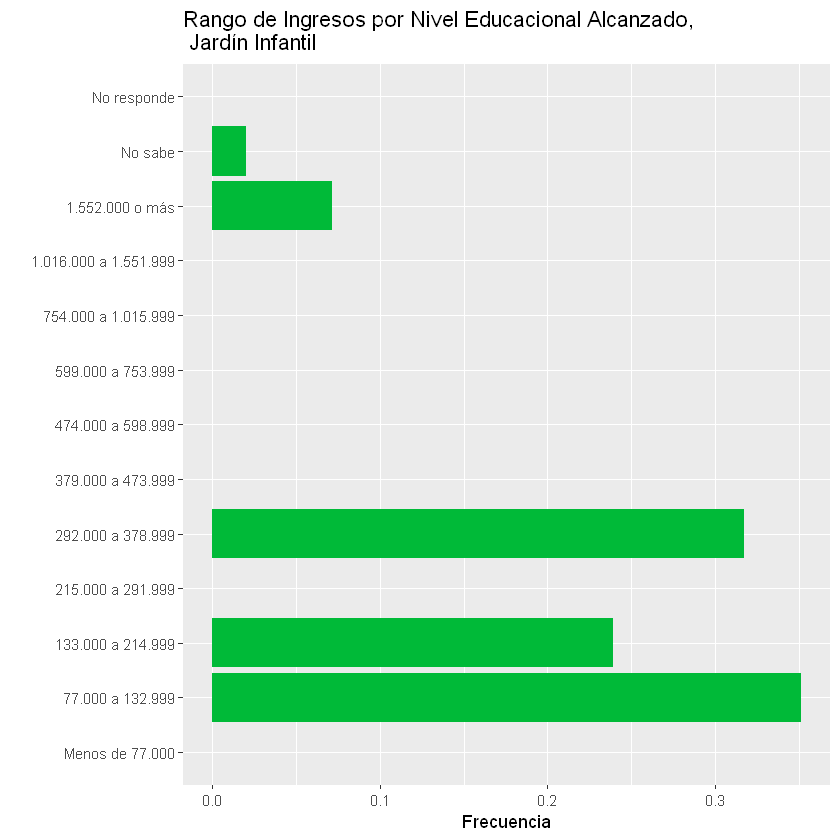

In [91]:
n=6
Educacion_ingreso_f_tab(n)
grafico_region_ingresos(n)

Nivel Educacional,Ingresos,total,SE,Porcentaje_regional
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Kinder/Prekinder,Menos de 77.000,0.0000,0.0000,0.000000
Kinder/Prekinder,77.000 a 132.999,0.0000,0.0000,0.000000
Kinder/Prekinder,133.000 a 214.999,0.0000,0.0000,0.000000
Kinder/Prekinder,215.000 a 291.999,0.0000,0.0000,0.000000
Kinder/Prekinder,292.000 a 378.999,0.0000,0.0000,0.000000
Kinder/Prekinder,379.000 a 473.999,217.6482,217.6482,4.372155
Kinder/Prekinder,474.000 a 598.999,720.9461,720.9461,14.482487
Kinder/Prekinder,599.000 a 753.999,0.0000,0.0000,0.000000
Kinder/Prekinder,754.000 a 1.015.999,4039.4602,4039.4602,81.145358


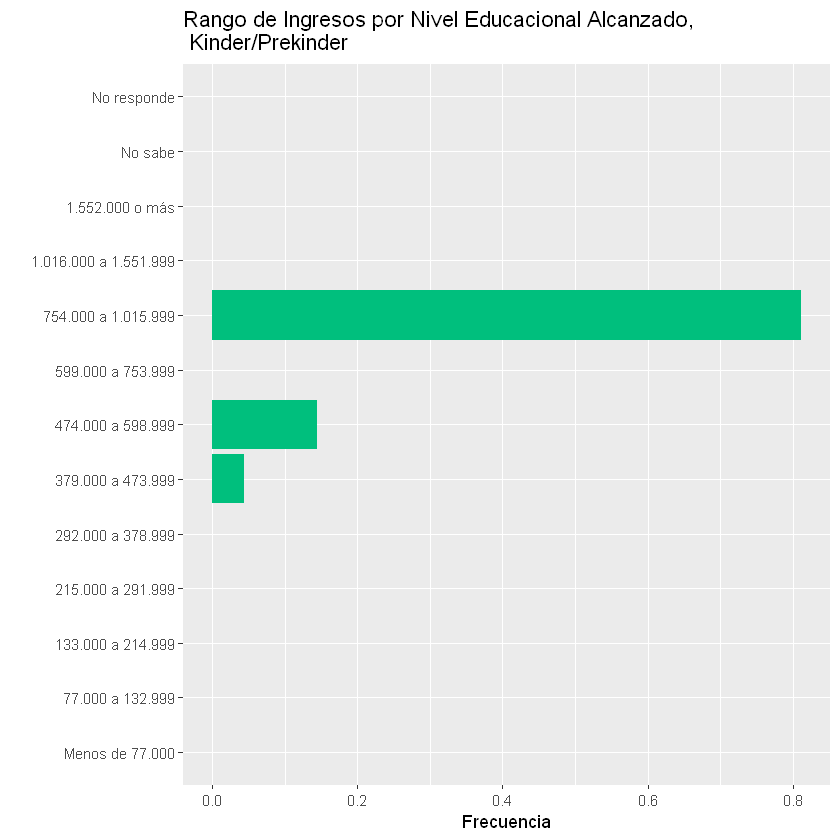

In [92]:
n=7
Educacion_ingreso_f_tab(n)
grafico_region_ingresos(n)

Nivel Educacional,Ingresos,total,SE,Porcentaje_regional
<chr>,<chr>,<dbl>,<dbl>,<dbl>
No responde,Menos de 77.000,1347.415,1347.415,0.3483904
No responde,77.000 a 132.999,2883.153,1783.223,0.7454740
No responde,133.000 a 214.999,25422.550,6589.911,6.5733079
No responde,215.000 a 291.999,22671.214,9714.765,5.8619166
No responde,292.000 a 378.999,38612.278,13915.485,9.9836718
No responde,379.000 a 473.999,78723.088,39947.752,20.3548069
No responde,474.000 a 598.999,15495.921,6551.790,4.0066578
No responde,599.000 a 753.999,62079.868,25935.108,16.0515011
No responde,754.000 a 1.015.999,26586.079,14091.808,6.8741524


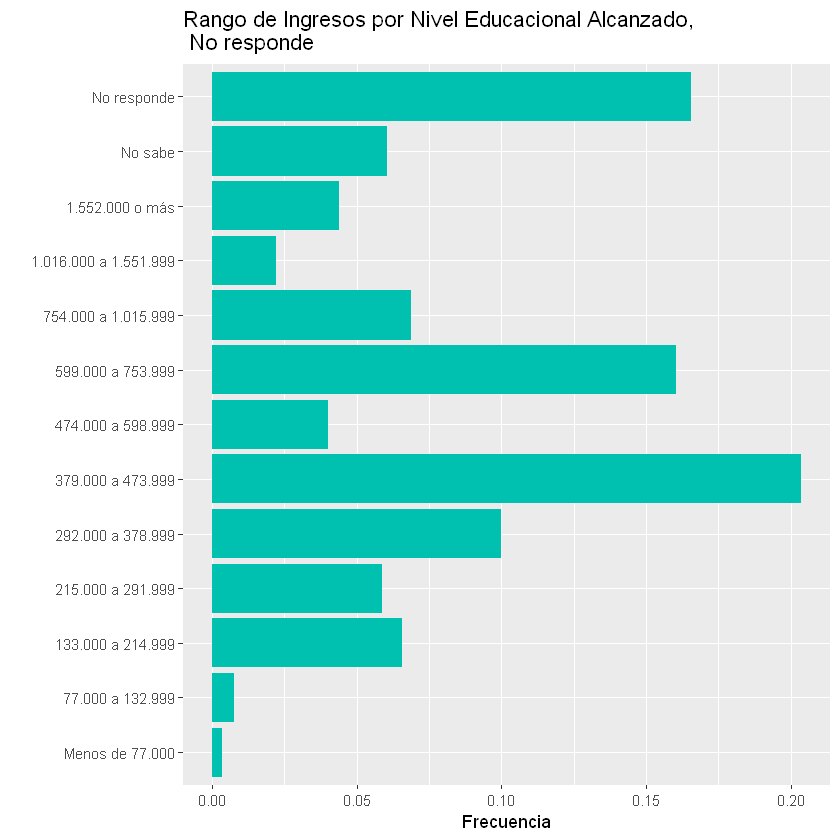

In [93]:
n=8
Educacion_ingreso_f_tab(n)
grafico_region_ingresos(n)

Nivel Educacional,Ingresos,total,SE,Porcentaje_regional
<chr>,<chr>,<dbl>,<dbl>,<dbl>
No sabe,Menos de 77.000,0.000,0.000,0.00000
No sabe,77.000 a 132.999,0.000,0.000,0.00000
No sabe,133.000 a 214.999,0.000,0.000,0.00000
No sabe,215.000 a 291.999,0.000,0.000,0.00000
No sabe,292.000 a 378.999,0.000,0.000,0.00000
No sabe,379.000 a 473.999,0.000,0.000,0.00000
No sabe,474.000 a 598.999,0.000,0.000,0.00000
No sabe,599.000 a 753.999,0.000,0.000,0.00000
No sabe,754.000 a 1.015.999,1422.418,1422.418,55.97834


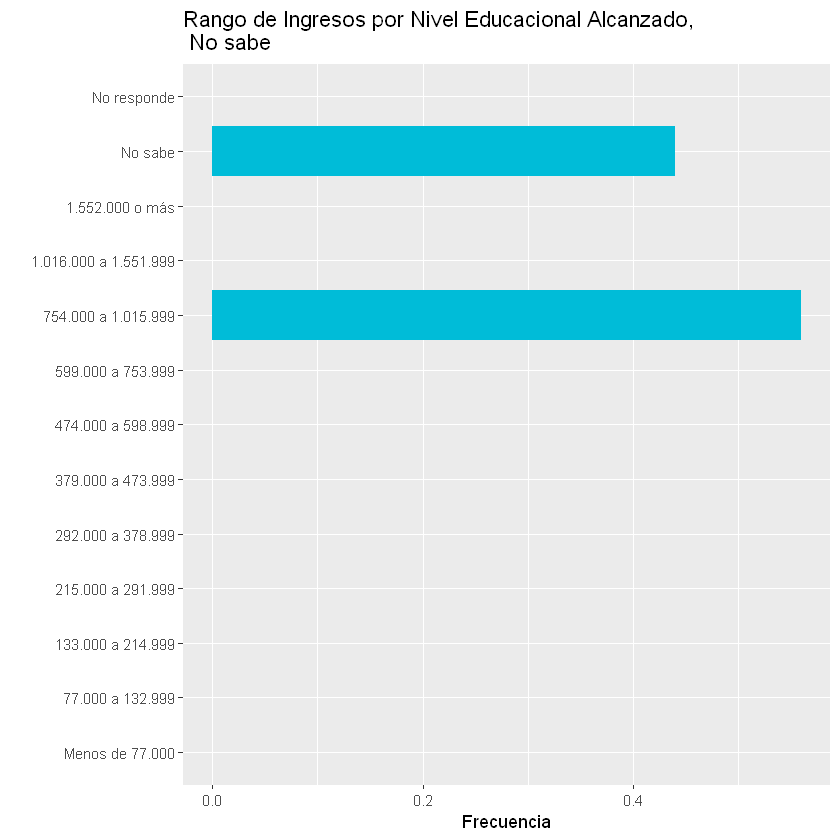

In [94]:
n=9
Educacion_ingreso_f_tab(n)
grafico_region_ingresos(n)

Nivel Educacional,Ingresos,total,SE,Porcentaje_regional
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Nunca asistió,Menos de 77.000,7644.061,4589.191,3.327281
Nunca asistió,77.000 a 132.999,20452.548,4761.161,8.902517
Nunca asistió,133.000 a 214.999,44020.668,7460.981,19.161169
Nunca asistió,215.000 a 291.999,47271.775,15172.807,20.576300
Nunca asistió,292.000 a 378.999,15915.949,7067.144,6.927841
Nunca asistió,379.000 a 473.999,13231.925,6307.971,5.759548
Nunca asistió,474.000 a 598.999,18238.839,13329.239,7.938941
Nunca asistió,599.000 a 753.999,3305.029,3305.029,1.438602
Nunca asistió,754.000 a 1.015.999,24907.058,20207.196,10.841461


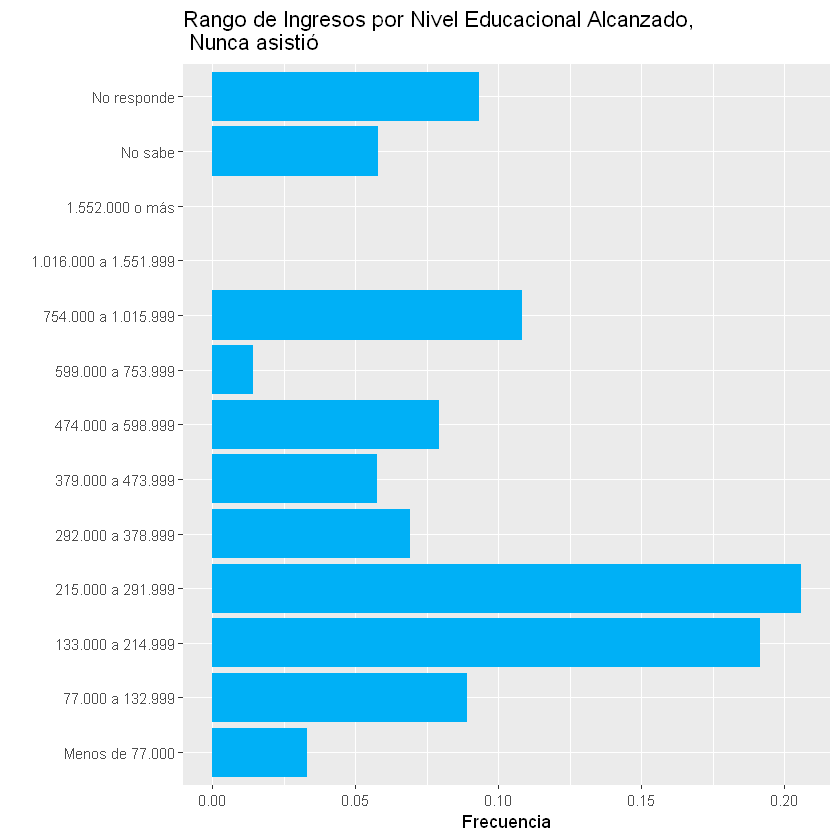

In [95]:
n=10
Educacion_ingreso_f_tab(n)
grafico_region_ingresos(n)

Nivel Educacional,Ingresos,total,SE,Porcentaje_regional
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Postgrado,Menos de 77.000,0.0000,0.0000,0.0000000
Postgrado,77.000 a 132.999,0.0000,0.0000,0.0000000
Postgrado,133.000 a 214.999,2619.3789,2619.3789,2.0243731
Postgrado,215.000 a 291.999,0.0000,0.0000,0.0000000
Postgrado,292.000 a 378.999,0.0000,0.0000,0.0000000
Postgrado,379.000 a 473.999,982.2177,982.2177,0.7591017
Postgrado,474.000 a 598.999,10535.7104,6711.3996,8.1424680
Postgrado,599.000 a 753.999,11753.4755,7303.4909,9.0836113
Postgrado,754.000 a 1.015.999,8213.9011,6168.6696,6.3480700


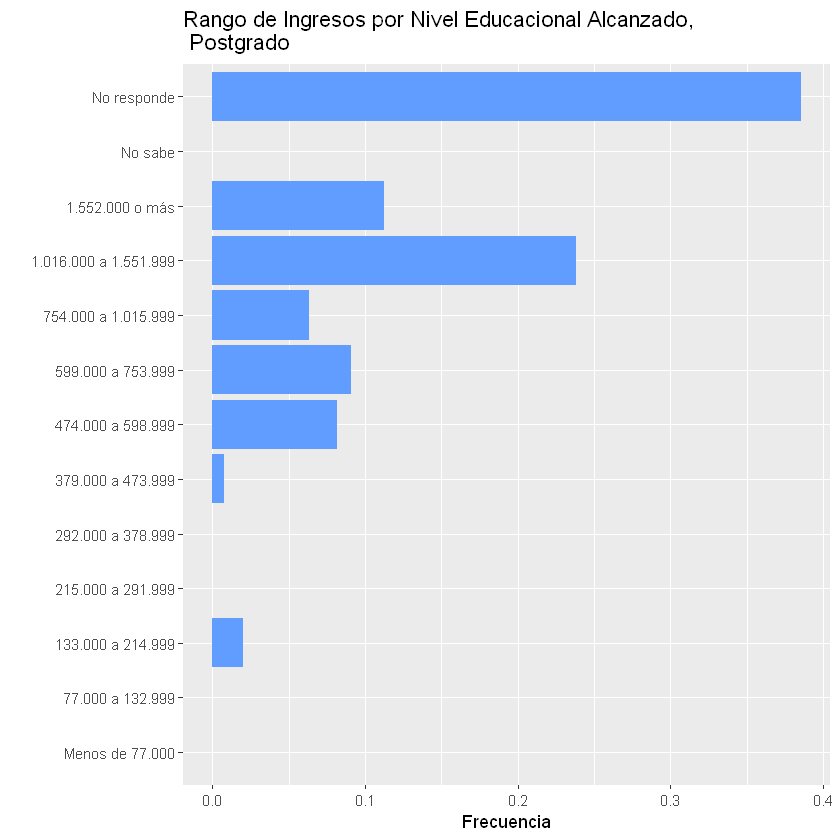

In [96]:
n=11
Educacion_ingreso_f_tab(n)
grafico_region_ingresos(n)

Nivel Educacional,Ingresos,total,SE,Porcentaje_regional
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Primaria o Preparatoria (sistema antiguo),Menos de 77.000,3319.661,1530.556,0.5848865
Primaria o Preparatoria (sistema antiguo),77.000 a 132.999,37557.308,6993.508,6.6171711
Primaria o Preparatoria (sistema antiguo),133.000 a 214.999,96533.400,11609.880,17.0080886
Primaria o Preparatoria (sistema antiguo),215.000 a 291.999,81099.961,13897.571,14.2888920
Primaria o Preparatoria (sistema antiguo),292.000 a 378.999,86919.147,16833.556,15.3141664
Primaria o Preparatoria (sistema antiguo),379.000 a 473.999,53627.238,10686.445,9.4485102
Primaria o Preparatoria (sistema antiguo),474.000 a 598.999,32363.257,9159.422,5.7020383
Primaria o Preparatoria (sistema antiguo),599.000 a 753.999,40275.535,10002.169,7.0960919
Primaria o Preparatoria (sistema antiguo),754.000 a 1.015.999,16200.034,6153.835,2.8542619


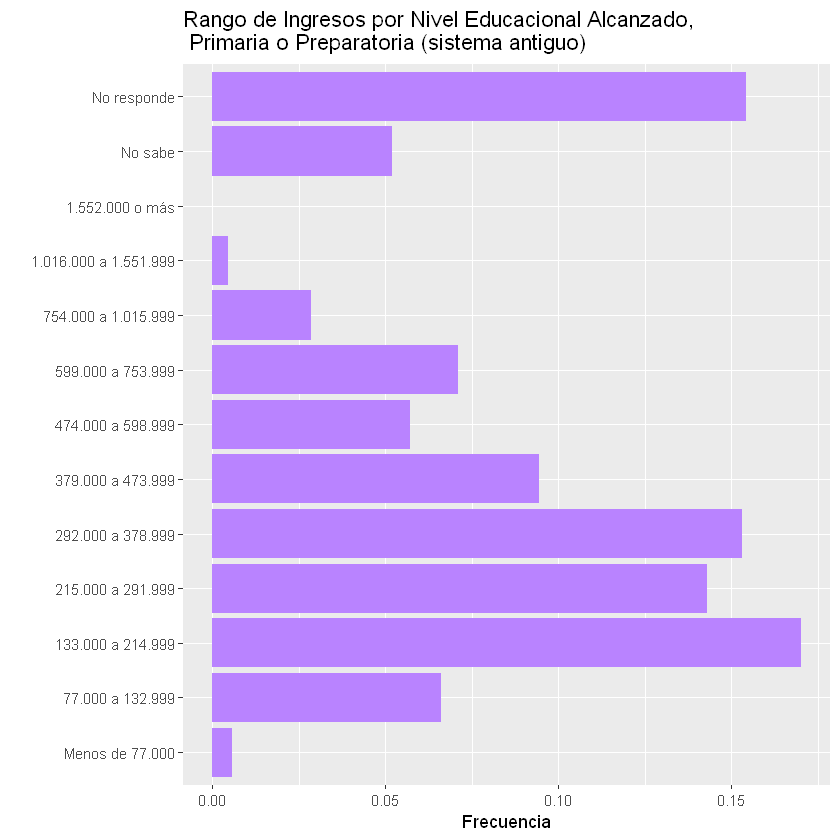

In [97]:
n=12
Educacion_ingreso_f_tab(n)
grafico_region_ingresos(n)

Nivel Educacional,Ingresos,total,SE,Porcentaje_regional
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Profesional (carreras 4 o más años),Menos de 77.000,7691.513,4990.422,0.2818054
Profesional (carreras 4 o más años),77.000 a 132.999,9654.322,4639.790,0.3537197
Profesional (carreras 4 o más años),133.000 a 214.999,51378.954,16813.835,1.8824469
Profesional (carreras 4 o más años),215.000 a 291.999,29405.898,8485.704,1.0773875
Profesional (carreras 4 o más años),292.000 a 378.999,100803.145,20061.435,3.6932742
Profesional (carreras 4 o más años),379.000 a 473.999,135075.953,26834.088,4.9489779
Profesional (carreras 4 o más años),474.000 a 598.999,179577.071,35941.696,6.5794313
Profesional (carreras 4 o más años),599.000 a 753.999,407365.411,59137.005,14.9252503
Profesional (carreras 4 o más años),754.000 a 1.015.999,576472.450,86945.632,21.1210755


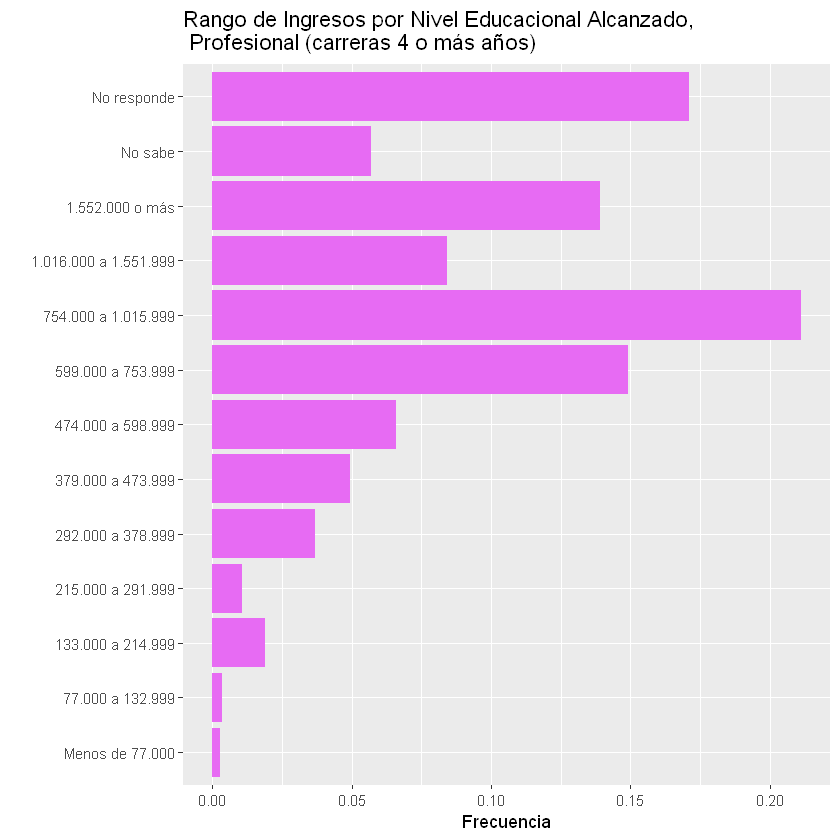

In [98]:
n=13
Educacion_ingreso_f_tab(n)
grafico_region_ingresos(n)

Nivel Educacional,Ingresos,total,SE,Porcentaje_regional
<chr>,<chr>,<dbl>,<dbl>,<dbl>
"Técnica Comercial, Industrial o Normalista (sistema antiguo)",Menos de 77.000,4175.711,4102.270,1.058578
"Técnica Comercial, Industrial o Normalista (sistema antiguo)",77.000 a 132.999,22666.586,11589.415,5.746170
"Técnica Comercial, Industrial o Normalista (sistema antiguo)",133.000 a 214.999,22504.303,6795.815,5.705030
"Técnica Comercial, Industrial o Normalista (sistema antiguo)",215.000 a 291.999,25054.307,8687.680,6.351477
"Técnica Comercial, Industrial o Normalista (sistema antiguo)",292.000 a 378.999,49109.333,10998.545,12.449628
"Técnica Comercial, Industrial o Normalista (sistema antiguo)",379.000 a 473.999,41396.960,10498.814,10.494477
"Técnica Comercial, Industrial o Normalista (sistema antiguo)",474.000 a 598.999,53586.098,15186.708,13.584526
"Técnica Comercial, Industrial o Normalista (sistema antiguo)",599.000 a 753.999,43046.624,9130.730,10.912681
"Técnica Comercial, Industrial o Normalista (sistema antiguo)",754.000 a 1.015.999,39681.058,11920.899,10.059482


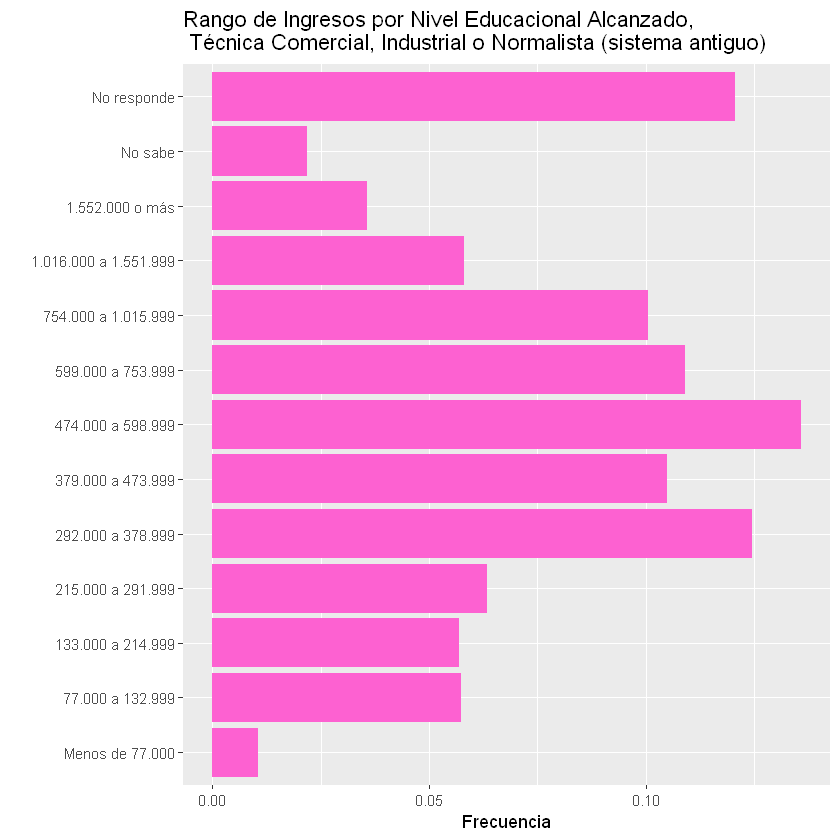

In [99]:
n=14
Educacion_ingreso_f_tab(n)
grafico_region_ingresos(n)

Nivel Educacional,Ingresos,total,SE,Porcentaje_regional
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Técnico Nivel Superior (carreras 1 a 3 años),Menos de 77.000,1358.189,861.9448,0.08501878
Técnico Nivel Superior (carreras 1 a 3 años),77.000 a 132.999,6194.189,2916.2106,0.38773875
Técnico Nivel Superior (carreras 1 a 3 años),133.000 a 214.999,32993.529,12441.8104,2.06530184
Técnico Nivel Superior (carreras 1 a 3 años),215.000 a 291.999,54985.899,19375.2450,3.44196215
Técnico Nivel Superior (carreras 1 a 3 años),292.000 a 378.999,75927.563,19198.1170,4.75285126
Técnico Nivel Superior (carreras 1 a 3 años),379.000 a 473.999,93397.804,17799.6420,5.84643904
Técnico Nivel Superior (carreras 1 a 3 años),474.000 a 598.999,149215.285,29745.4752,9.34045586
Técnico Nivel Superior (carreras 1 a 3 años),599.000 a 753.999,287305.488,38753.3430,17.98451303
Técnico Nivel Superior (carreras 1 a 3 años),754.000 a 1.015.999,329270.192,56794.0303,20.61138512


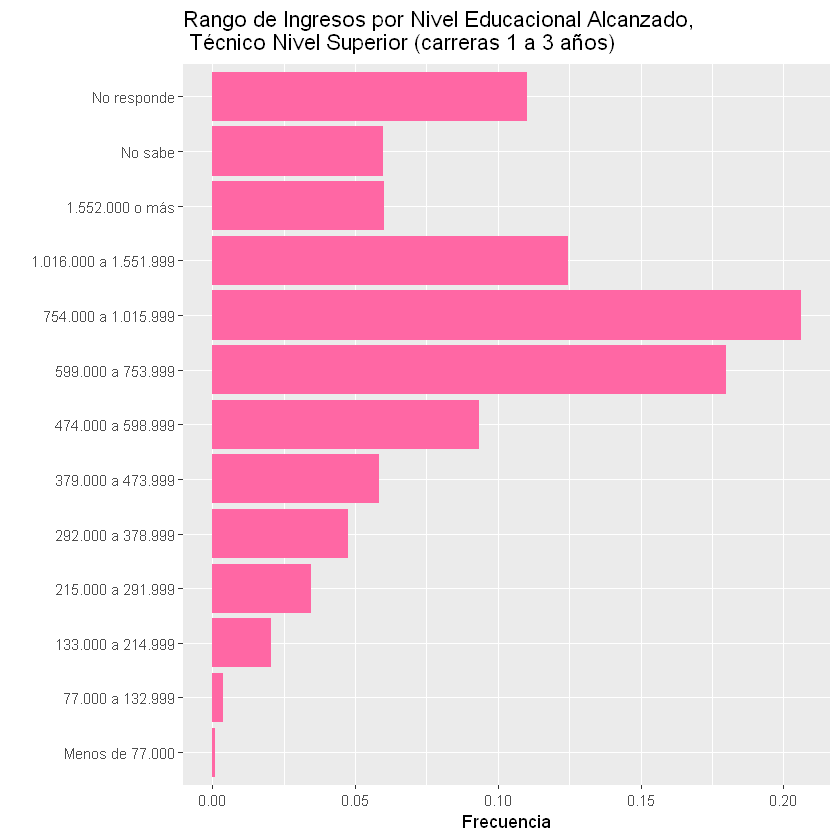

In [100]:
n=15
Educacion_ingreso_f_tab(n)
grafico_region_ingresos(n)

5. Analisis del sistema de salud de los encuestados por macrozona, region, area (Urbano o Rural) y nivel educacional.

In [101]:
sistema_salud=c('FONASA A'
,'FONASA B'
,'FONASA C'
,'FONASA D'
,'FONASA desconoce grupo'
,'FFAA Y de Orden'
,'ISAPRE'
,'Otro'
,'Ninguno'
,'No sabe'
,'No responde')
sistema_salud=as.factor(sistema_salud)

In [102]:
sistema_salud_rep=c(rep('FONASA A',15)
,rep('FONASA B',15)
,rep('FONASA C',15)
,rep('FONASA D',15)
,rep('FONASA desconoce grupo',15)
,rep('FFAA Y de Orden',15)
,rep('ISAPRE',15)
,rep('Otro',15)
,rep('Ninguno',15)
,rep('No sabe',15)
,rep('No responde',15))

In [103]:
macro=c('Norte','Centro','Sur','Metropolitana')

In [104]:
mac=c(rep('Norte',11),rep('Centro',11),rep('Sur',11),rep('Metropolitana',11))

In [105]:
salud_macrozona=data.frame(Macrozona=mac,'Sistema de salud'=sistema_salud,svytable(~interaction(S1.enc,Macrozona), diseño))
colnames(salud_macrozona)=c('Macrozona','Sistema de salud','Proporcion','Freq')
salud_macrozona=salud_macrozona %>% mutate(Proporcion=(Freq/sum(Freq))*100)
salud_macrozona

Macrozona,Sistema de salud,Proporcion,Freq
<chr>,<fct>,<dbl>,<dbl>
Norte,FONASA A,1.97053220,282532.581
Norte,FONASA B,4.77378208,684459.239
Norte,FONASA C,1.66400556,238583.153
Norte,FONASA D,0.99346601,142441.984
Norte,FONASA desconoce grupo,0.36941398,52966.140
Norte,FFAA Y de Orden,0.09272170,13294.327
Norte,ISAPRE,1.95058875,279673.112
Norte,Otro,0.08016463,11493.910
Norte,Ninguno,0.12282147,17609.998


In [106]:
ssalud=data.frame('Sistema de salud'=sistema_salud,svytable(~S1.enc, diseño))
colnames(ssalud)=c('Sistema de salud','Proporcion','Freq')
ssalud=ssalud %>% mutate(Proporcion=(Freq/sum(Freq))*100)
ssalud

Sistema de salud,Proporcion,Freq
<fct>,<dbl>,<dbl>
FONASA A,23.16284161,3321060.885
FONASA B,23.38415867,3352793.064
FONASA C,14.02936592,2011513.924
FONASA D,10.15675842,1456264.033
FONASA desconoce grupo,3.92581812,562879.167
FFAA Y de Orden,1.50215503,215377.215
ISAPRE,17.07803478,2448628.466
Otro,0.88038769,126228.948
Ninguno,2.94169247,421776.393


In [107]:
ssalud[order(ssalud$Proporcion,decreasing = TRUE),]

,Sistema de salud,Proporcion,Freq
,<fct>,<dbl>,<dbl>
2,FONASA B,23.38415867,3352793.064
1,FONASA A,23.16284161,3321060.885
7,ISAPRE,17.07803478,2448628.466
3,FONASA C,14.02936592,2011513.924
4,FONASA D,10.15675842,1456264.033
5,FONASA desconoce grupo,3.92581812,562879.167
9,Ninguno,2.94169247,421776.393
11,No responde,2.92026528,418704.188
6,FFAA Y de Orden,1.50215503,215377.215


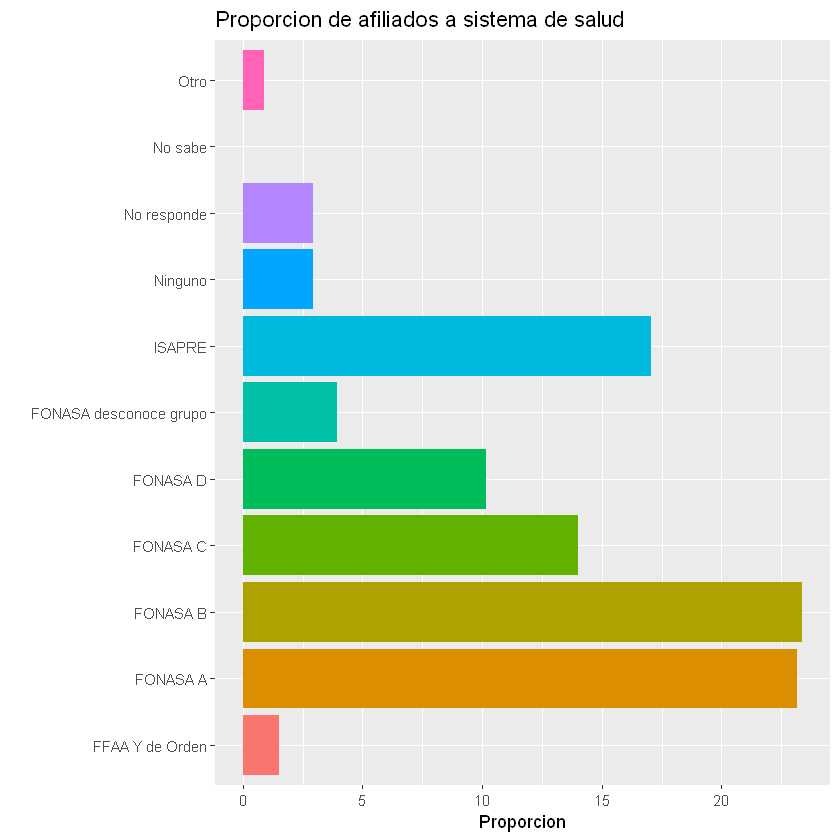

In [108]:
ssalud %>% ggplot(aes(x = `Sistema de salud`, y = Proporcion,fill=`Sistema de salud`)) +  
  theme(legend.position = "none")+  
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title ="Proporcion de afiliados a sistema de salud",y='Proporcion',x='') 

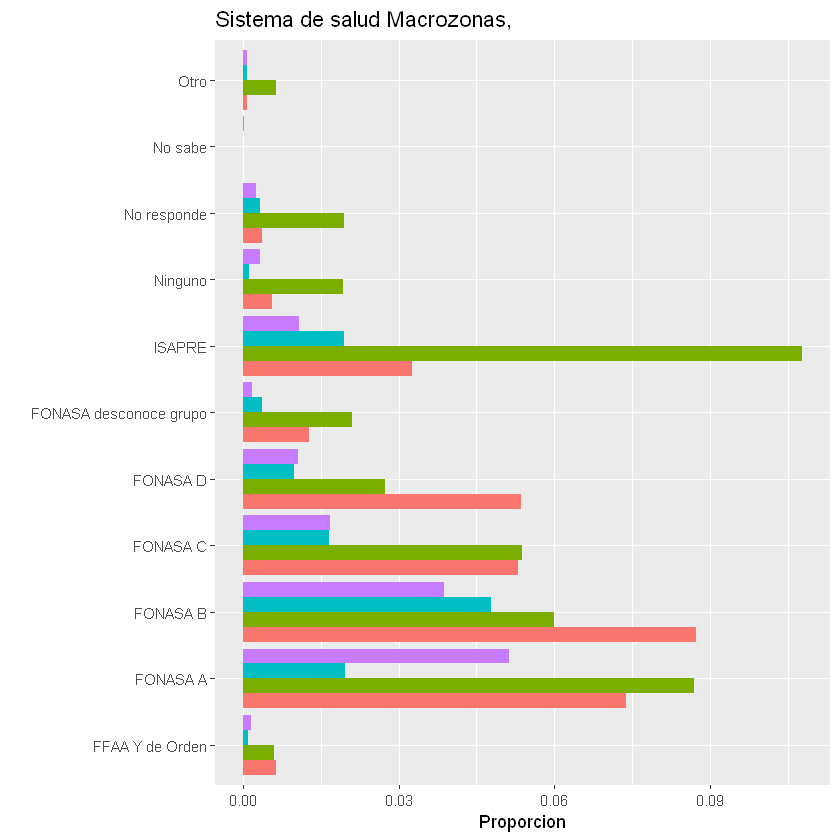

In [109]:
salud_macrozona %>% mutate(Proporcion=Freq/sum(Freq)) %>% 
ggplot(aes(x = `Sistema de salud`, y = Proporcion,fill=Macrozona)) +  
  theme(legend.position = "none")+ geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title ="Sistema de salud Macrozonas,",y='Proporcion',x='') 

In [110]:
salud_macrozona_tab_f <- function(n) {    
tabla= salud_macrozona %>% filter(Macrozona== macro[n])%>% mutate(Proporcion=(Freq/sum(Freq))*100)
return(tabla)
}
salud_macrozona_gra_f <- function(n) {    
grafico=salud_macrozona %>% filter(Macrozona== macro[n])%>% mutate(Proporcion=Freq/sum(Freq)) %>% 
ggplot(aes(x = `Sistema de salud`, y = Proporcion,fill=Macrozona)) +  
  theme(legend.position = "none")+ scale_fill_manual(values=c(color_m[n]))+ 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title =paste( "Sistema de salud Macrozona,",macro[n]),y='Frecuencia',x='') 
return(grafico)
}

Macrozona,Sistema de salud,Proporcion,Freq
<chr>,<fct>,<dbl>,<dbl>
Norte,FONASA A,15.9475890,282532.58
Norte,FONASA B,38.6343925,684459.24
Norte,FONASA C,13.4668577,238583.15
Norte,FONASA D,8.0401567,142441.98
Norte,FONASA desconoce grupo,2.9896808,52966.14
Norte,FFAA Y de Orden,0.7504001,13294.33
Norte,ISAPRE,15.7861859,279673.11
Norte,Otro,0.6487753,11493.91
Norte,Ninguno,0.9939987,17610.00


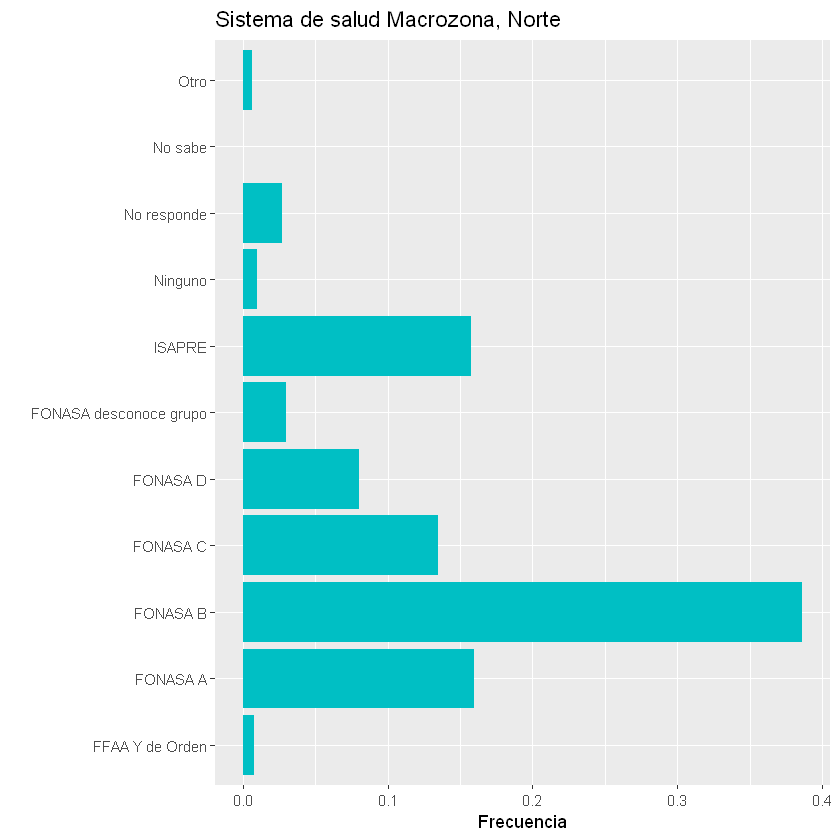

In [111]:
n=1
salud_macrozona_tab_f(n)
salud_macrozona_gra_f(n)

Macrozona,Sistema de salud,Proporcion,Freq
<chr>,<fct>,<dbl>,<dbl>
Centro,FONASA A,22.3497365,1057419.90
Centro,FONASA B,26.4708692,1252400.61
Centro,FONASA C,16.0895934,761237.44
Centro,FONASA D,16.2572994,769172.01
Centro,FONASA desconoce grupo,3.8949058,184277.38
Centro,FFAA Y de Orden,1.9610498,92781.99
Centro,ISAPRE,9.8849457,467680.60
Centro,Otro,0.2732161,12926.51
Centro,Ninguno,1.7016743,80510.31


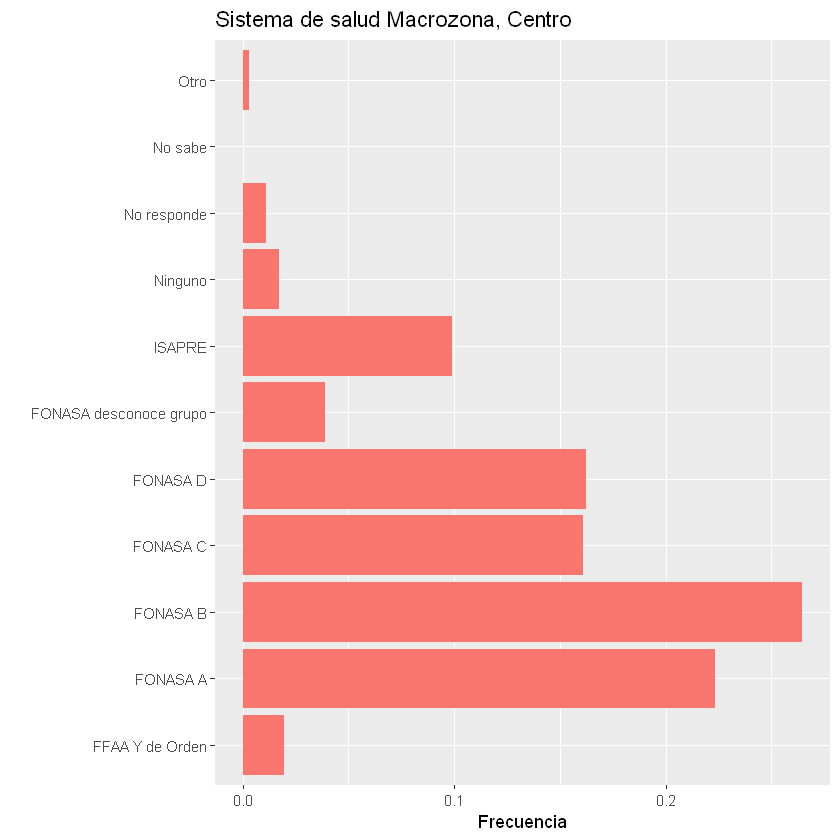

In [112]:
n=2
salud_macrozona_tab_f(n)
salud_macrozona_gra_f(n)

Macrozona,Sistema de salud,Proporcion,Freq
<chr>,<fct>,<dbl>,<dbl>
Sur,FONASA A,37.0296370,735643.359
Sur,FONASA B,28.0050114,556357.077
Sur,FONASA C,12.0730097,239846.515
Sur,FONASA D,7.6413394,151805.446
Sur,FONASA desconoce grupo,1.2602915,25037.379
Sur,FFAA Y de Orden,1.1871224,23583.777
Sur,ISAPRE,7.8551146,156052.376
Sur,Otro,0.5695981,11315.830
Sur,Ninguno,2.3879271,47439.371


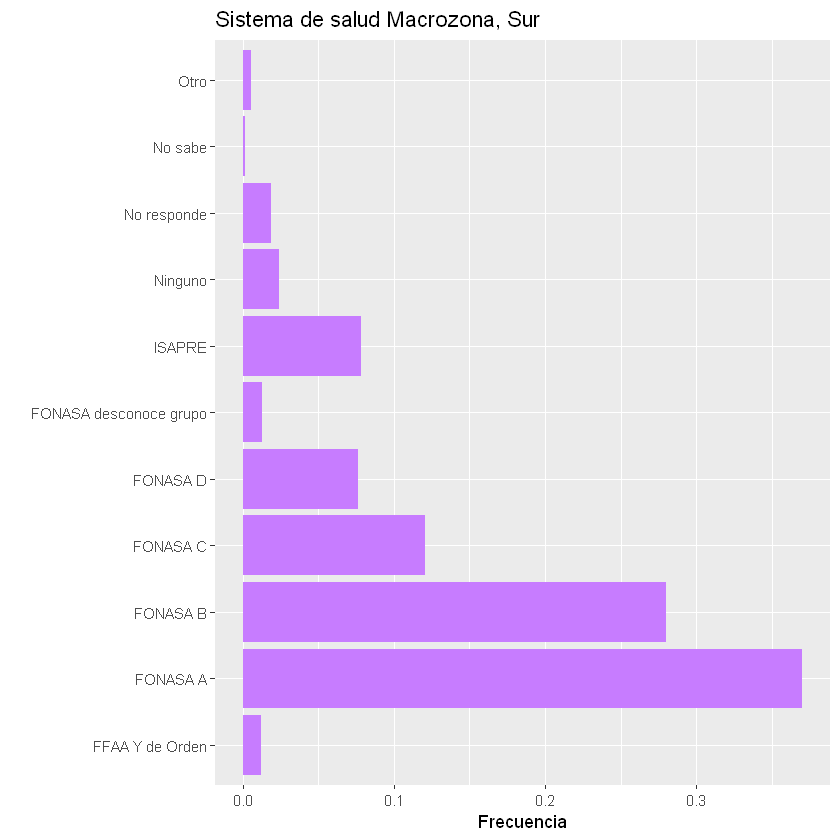

In [113]:
n=3
salud_macrozona_tab_f(n)
salud_macrozona_gra_f(n)

Macrozona,Sistema de salud,Proporcion,Freq
<chr>,<fct>,<dbl>,<dbl>
Metropolitana,FONASA A,21.295916,1245465.05
Metropolitana,FONASA B,14.697692,859576.13
Metropolitana,FONASA C,13.197629,771846.82
Metropolitana,FONASA D,6.717158,392844.59
Metropolitana,FONASA desconoce grupo,5.139860,300598.27
Metropolitana,FFAA Y de Orden,1.465657,85717.12
Metropolitana,ISAPRE,26.421397,1545222.38
Metropolitana,Otro,1.547313,90492.70
Metropolitana,Ninguno,4.722965,276216.71


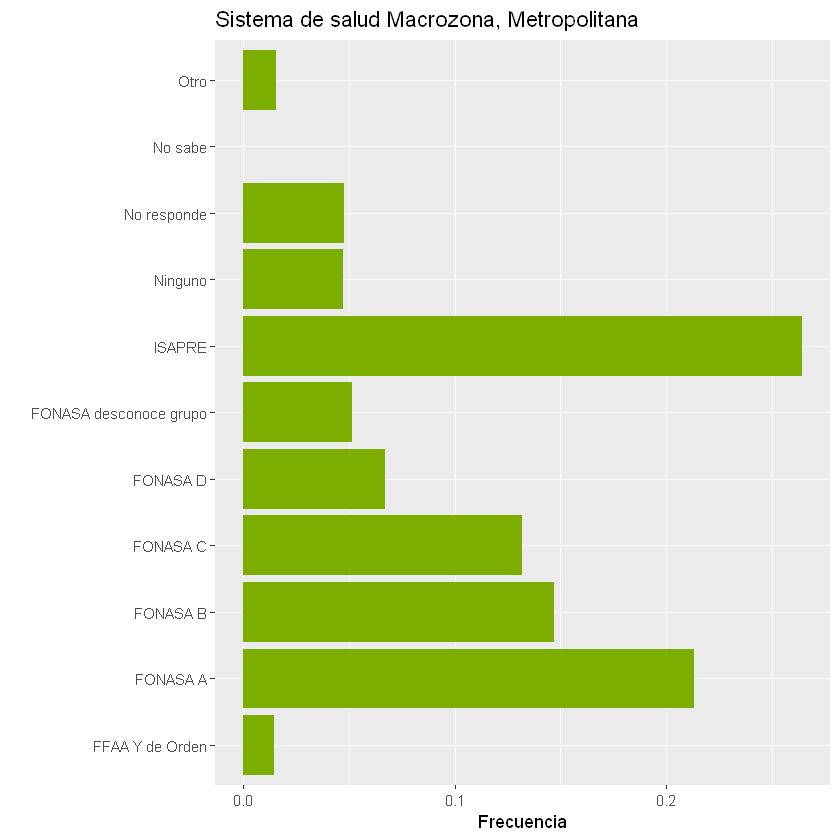

In [114]:
n=4
salud_macrozona_tab_f(n)
salud_macrozona_gra_f(n)

In [115]:
salud_region=data.frame(Region=regiones,'Sistema de salud'=sistema_salud_rep,svytable(~interaction(Region,S1.enc), diseño))
colnames(salud_region)=c('Region','Sistema de salud','Proporcion','Freq')

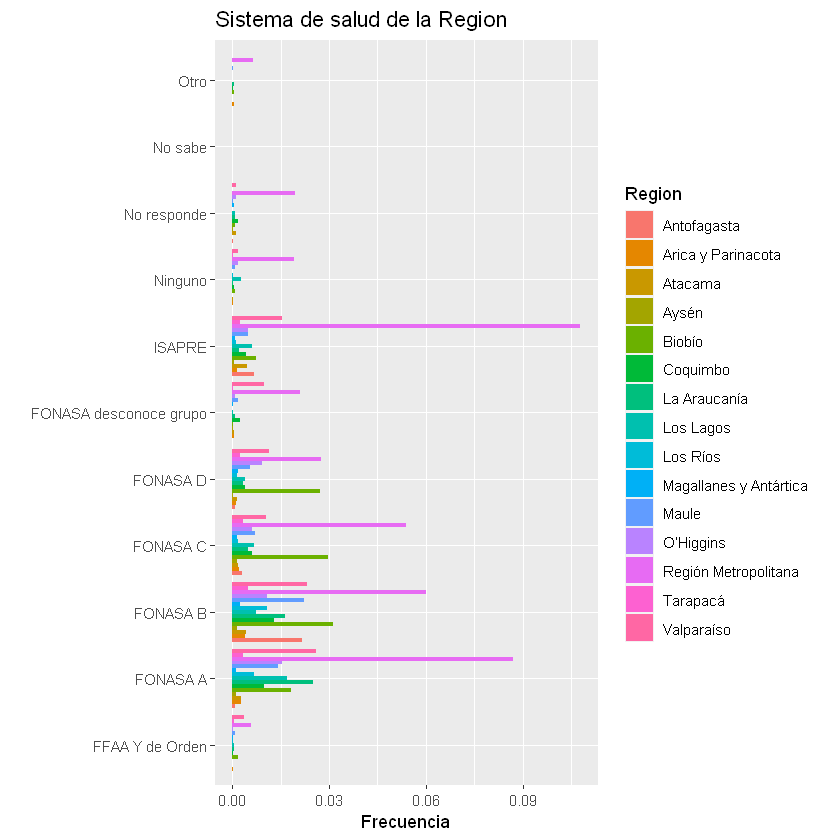

In [116]:
salud_region %>% mutate(Proporcion=(Freq/sum(Freq))*100) %>% 
ggplot(aes(x = `Sistema de salud`, y = Proporcion/100,fill=Region)) +  
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title ="Sistema de salud de la Region",y='Frecuencia',x='')

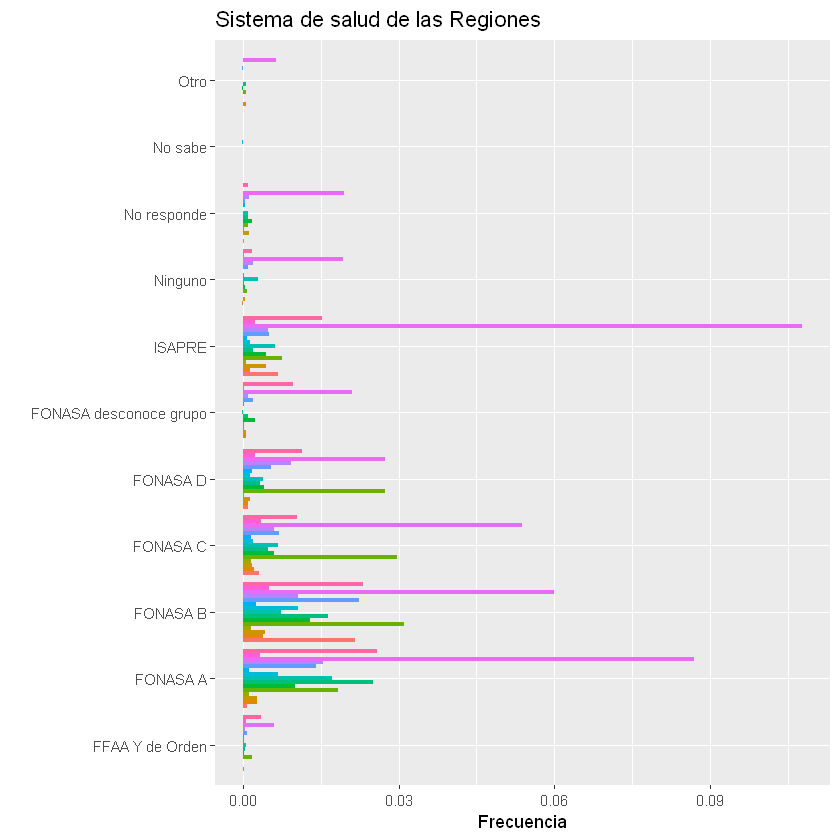

In [117]:
salud_region %>% mutate(Proporcion=(Freq/sum(Freq))*100) %>% 
ggplot(aes(x = `Sistema de salud`, y = Proporcion/100,fill=Region)) +  
  theme(legend.position = "none")+ 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title ="Sistema de salud de las Regiones",y='Frecuencia',x='')

In [118]:
salud_region_tab_f <- function(n) {    
tabla=salud_region %>% filter(Region== regiones[n])%>% mutate(Proporcion=(Freq/sum(Freq))*100)
return(tabla)
}

salud_region_gra_f <- function(n) {    
grafico=salud_region %>% filter(Region== regiones[n])%>% mutate(Proporcion=(Freq/sum(Freq))*100) %>% 
ggplot(aes(x = `Sistema de salud`, y = Proporcion/100,fill=Region)) +  
  theme(legend.position = "none")+ scale_fill_manual(values=c(color_region[n]))+ 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title =paste( "Sistema de salud de la Region de",regiones[n]),y='Frecuencia',x='')
return(grafico)
}

Region,Sistema de salud,Proporcion,Freq
<fct>,<chr>,<dbl>,<dbl>
Tarapacá,FONASA A,18.9227913,48284.908
Tarapacá,FONASA B,28.3165055,72254.661
Tarapacá,FONASA C,19.5736075,49945.583
Tarapacá,FONASA D,13.7859730,35177.391
Tarapacá,FONASA desconoce grupo,0.8948124,2283.275
Tarapacá,FFAA Y de Orden,3.0584574,7804.205
Tarapacá,ISAPRE,13.1780664,33626.208
Tarapacá,Otro,0.0000000,0.000
Tarapacá,Ninguno,1.7652093,4504.249


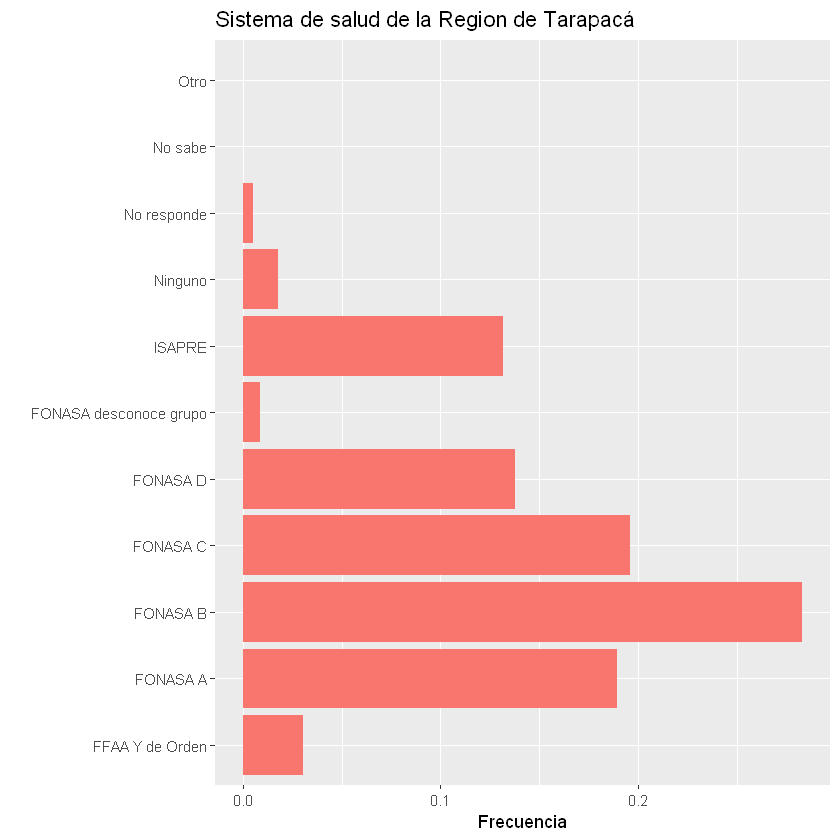

In [119]:
n=1
salud_region_tab_f(n)
salud_region_gra_f(n)

Region,Sistema de salud,Proporcion,Freq
<fct>,<chr>,<dbl>,<dbl>
Antofagasta,FONASA A,2.5966504,12530.526
Antofagasta,FONASA B,64.2497939,310047.018
Antofagasta,FONASA C,9.1971419,44382.188
Antofagasta,FONASA D,3.0061325,14506.543
Antofagasta,FONASA desconoce grupo,0.0000000,0.000
Antofagasta,FFAA Y de Orden,0.0000000,0.000
Antofagasta,ISAPRE,19.9808116,96420.404
Antofagasta,Otro,0.0000000,0.000
Antofagasta,Ninguno,0.0000000,0.000


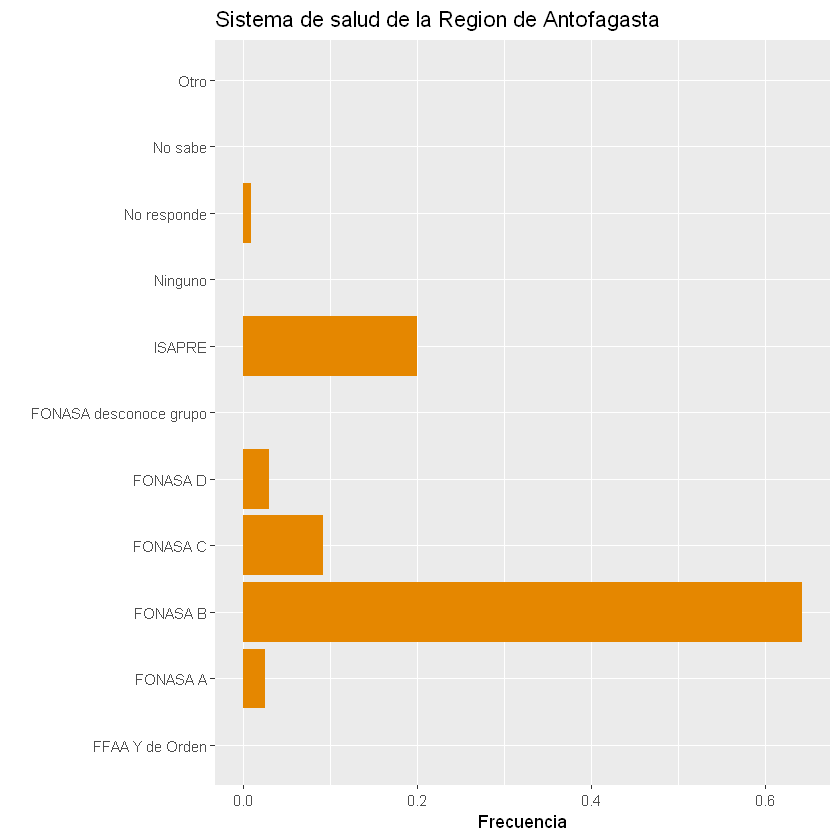

In [120]:
n=2
salud_region_tab_f(n)
salud_region_gra_f(n)

Region,Sistema de salud,Proporcion,Freq
<fct>,<chr>,<dbl>,<dbl>
Atacama,FONASA A,15.916028,38399.327
Atacama,FONASA B,25.800682,62247.241
Atacama,FONASA C,10.178367,24556.531
Atacama,FONASA D,8.295715,20014.408
Atacama,FONASA desconoce grupo,3.934917,9493.458
Atacama,FFAA Y de Orden,0.000000,0.000
Atacama,ISAPRE,27.065410,65298.549
Atacama,Otro,0.000000,0.000
Atacama,Ninguno,2.112973,5097.801


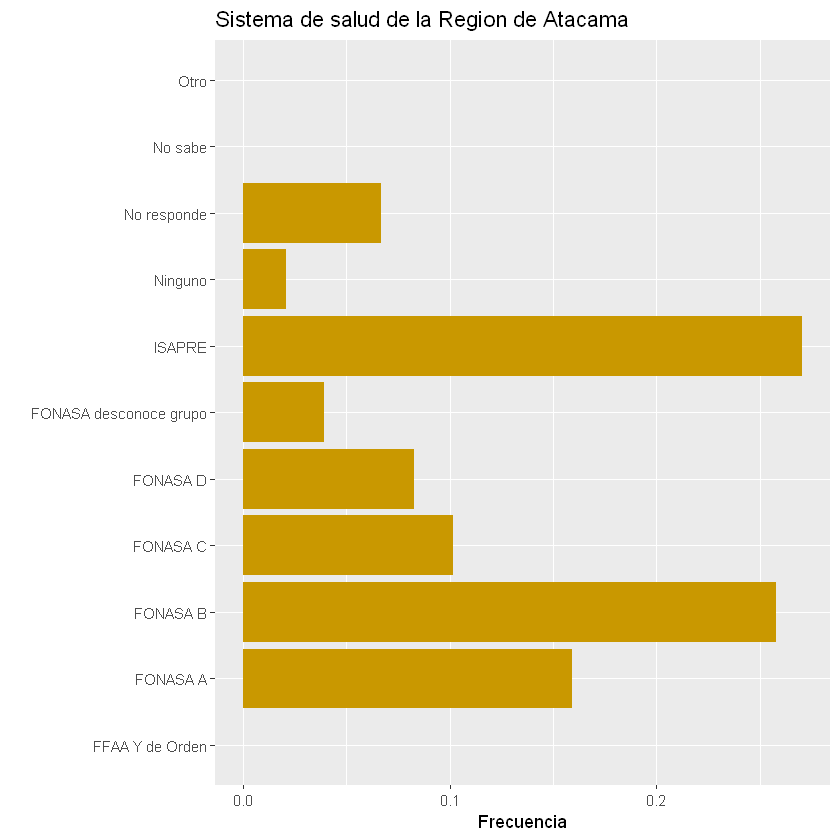

In [121]:
n=3
salud_region_tab_f(n)
salud_region_gra_f(n)

Region,Sistema de salud,Proporcion,Freq
<fct>,<chr>,<dbl>,<dbl>
Coquimbo,FONASA A,23.6413674,143404.266
Coquimbo,FONASA B,30.4134095,184482.251
Coquimbo,FONASA C,14.4304572,87532.548
Coquimbo,FONASA D,9.5296467,57805.116
Coquimbo,FONASA desconoce grupo,5.4903563,33303.510
Coquimbo,FFAA Y de Orden,0.4614516,2799.082
Coquimbo,ISAPRE,10.4279747,63254.211
Coquimbo,Otro,0.3325034,2016.905
Coquimbo,Ninguno,1.0078808,6113.623


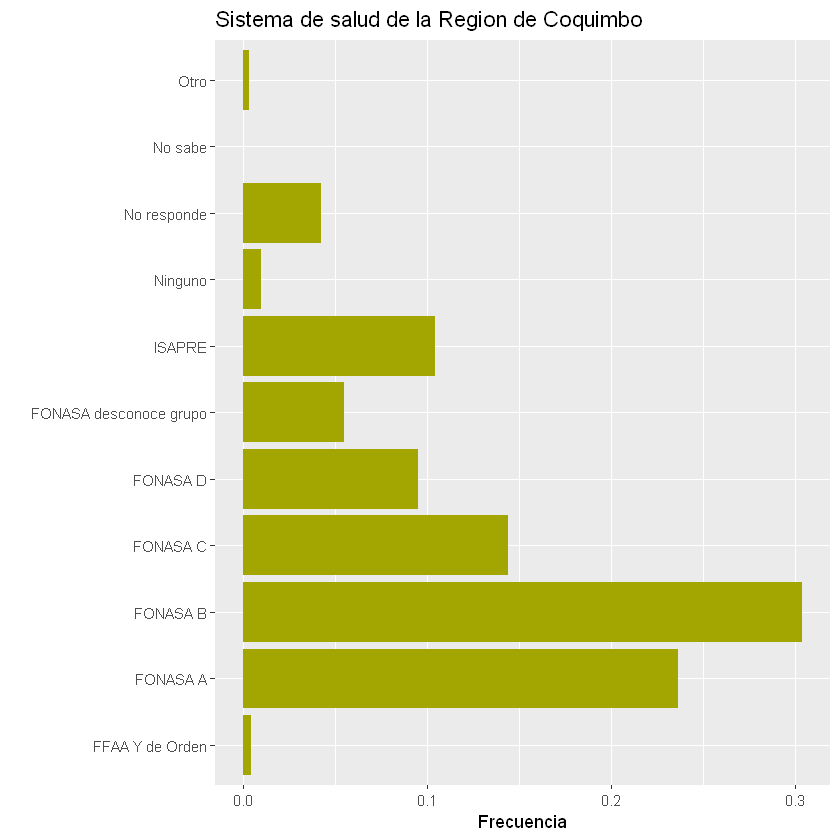

In [122]:
n=4
salud_region_tab_f(n)
salud_region_gra_f(n)

Region,Sistema de salud,Proporcion,Freq
<fct>,<chr>,<dbl>,<dbl>
Valparaíso,FONASA A,25.25767520,371783.380
Valparaíso,FONASA B,22.61414469,332871.616
Valparaíso,FONASA C,10.12016308,148964.955
Valparaíso,FONASA D,11.20470755,164929.037
Valparaíso,FONASA desconoce grupo,9.50099387,139851.019
Valparaíso,FFAA Y de Orden,3.47205513,51107.332
Valparaíso,ISAPRE,14.93406601,219823.776
Valparaíso,Otro,0.08000771,1177.683
Valparaíso,Ninguno,1.77831743,26176.157


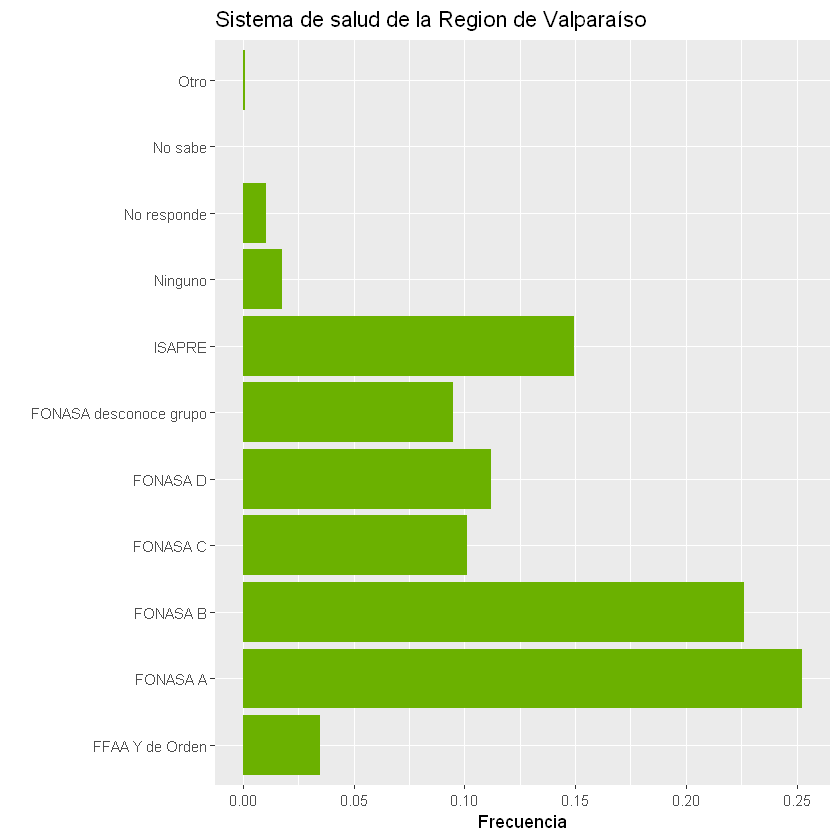

In [123]:
n=5
salud_region_tab_f(n)
salud_region_gra_f(n)

Region,Sistema de salud,Proporcion,Freq
<fct>,<chr>,<dbl>,<dbl>
O’Higgins,FONASA A,30.25518202,220895.5043
O’Higgins,FONASA B,20.99612674,153294.4010
O’Higgins,FONASA C,11.84171911,86457.3385
O’Higgins,FONASA D,18.41072550,134418.1797
O’Higgins,FONASA desconoce grupo,1.96287310,14331.0935
O’Higgins,FFAA Y de Orden,0.78327649,5718.7643
O’Higgins,ISAPRE,9.38776438,68540.8187
O’Higgins,Otro,0.03693815,269.6884
O’Higgins,Ninguno,3.76801925,27510.6100


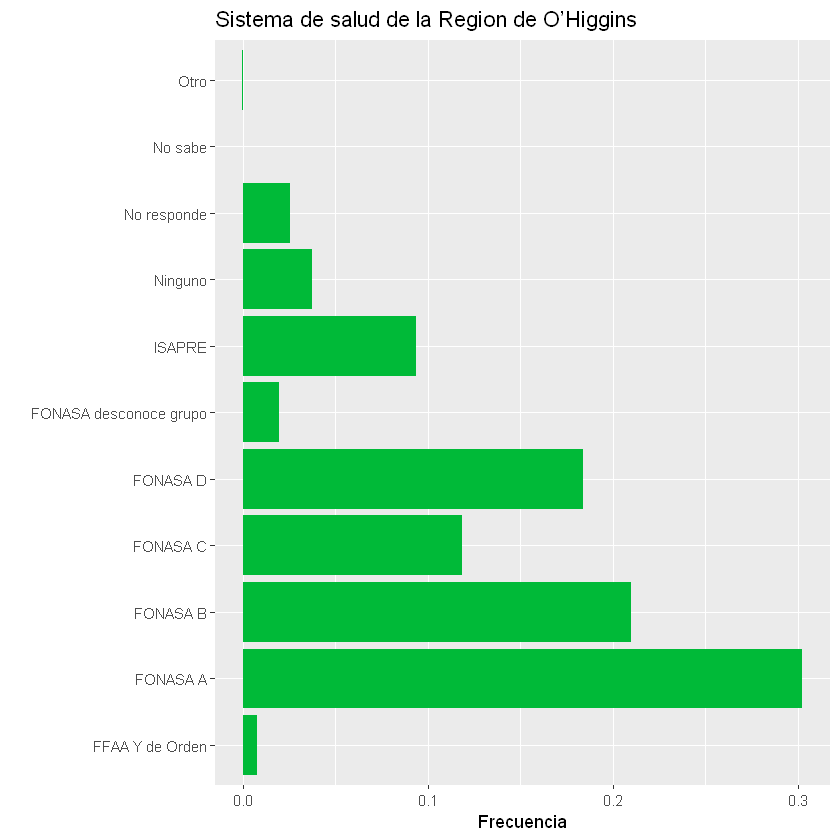

In [124]:
n=6
salud_region_tab_f(n)
salud_region_gra_f(n)

Region,Sistema de salud,Proporcion,Freq
<fct>,<chr>,<dbl>,<dbl>
Maule,FONASA A,24.3125915,202725.195
Maule,FONASA B,38.4494284,320602.100
Maule,FONASA C,12.0741353,100677.521
Maule,FONASA D,9.3864029,78266.455
Maule,FONASA desconoce grupo,3.3408034,27856.554
Maule,FFAA Y de Orden,1.3775220,11486.164
Maule,ISAPRE,8.5564749,71346.283
Maule,Otro,0.2054114,1712.778
Maule,Ninguno,1.6787916,13998.234


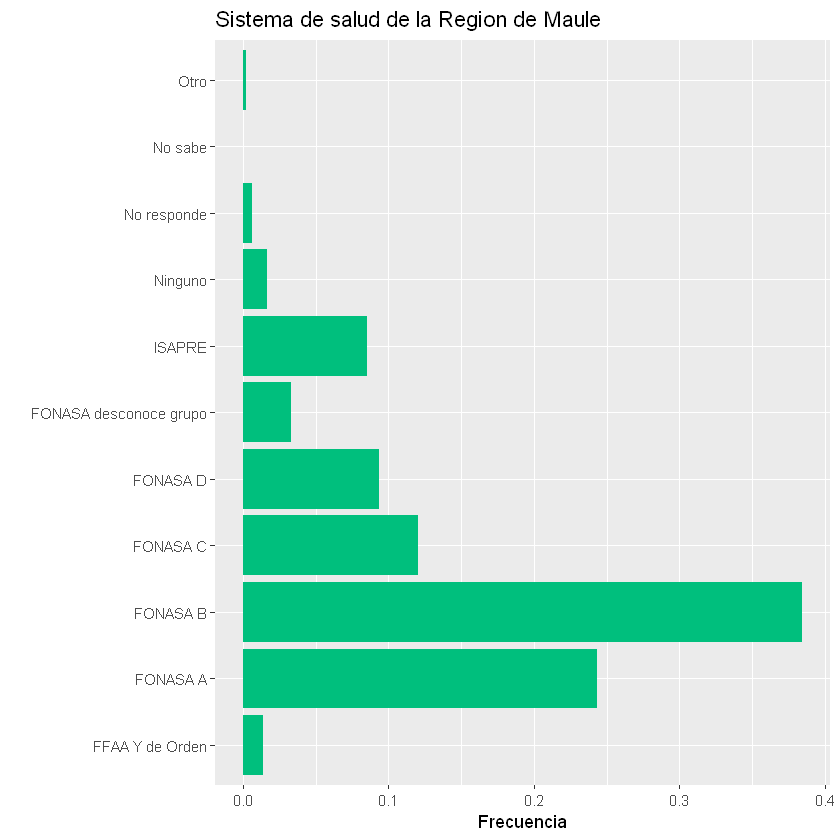

In [125]:
n=7
salud_region_tab_f(n)
salud_region_gra_f(n)

Region,Sistema de salud,Proporcion,Freq
<fct>,<chr>,<dbl>,<dbl>
Biobío,FONASA A,15.4550328,262015.816
Biobío,FONASA B,26.2856837,445632.498
Biobío,FONASA C,25.0767912,425137.624
Biobío,FONASA D,23.0961133,391558.340
Biobío,FONASA desconoce grupo,0.1320506,2238.711
Biobío,FFAA Y de Orden,1.4433499,24469.732
Biobío,ISAPRE,6.3686064,107969.723
Biobío,Otro,0.5760701,9766.364
Biobío,Ninguno,0.7565026,12825.314


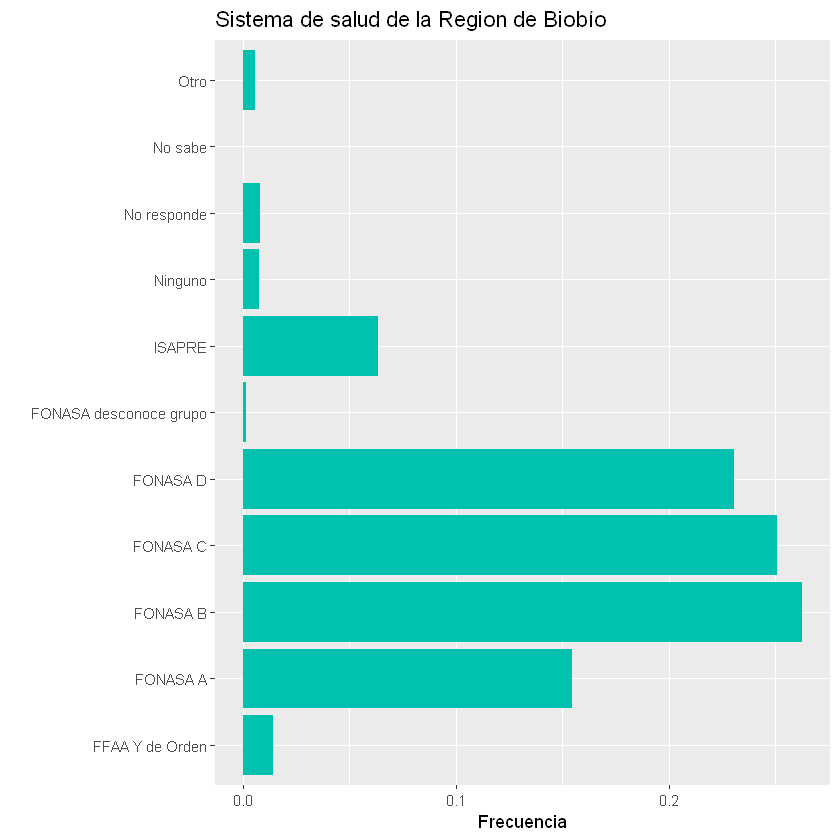

In [126]:
n=8
salud_region_tab_f(n)
salud_region_gra_f(n)

Region,Sistema de salud,Proporcion,Freq
<fct>,<chr>,<dbl>,<dbl>
La Araucanía,FONASA A,45.5769215,358586.913
La Araucanía,FONASA B,30.0861235,236709.497
La Araucanía,FONASA C,8.7190458,68599.098
La Araucanía,FONASA D,6.1388314,48298.668
La Araucanía,FONASA desconoce grupo,1.8331986,14423.112
La Araucanía,FFAA Y de Orden,0.8405793,6613.451
La Araucanía,ISAPRE,3.5936494,28273.863
La Araucanía,Otro,1.2202514,9600.609
La Araucanía,Ninguno,0.2870933,2258.773


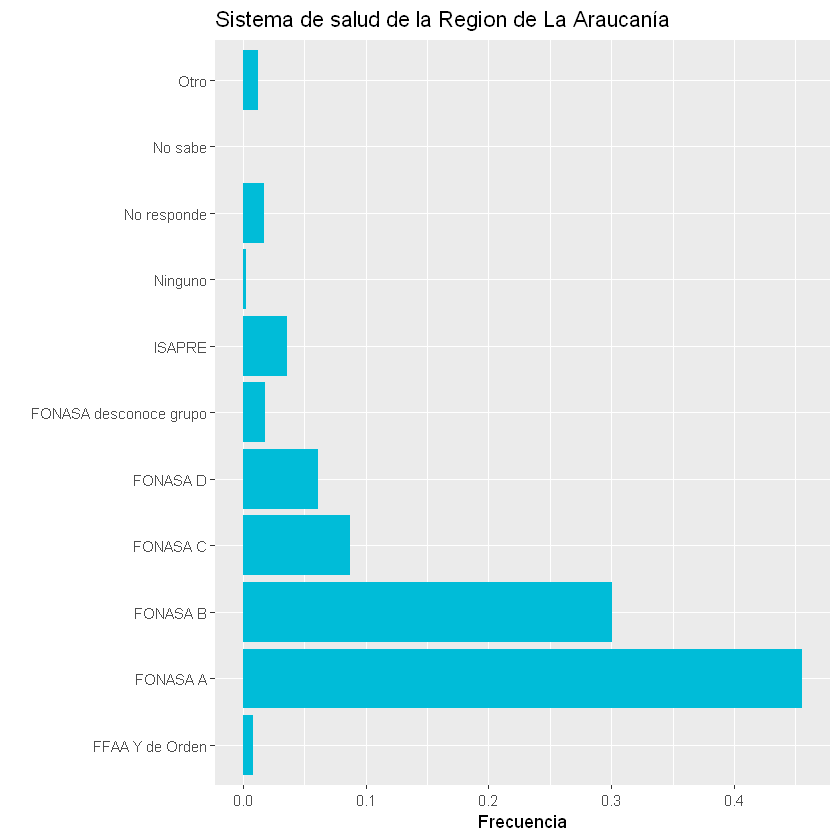

In [127]:
n=9
salud_region_tab_f(n)
salud_region_gra_f(n)

Region,Sistema de salud,Proporcion,Freq
<fct>,<chr>,<dbl>,<dbl>
Los Lagos,FONASA A,37.1621532,245316.292
Los Lagos,FONASA B,16.0766933,106126.111
Los Lagos,FONASA C,14.8534664,98051.296
Los Lagos,FONASA D,8.3714570,55261.996
Los Lagos,FONASA desconoce grupo,0.2424975,1600.784
Los Lagos,FFAA Y de Orden,1.4102743,9309.559
Los Lagos,ISAPRE,13.4882017,89038.857
Los Lagos,Otro,0.0000000,0.000
Los Lagos,Ninguno,6.2419095,41204.343


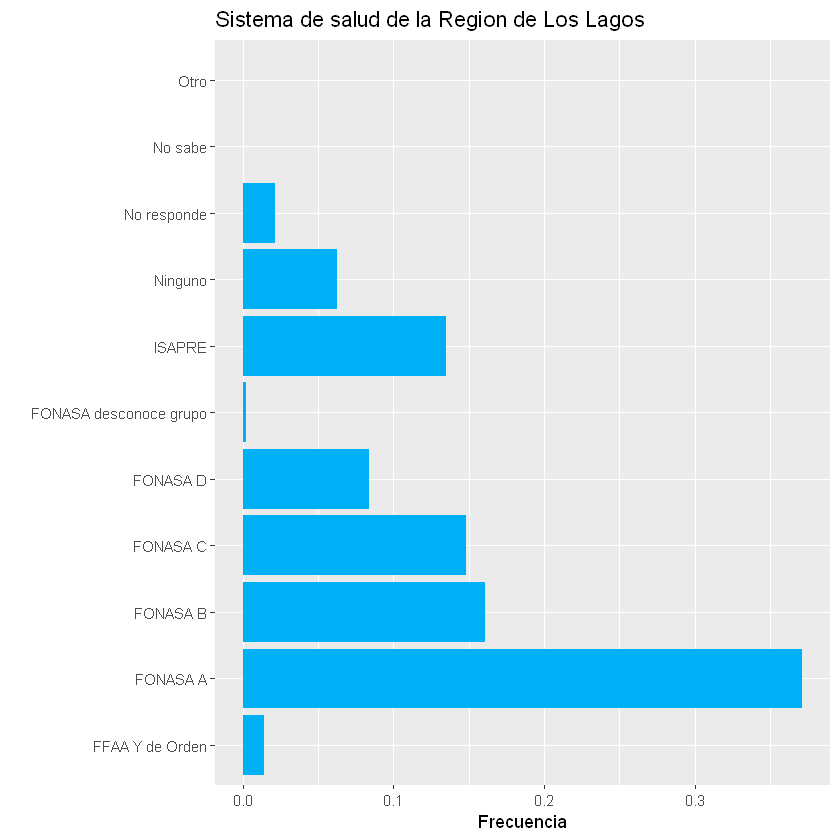

In [128]:
n=10
salud_region_tab_f(n)
salud_region_gra_f(n)

Region,Sistema de salud,Proporcion,Freq
<fct>,<chr>,<dbl>,<dbl>
Aysén,FONASA A,19.9564188,16705.5183
Aysén,FONASA B,27.8413642,23306.0060
Aysén,FONASA C,26.3495195,22057.1828
Aysén,FONASA D,3.3916162,2839.1219
Aysén,FONASA desconoce grupo,4.9864819,4174.1840
Aysén,FFAA Y de Orden,0.9963467,834.0418
Aysén,ISAPRE,10.2829576,8607.8639
Aysén,Otro,0.7744704,648.3092
Aysén,Ninguno,0.9548827,799.3323


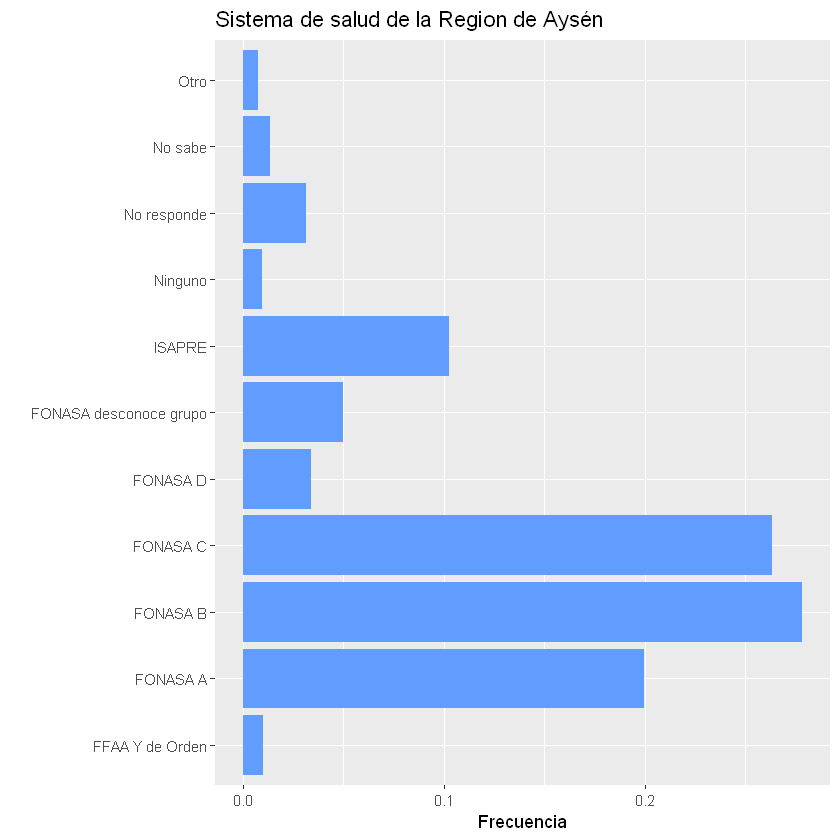

In [129]:
n=11
salud_region_tab_f(n)
salud_region_gra_f(n)

Region,Sistema de salud,Proporcion,Freq
<fct>,<chr>,<dbl>,<dbl>
Magallanes y Antártica,FONASA A,14.0079907,18441.2396
Magallanes y Antártica,FONASA B,27.7820384,36574.4978
Magallanes y Antártica,FONASA C,17.7592901,23379.7501
Magallanes y Antártica,FONASA D,18.8691791,24840.8968
Magallanes y Antártica,FONASA desconoce grupo,3.6759378,4839.2986
Magallanes y Antártica,FFAA Y de Orden,2.9989302,3948.0316
Magallanes y Antártica,ISAPRE,8.5056002,11197.4526
Magallanes y Antártica,Otro,0.8104279,1066.9121
Magallanes y Antártica,Ninguno,0.5365362,706.3392


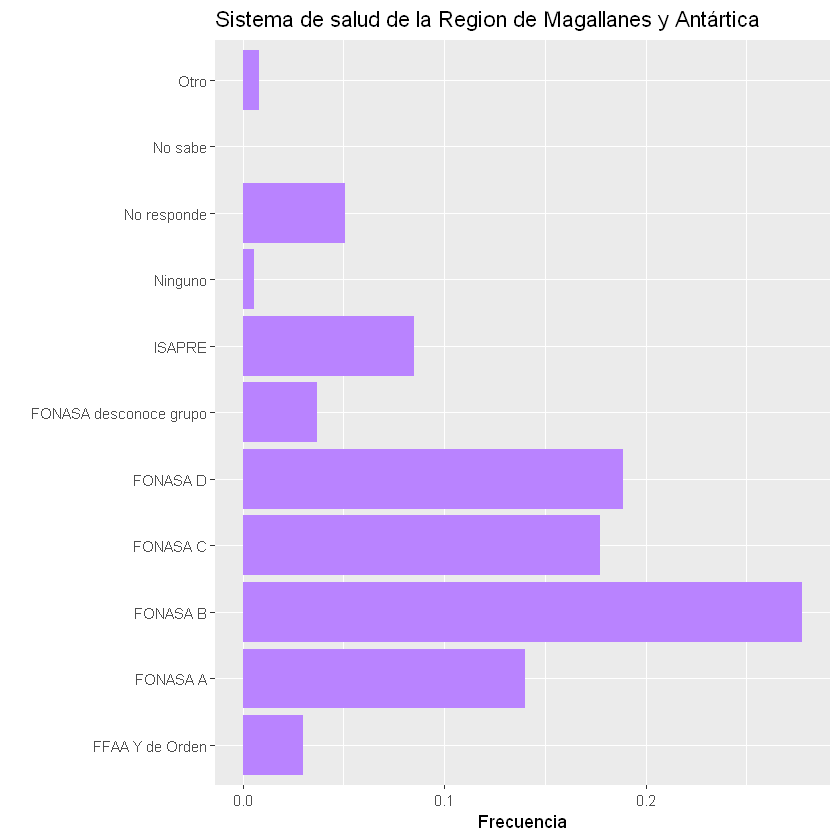

In [130]:
n=12
salud_region_tab_f(n)
salud_region_gra_f(n)

Region,Sistema de salud,Proporcion,Freq
<fct>,<chr>,<dbl>,<dbl>
Región Metropolitana,FONASA A,21.295916,1245465.05
Región Metropolitana,FONASA B,14.697692,859576.13
Región Metropolitana,FONASA C,13.197629,771846.82
Región Metropolitana,FONASA D,6.717158,392844.59
Región Metropolitana,FONASA desconoce grupo,5.139860,300598.27
Región Metropolitana,FFAA Y de Orden,1.465657,85717.12
Región Metropolitana,ISAPRE,26.421397,1545222.38
Región Metropolitana,Otro,1.547313,90492.70
Región Metropolitana,Ninguno,4.722965,276216.71


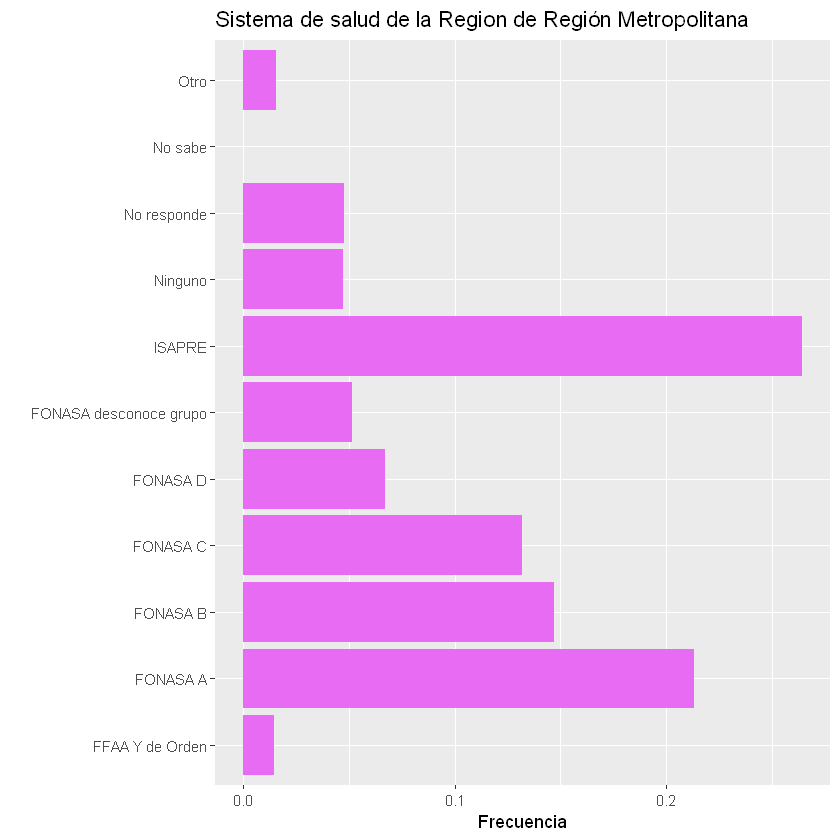

In [131]:
n=13
salud_region_tab_f(n)
salud_region_gra_f(n)

Region,Sistema de salud,Proporcion,Freq
<fct>,<chr>,<dbl>,<dbl>
Los Ríos,FONASA A,29.7779439,96593.397
Los Ríos,FONASA B,47.3646463,153640.966
Los Ríos,FONASA C,8.5576402,27759.188
Los Ríos,FONASA D,6.3397331,20564.763
Los Ríos,FONASA desconoce grupo,0.0000000,0.000
Los Ríos,FFAA Y de Orden,0.8874477,2878.694
Los Ríos,ISAPRE,5.8371043,18934.340
Los Ríos,Otro,0.0000000,0.000
Los Ríos,Ninguno,0.7616351,2470.584


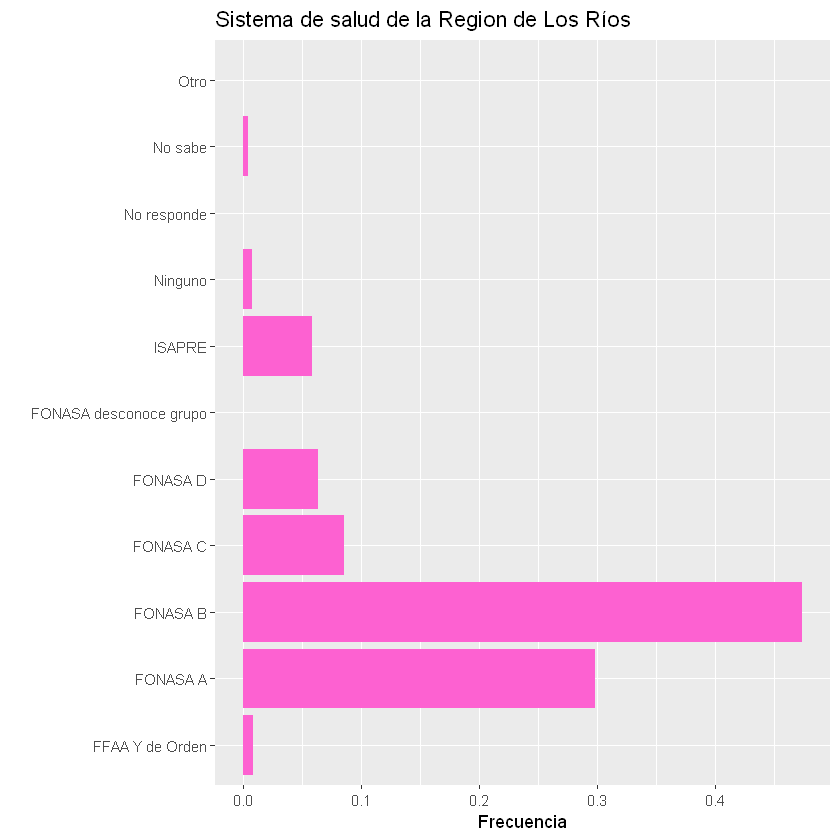

In [132]:
n=14
salud_region_tab_f(n)
salud_region_gra_f(n)

Region,Sistema de salud,Proporcion,Freq
<fct>,<chr>,<dbl>,<dbl>
Arica y Parinacota,FONASA A,21.4525567,39913.5544
Arica y Parinacota,FONASA B,29.7912270,55428.0676
Arica y Parinacota,FONASA C,17.2885990,32166.3029
Arica y Parinacota,FONASA D,8.0290907,14938.5248
Arica y Parinacota,FONASA desconoce grupo,4.2384762,7885.8969
Arica y Parinacota,FFAA Y de Orden,1.4463684,2691.0408
Arica y Parinacota,ISAPRE,11.3266182,21073.7396
Arica y Parinacota,Otro,5.0936574,9477.0043
Arica y Parinacota,Ninguno,1.0181529,1894.3244


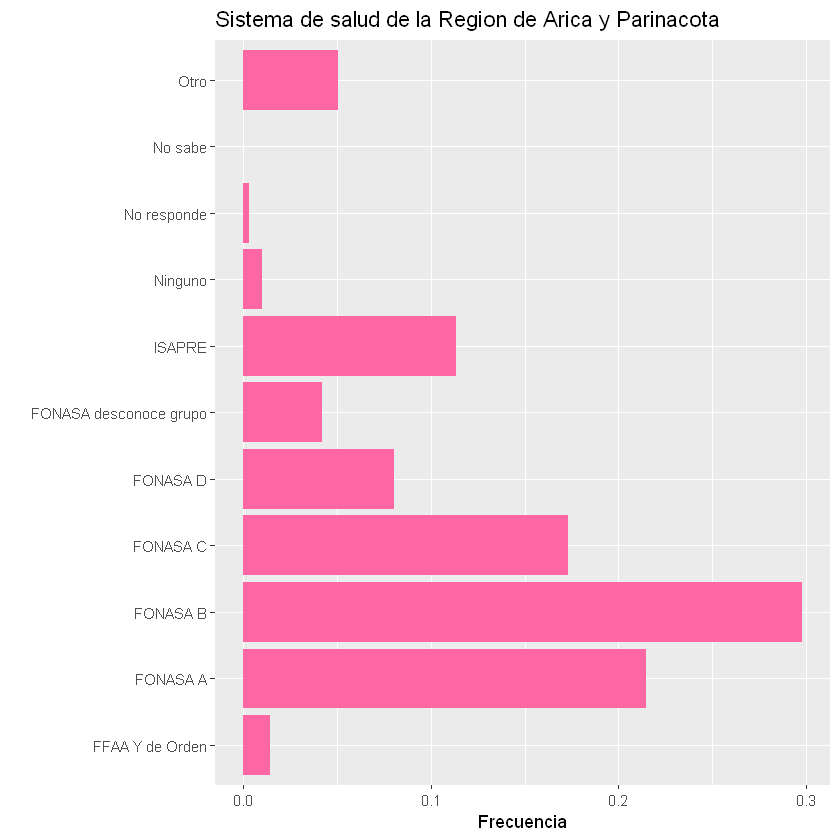

In [133]:
n=15
salud_region_tab_f(n)
salud_region_gra_f(n)

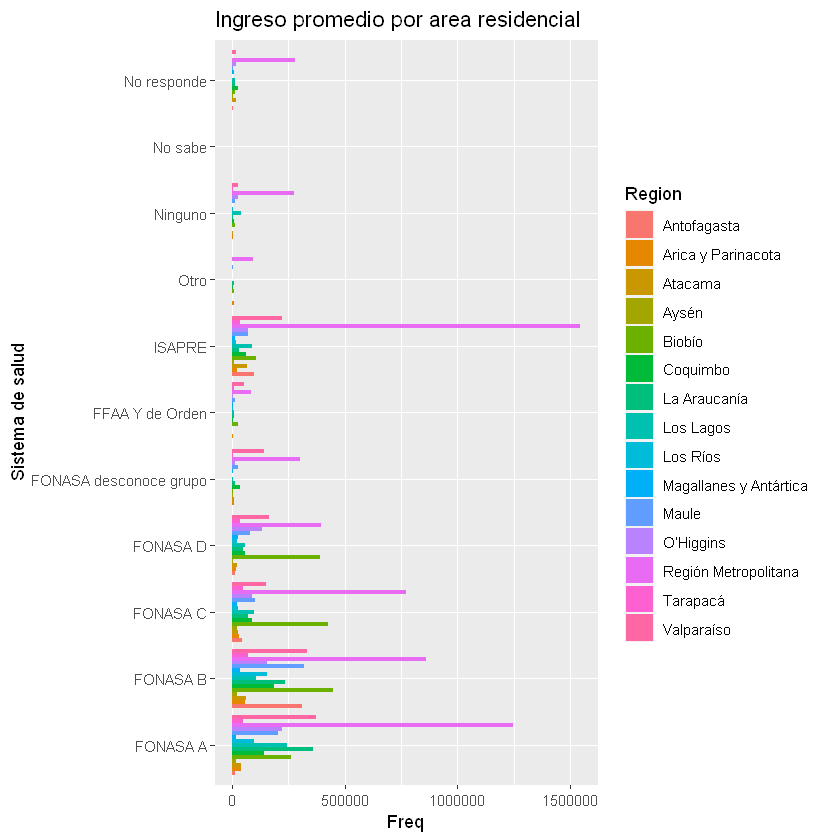

In [134]:
ggplot(salud_region, aes(x = `Sistema de salud`, y = Freq, fill = Region)) + 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title = "Ingreso promedio por area residencial") + 
  scale_x_discrete(limits = sistema_salud)

In [135]:
area_salud=c('Urbano','Rural')
area_salud=as.factor(area_salud)
area_salud_rep=c(rep('Urbano',11),rep('Rural',11))
area_salud_rep=as.factor(area_salud_rep)

In [136]:
salud_zona=data.frame(Area=area_salud_rep,'Sistema de salud'=sistema_salud,svytable(~interaction(S1.enc,Area), diseño))
colnames(salud_zona)=c('Zona','Sistema de salud','Proporcion','Freq')

In [137]:
proporcion_salud_zona=salud_zona %>% mutate(Proporcion=(Freq/sum(Freq))*100)

In [138]:
df_ordenado = proporcion_salud_zona[order(proporcion_salud_zona$Proporcion,decreasing = TRUE), ]
df_ordenado

,Zona,Sistema de salud,Proporcion,Freq
,<fct>,<fct>,<dbl>,<dbl>
2,Urbano,FONASA B,19.68491628,2822400.058
1,Urbano,FONASA A,17.98156305,2578175.283
7,Urbano,ISAPRE,16.53817979,2371224.695
3,Urbano,FONASA C,12.47490481,1788637.125
4,Urbano,FONASA D,8.98647731,1288470.509
12,Rural,FONASA A,5.18127855,742885.602
13,Rural,FONASA B,3.69924238,530393.006
5,Urbano,FONASA desconoce grupo,3.59242989,515078.357
11,Urbano,No responde,2.74554295,393652.707


In [139]:
salud_zona %>% filter(Zona== area_salud[1])%>% mutate(Proporcion=(Freq/sum(Freq))*100)

Zona,Sistema de salud,Proporcion,Freq
<fct>,<fct>,<dbl>,<dbl>
Urbano,FONASA A,20.68999726,2578175.283
Urbano,FONASA B,22.64991440,2822400.058
Urbano,FONASA C,14.35391048,1788637.125
Urbano,FONASA D,10.34004611,1288470.509
Urbano,FONASA desconoce grupo,4.13353190,515078.357
Urbano,FFAA Y de Orden,1.69037146,210636.757
Urbano,ISAPRE,19.02920750,2371224.695
Urbano,Otro,0.97973456,122084.474
Urbano,Ninguno,2.95289002,367958.873


In [140]:
salud_zona %>% filter(Zona== area_salud[2])%>% mutate(Proporcion=(Freq/sum(Freq))*100)

Zona,Sistema de salud,Proporcion,Freq
<fct>,<fct>,<dbl>,<dbl>
Rural,FONASA A,39.5803002,742885.602
Rural,FONASA B,28.2588791,530393.006
Rural,FONASA C,11.8746824,222876.799
Rural,FONASA D,8.9398933,167793.524
Rural,FONASA desconoce grupo,2.5467857,47800.811
Rural,FFAA Y de Orden,0.2525675,4740.458
Rural,ISAPRE,4.1240057,77403.771
Rural,Otro,0.2208140,4144.474
Rural,Ninguno,2.8673508,53817.521


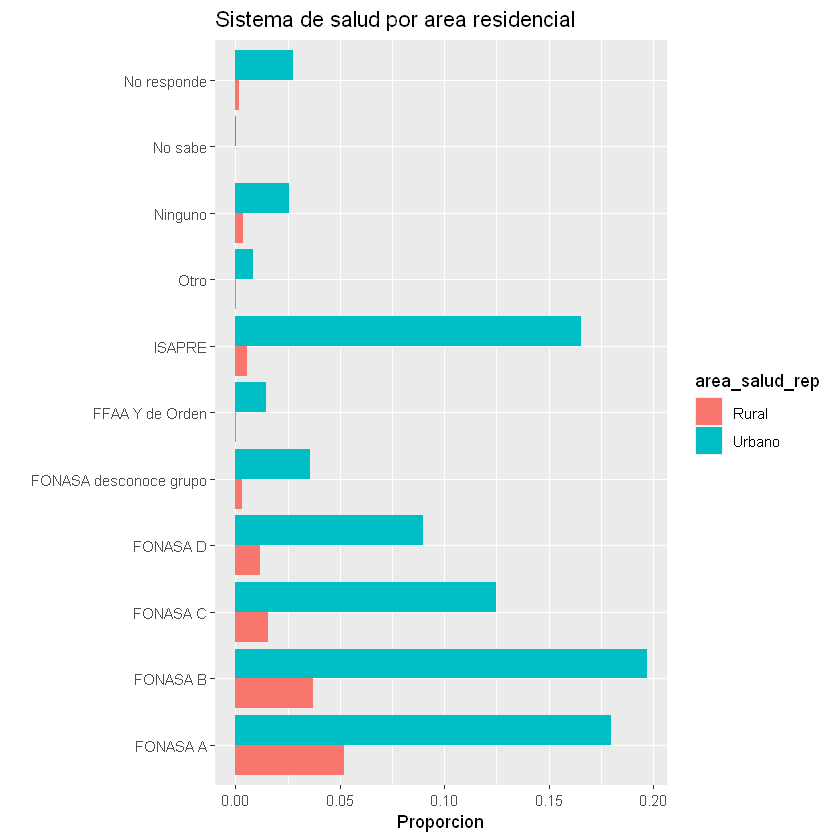

In [141]:
ggplot(salud_zona, aes(x = `Sistema de salud`, y = Freq/sum(Freq), fill = area_salud_rep)) + 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title = "Sistema de salud por area residencial",x='',y='Proporcion') + 
  scale_x_discrete(limits = sistema_salud)

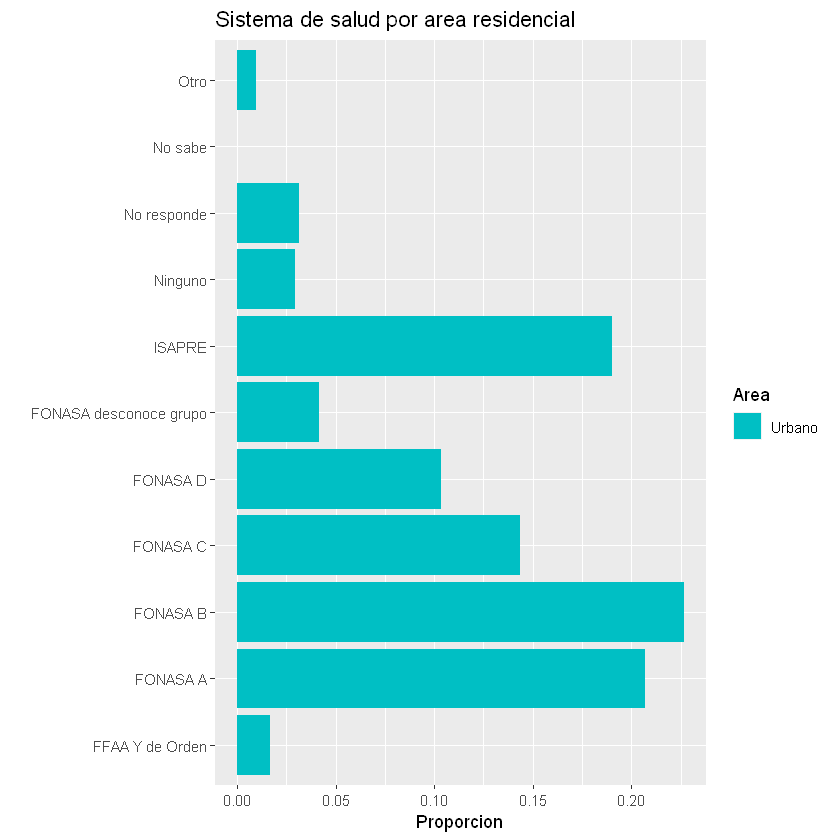

In [142]:
salud_zona %>% filter(Zona== area_salud[1])%>% mutate(Proporcion=(Freq/sum(Freq))*100) %>%
ggplot(aes(x = `Sistema de salud`, y = Freq/sum(Freq),fill=area_salud[1])) + 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title = "Sistema de salud por area residencial",x='',y='Proporcion') +
scale_fill_manual(,values=c('#00BFC4')) +guides(fill=guide_legend(title="Area"))

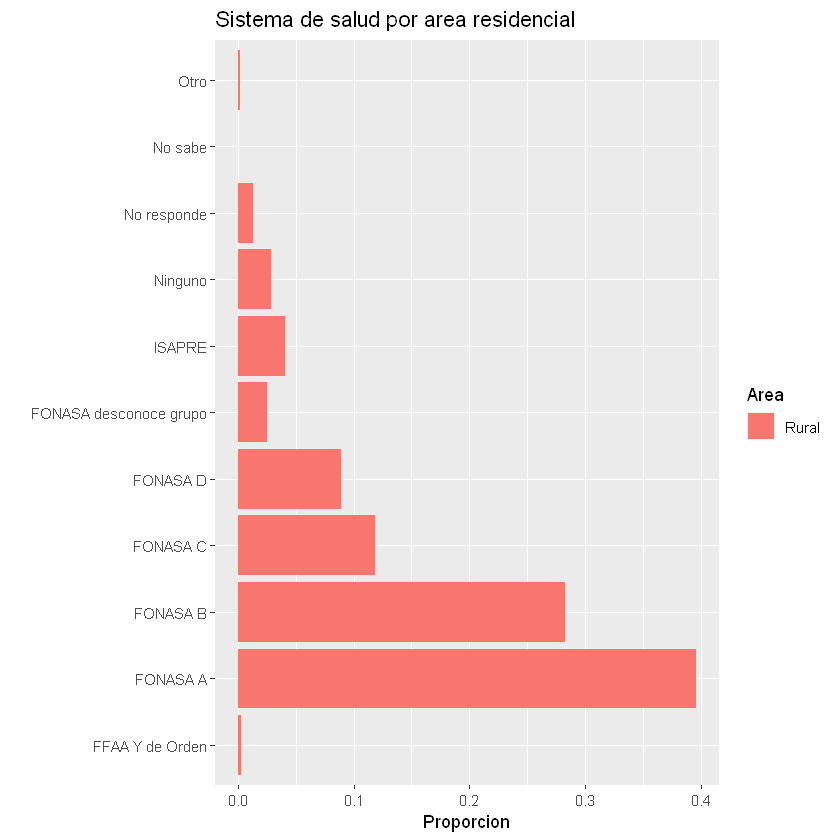

In [143]:
salud_zona %>% filter(Zona== area_salud[2])%>% mutate(Proporcion=(Freq/sum(Freq))*100) %>%
ggplot(aes(x = `Sistema de salud`, y = Freq/sum(Freq),fill=area_salud[2])) + 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title = "Sistema de salud por area residencial",x='',y='Proporcion') +
scale_fill_manual(,values=c('#F8766D')) +guides(fill=guide_legend(title="Area"))

In [144]:
Nivel_educacional_rep_salud=c(
 rep('Nunca asistió',11)
,rep('Jardín Infantil',11)
,rep('Kinder/Prekinder',11)
,rep('Educación Especial',11)
,rep('Primaria o Preparatoria (sistema antiguo)',11)
,rep('Educación Básica',11)
,rep('Humanidades (sistema antiguo)',11)
,rep('Educación Media C-H',11)
,rep('Técnica Comercial, Industrial o Normalista (sistema antiguo)',11)
,rep('Educación Media TP',11)
,rep('Técnico Nivel Superior (carreras 1 a 3 años)',11)
,rep('Profesional (carreras 4 o más años)',11)
,rep('Postgrado',11)
,rep('No sabe',11)
,rep('No responde',11))

In [145]:
salud_educacion=data.frame('Nivel Educacional'=Nivel_educacional_rep_salud,'Sistema de salud'=sistema_salud,svytable(~interaction(S1.enc,S2.enc), diseño))
colnames(salud_educacion)=c('Nivel Educacional','Sistema de salud','Proporcion','Freq')
salud_educacion_proporcion_total =salud_educacion %>% mutate(Proporcion=(Freq/sum(Freq))*100)
salud_educacion_proporcion_total

Nivel Educacional,Sistema de salud,Proporcion,Freq
<chr>,<fct>,<dbl>,<dbl>
Nunca asistió,FONASA A,0.859679613,123259.8480
Nunca asistió,FONASA B,0.448397149,64290.6538
Nunca asistió,FONASA C,0.118998199,17061.8213
Nunca asistió,FONASA D,0.021208964,3040.9163
Nunca asistió,FONASA desconoce grupo,0.061813583,8862.7586
Nunca asistió,FFAA Y de Orden,0.000000000,0.0000
Nunca asistió,ISAPRE,0.000000000,0.0000
Nunca asistió,Otro,0.000000000,0.0000
Nunca asistió,Ninguno,0.068989430,9891.6230


In [146]:
salud_educacion_tab_f <- function(n) {    
tabla=salud_educacion %>% filter(`Nivel Educacional`== Nivel_educacional[n,1]) %>% mutate(Proporcion=(Freq/sum(Freq))*100)
return(tabla)
}

salud_educacion_gra_f <- function(n) {    
grafico=salud_educacion %>% filter(`Nivel Educacional`== Nivel_educacional[n,1]) %>% mutate(Proporcion=(Freq/sum(Freq))*100) %>% 
ggplot(aes(x = `Sistema de salud`, y = Freq/sum(Freq),fill=`Nivel Educacional`)) +  
  theme(legend.position = "none")+ scale_fill_manual(values=c(color_region[n]))+ 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title =paste( "Sistema de Salud Segun Nivel Educacional,\n",Nivel_educacional[n,1]),y='Proporcion',x='')
return(grafico)
}

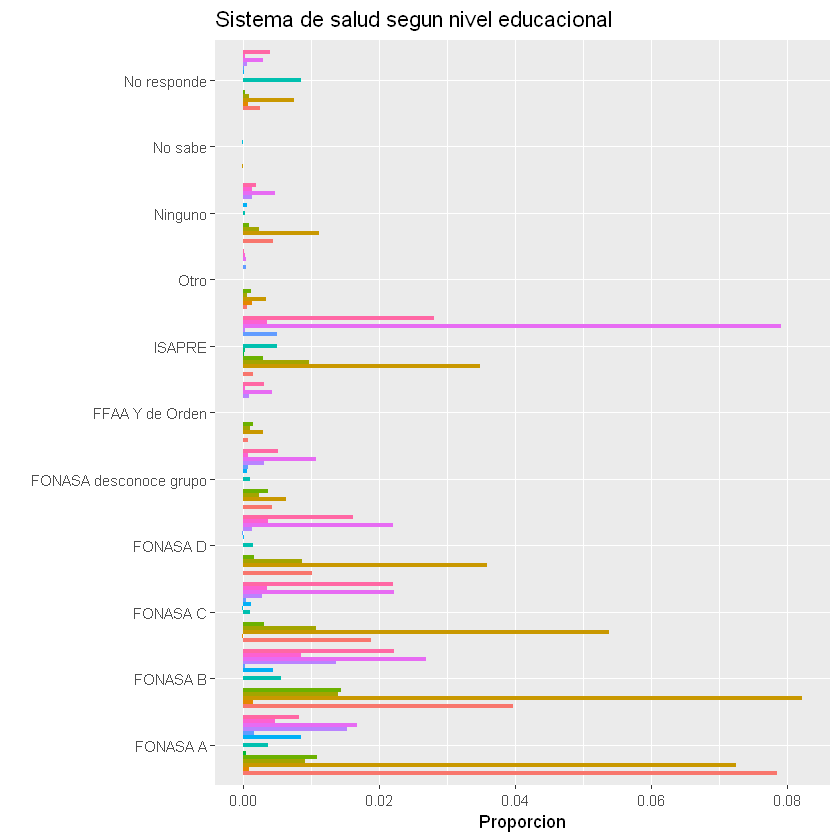

In [147]:
ggplot(salud_educacion, aes(x = `Sistema de salud`, y = Freq/sum(Freq), fill = `Nivel Educacional`)) + 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title = "Sistema de salud segun nivel educacional",x='',y='Proporcion')+  
  theme(legend.position = "none") + 
  scale_x_discrete(limits = sistema_salud)

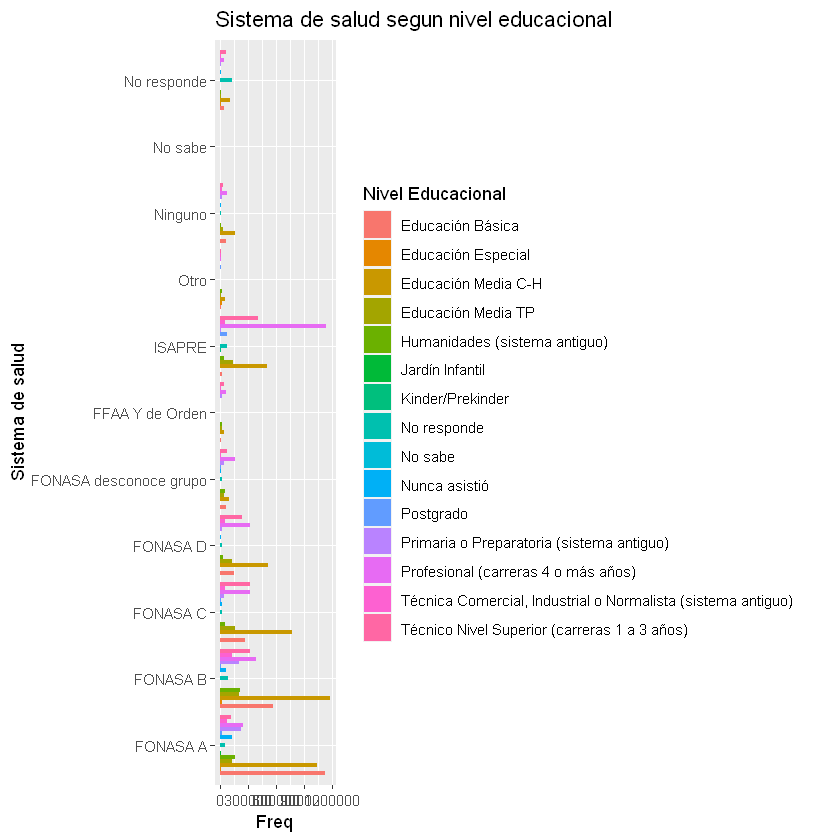

In [148]:
ggplot(salud_educacion, aes(x = `Sistema de salud`, y = Freq, fill = `Nivel Educacional`)) + 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title = "Sistema de salud segun nivel educacional") + 
  scale_x_discrete(limits = sistema_salud)

Nivel Educacional,Sistema de salud,Proporcion,Freq
<chr>,<fct>,<dbl>,<dbl>
Educación Básica,FONASA A,48.6489897,1126466.388
Educación Básica,FONASA B,24.6329546,570375.573
Educación Básica,FONASA C,11.6432129,269598.362
Educación Básica,FONASA D,6.2826944,145475.665
Educación Básica,FONASA desconoce grupo,2.6673264,61761.891
Educación Básica,FFAA Y de Orden,0.4679953,10836.422
Educación Básica,ISAPRE,0.9334433,21613.862
Educación Básica,Otro,0.4045177,9366.599
Educación Básica,Ninguno,2.7423686,63499.491


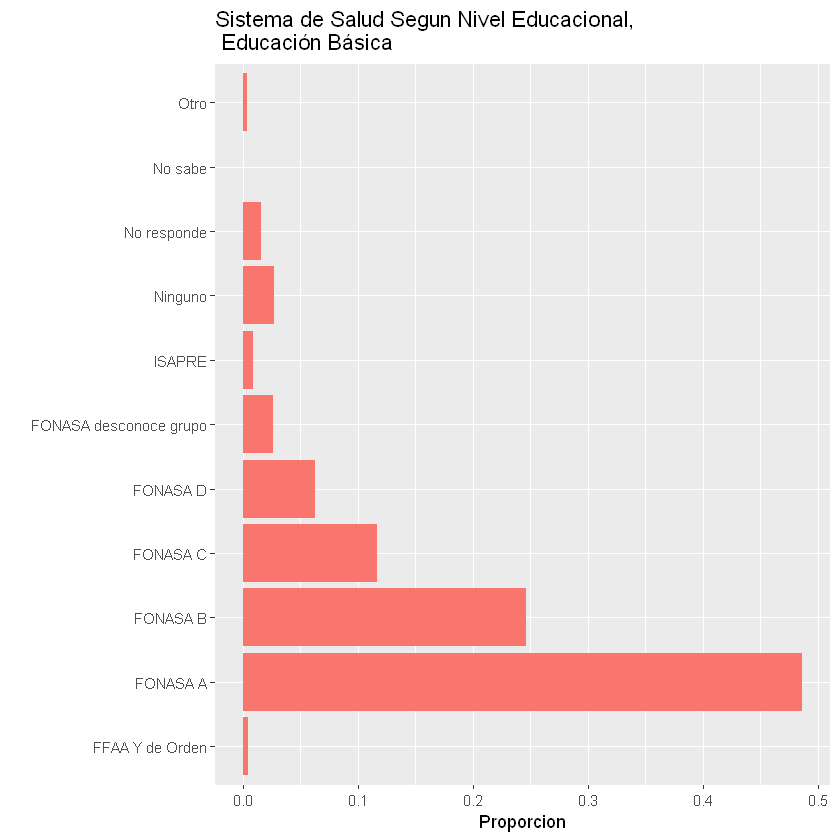

In [149]:
n=1
salud_educacion_tab_f(n)
salud_educacion_gra_f(n)

Nivel Educacional,Sistema de salud,Proporcion,Freq
<chr>,<fct>,<dbl>,<dbl>
Educación Especial,FONASA A,18.297966,12306.474
Educación Especial,FONASA B,33.214498,22338.731
Educación Especial,FONASA C,2.106967,1417.061
Educación Especial,FONASA D,0.000000,0.000
Educación Especial,FONASA desconoce grupo,0.000000,0.000
Educación Especial,FFAA Y de Orden,0.000000,0.000
Educación Especial,ISAPRE,0.000000,0.000
Educación Especial,Otro,28.820608,19383.578
Educación Especial,Ninguno,0.000000,0.000


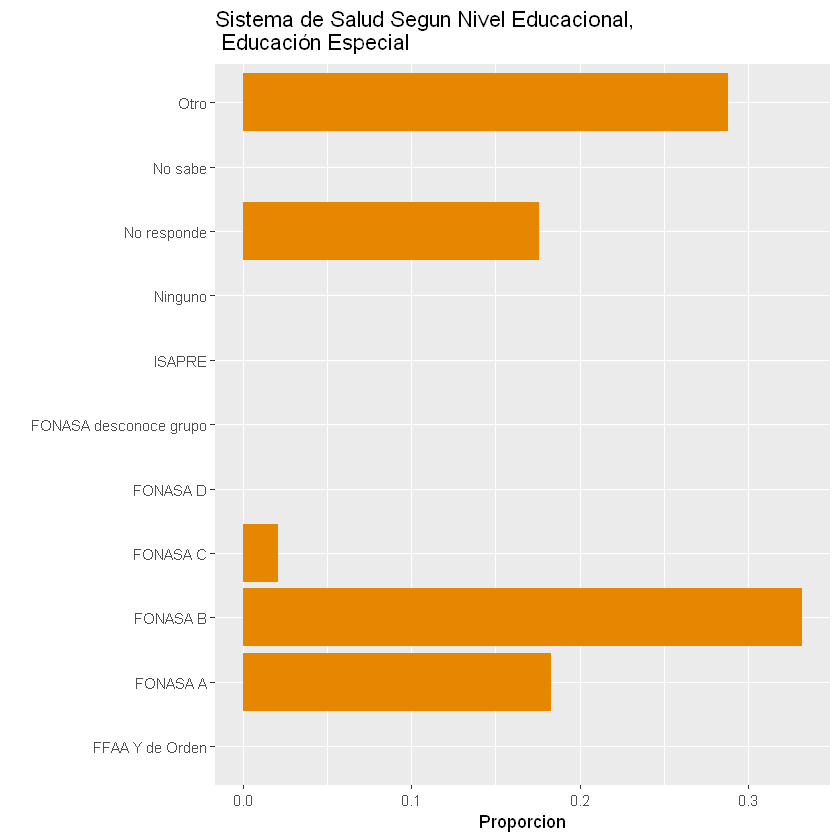

In [150]:
n=2
salud_educacion_tab_f(n)
salud_educacion_gra_f(n)

Nivel Educacional,Sistema de salud,Proporcion,Freq
<chr>,<fct>,<dbl>,<dbl>
Educación Media C-H,FONASA A,23.33242719,1041122.419
Educación Media C-H,FONASA B,26.44587601,1180048.444
Educación Media C-H,FONASA C,17.29225426,771602.261
Educación Media C-H,FONASA D,11.51946834,514013.251
Educación Media C-H,FONASA desconoce grupo,2.04832084,91398.667
Educación Media C-H,FFAA Y de Orden,0.97420794,43470.391
Educación Media C-H,ISAPRE,11.20994918,500202.114
Educación Media C-H,Otro,1.08250391,48302.694
Educación Media C-H,Ninguno,3.62107543,161576.967


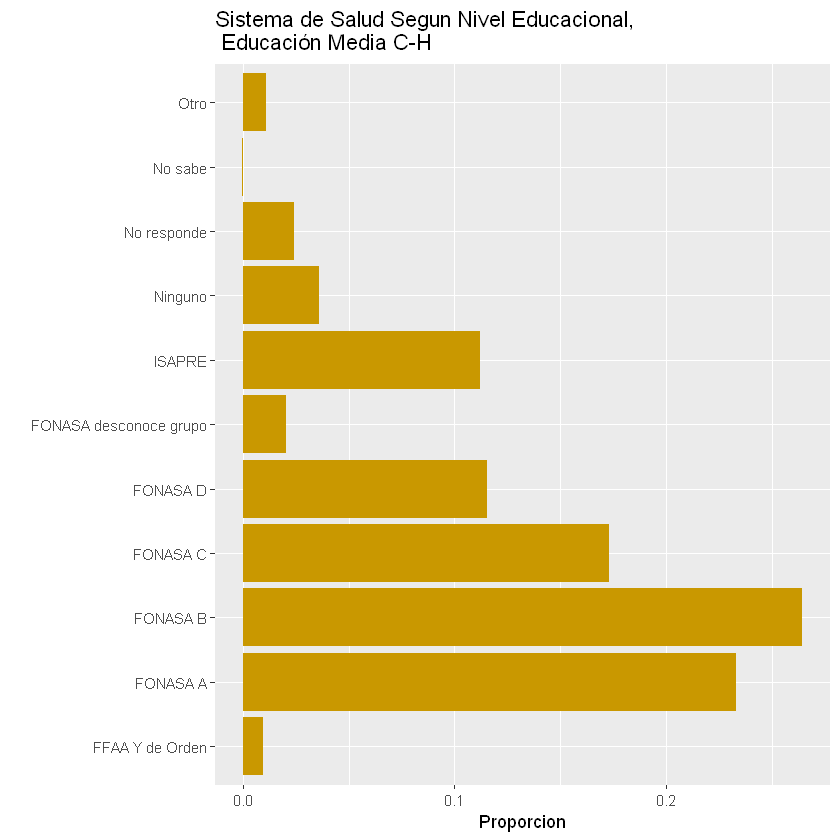

In [151]:
n=3
salud_educacion_tab_f(n)
salud_educacion_gra_f(n)

Nivel Educacional,Sistema de salud,Proporcion,Freq
<chr>,<fct>,<dbl>,<dbl>
Educación Media TP,FONASA A,15.352013,130736.535
Educación Media TP,FONASA B,23.532271,200398.973
Educación Media TP,FONASA C,18.021745,153471.762
Educación Media TP,FONASA D,14.553400,123935.608
Educación Media TP,FONASA desconoce grupo,4.138159,35240.238
Educación Media TP,FFAA Y de Orden,1.683845,14339.492
Educación Media TP,ISAPRE,16.308215,138879.482
Educación Media TP,Otro,1.007105,8576.427
Educación Media TP,Ninguno,3.941941,33569.260


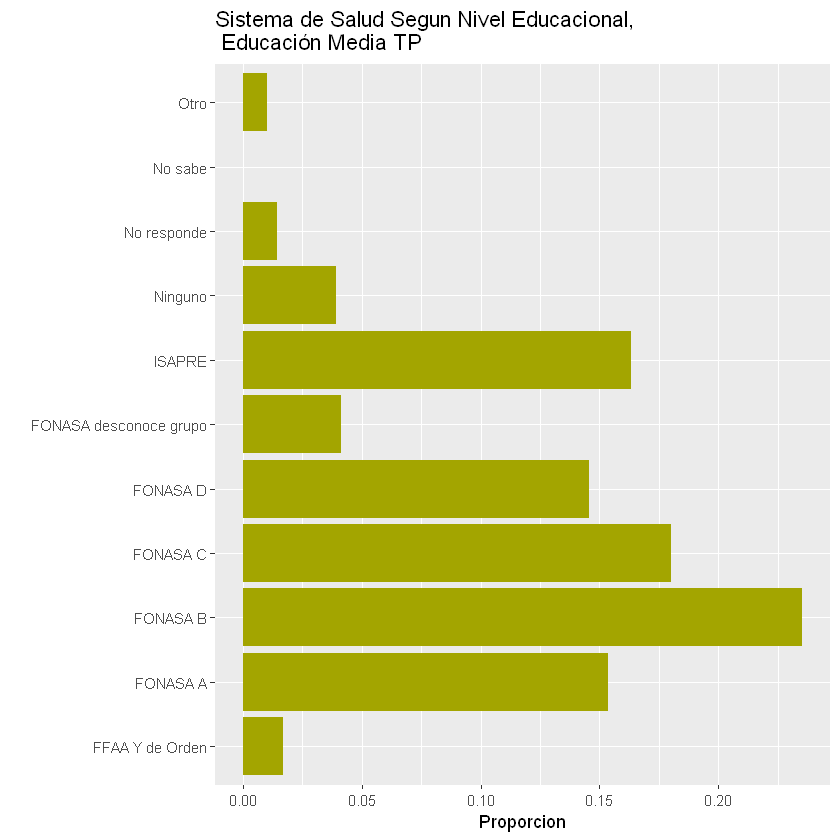

In [152]:
n=4
salud_educacion_tab_f(n)
salud_educacion_gra_f(n)

Nivel Educacional,Sistema de salud,Proporcion,Freq
<chr>,<fct>,<dbl>,<dbl>
Humanidades (sistema antiguo),FONASA A,26.6348756,156656.933
Humanidades (sistema antiguo),FONASA B,35.2246250,207178.806
Humanidades (sistema antiguo),FONASA C,7.7760449,45735.950
Humanidades (sistema antiguo),FONASA D,4.1266990,24271.787
Humanidades (sistema antiguo),FONASA desconoce grupo,9.0316478,53120.963
Humanidades (sistema antiguo),FFAA Y de Orden,3.8110883,22415.476
Humanidades (sistema antiguo),ISAPRE,7.3689522,43341.575
Humanidades (sistema antiguo),Otro,2.9736432,17489.919
Humanidades (sistema antiguo),Ninguno,2.2309395,13121.598


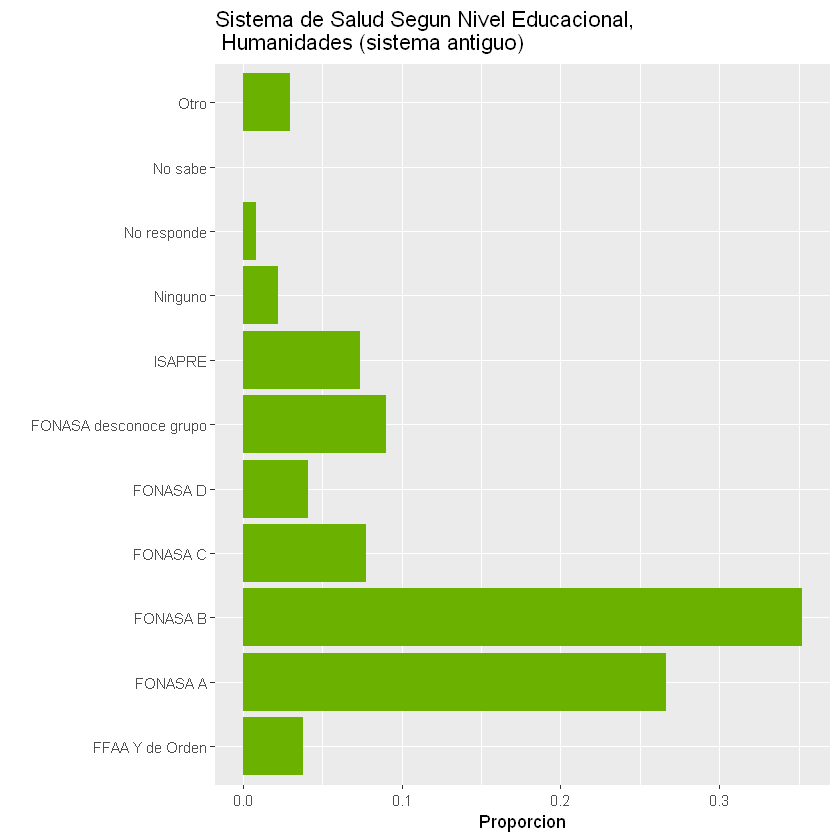

In [153]:
n=5
salud_educacion_tab_f(n)
salud_educacion_gra_f(n)

Nivel Educacional,Sistema de salud,Proporcion,Freq
<chr>,<fct>,<dbl>,<dbl>
Jardín Infantil,FONASA A,71.627492,7818.6414
Jardín Infantil,FONASA B,2.047660,223.5164
Jardín Infantil,FONASA C,0.000000,0.0000
Jardín Infantil,FONASA D,7.142687,779.6742
Jardín Infantil,FONASA desconoce grupo,0.000000,0.0000
Jardín Infantil,FFAA Y de Orden,0.000000,0.0000
Jardín Infantil,ISAPRE,19.182161,2093.8669
Jardín Infantil,Otro,0.000000,0.0000
Jardín Infantil,Ninguno,0.000000,0.0000


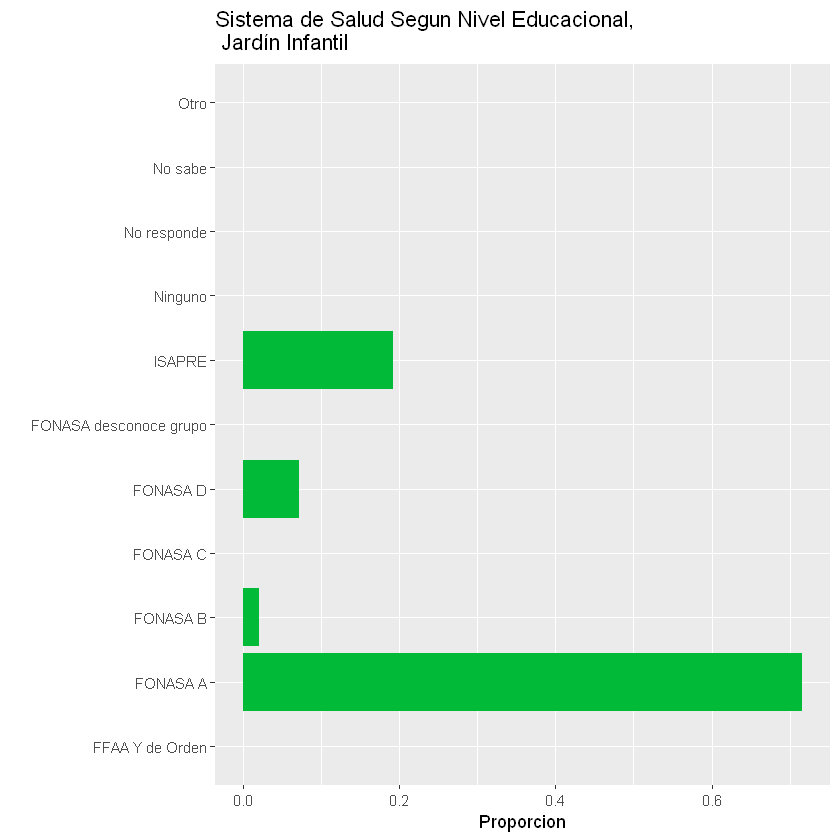

In [154]:
n=6
salud_educacion_tab_f(n)
salud_educacion_gra_f(n)

Nivel Educacional,Sistema de salud,Proporcion,Freq
<chr>,<fct>,<dbl>,<dbl>
Kinder/Prekinder,FONASA A,0.000000,0.0000
Kinder/Prekinder,FONASA B,0.000000,0.0000
Kinder/Prekinder,FONASA C,4.372155,217.6482
Kinder/Prekinder,FONASA D,14.482487,720.9461
Kinder/Prekinder,FONASA desconoce grupo,0.000000,0.0000
Kinder/Prekinder,FFAA Y de Orden,0.000000,0.0000
Kinder/Prekinder,ISAPRE,81.145358,4039.4602
Kinder/Prekinder,Otro,0.000000,0.0000
Kinder/Prekinder,Ninguno,0.000000,0.0000


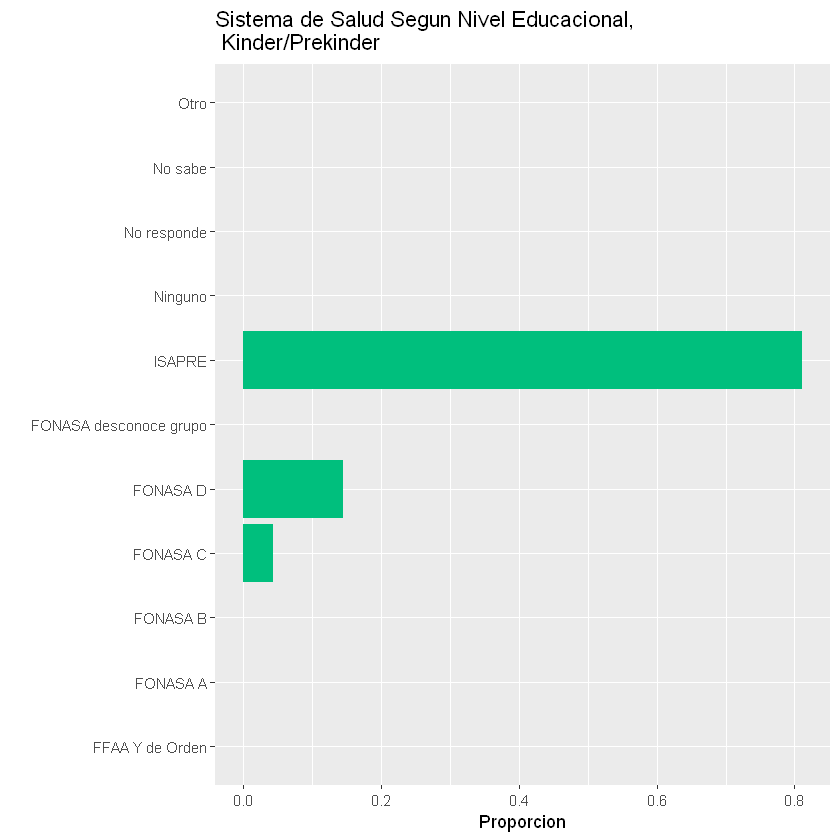

In [155]:
n=7
salud_educacion_tab_f(n)
salud_educacion_gra_f(n)

Nivel Educacional,Sistema de salud,Proporcion,Freq
<chr>,<fct>,<dbl>,<dbl>
No responde,FONASA A,13.7741601,53272.1544
No responde,FONASA B,20.6311010,79791.6671
No responde,FONASA C,4.0851628,15799.5421
No responde,FONASA D,5.4816497,21200.5153
No responde,FONASA desconoce grupo,3.9655060,15336.7643
No responde,FFAA Y de Orden,0.0000000,0.0000
No responde,ISAPRE,18.8079528,72740.5635
No responde,Otro,0.1215832,470.2284
No responde,Ninguno,1.2588682,4868.7267


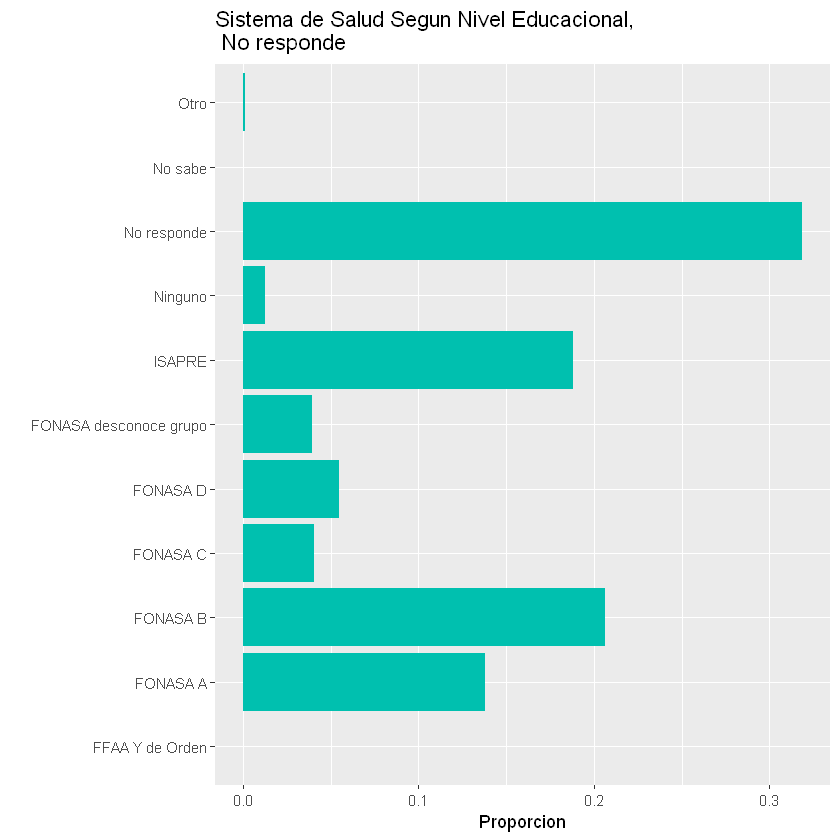

In [156]:
n=8
salud_educacion_tab_f(n)
salud_educacion_gra_f(n)

Nivel Educacional,Sistema de salud,Proporcion,Freq
<chr>,<fct>,<dbl>,<dbl>
No sabe,FONASA A,0.00000,0.000
No sabe,FONASA B,0.00000,0.000
No sabe,FONASA C,55.97834,1422.418
No sabe,FONASA D,0.00000,0.000
No sabe,FONASA desconoce grupo,0.00000,0.000
No sabe,FFAA Y de Orden,0.00000,0.000
No sabe,ISAPRE,0.00000,0.000
No sabe,Otro,0.00000,0.000
No sabe,Ninguno,0.00000,0.000


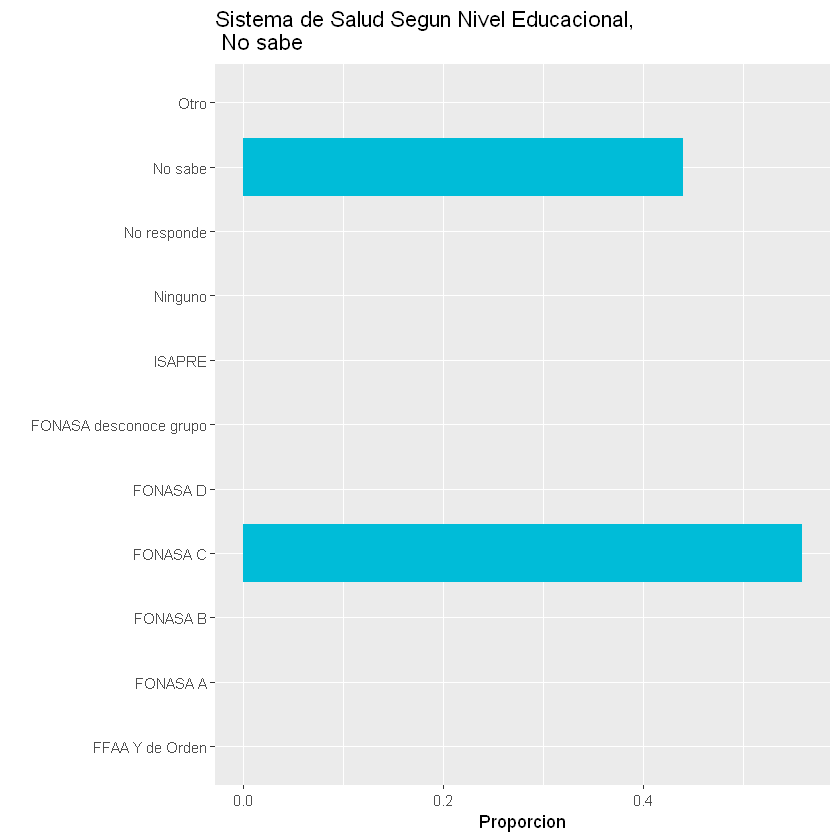

In [157]:
n=9
salud_educacion_tab_f(n)
salud_educacion_gra_f(n)

Nivel Educacional,Sistema de salud,Proporcion,Freq
<chr>,<fct>,<dbl>,<dbl>
Nunca asistió,FONASA A,53.652134,123259.848
Nunca asistió,FONASA B,27.984221,64290.654
Nunca asistió,FONASA C,7.426613,17061.821
Nunca asistió,FONASA D,1.323640,3040.916
Nunca asistió,FONASA desconoce grupo,3.857752,8862.759
Nunca asistió,FFAA Y de Orden,0.000000,0.000
Nunca asistió,ISAPRE,0.000000,0.000
Nunca asistió,Otro,0.000000,0.000
Nunca asistió,Ninguno,4.305593,9891.623


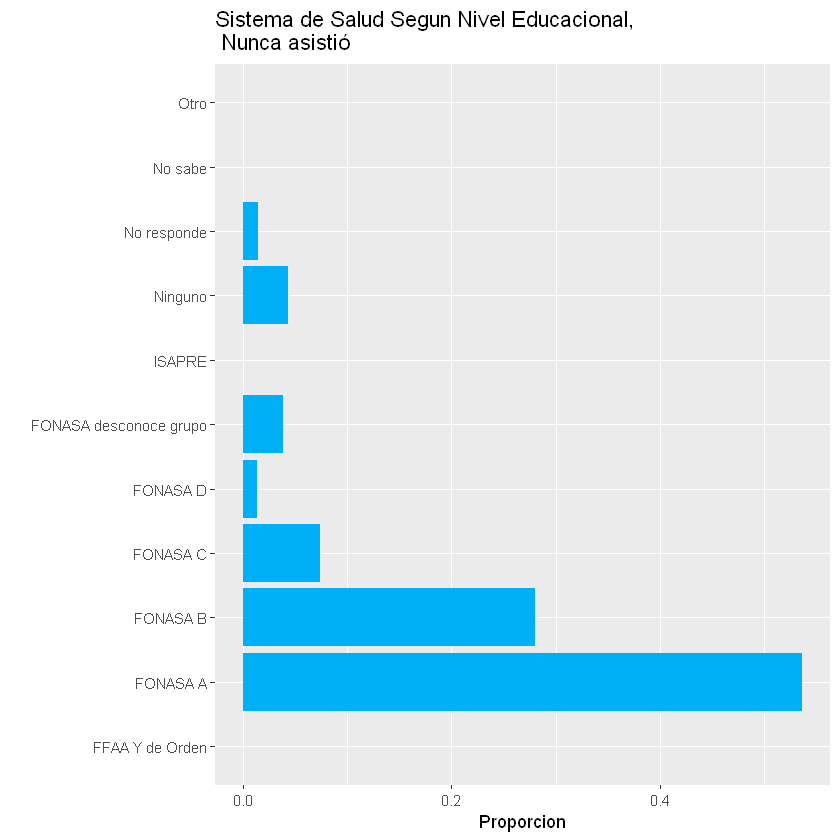

In [158]:
n=10
salud_educacion_tab_f(n)
salud_educacion_gra_f(n)

Nivel Educacional,Sistema de salud,Proporcion,Freq
<chr>,<fct>,<dbl>,<dbl>
Postgrado,FONASA A,17.9727361,23255.301
Postgrado,FONASA B,3.0037155,3886.571
Postgrado,FONASA C,5.9626630,7715.215
Postgrado,FONASA D,0.8504329,1100.393
Postgrado,FONASA desconoce grupo,9.2107832,11918.026
Postgrado,FFAA Y de Orden,0.0000000,0.000
Postgrado,ISAPRE,56.0287332,72496.755
Postgrado,Otro,5.2589018,6804.604
Postgrado,Ninguno,0.0000000,0.000


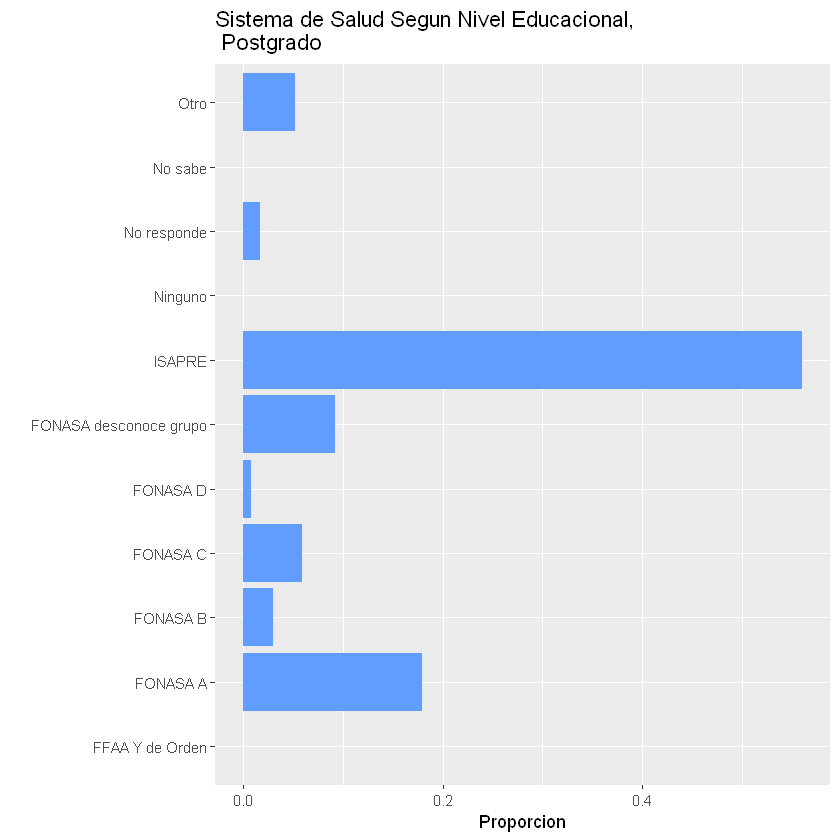

In [159]:
n=11
salud_educacion_tab_f(n)
salud_educacion_gra_f(n)

Nivel Educacional,Sistema de salud,Proporcion,Freq
<chr>,<fct>,<dbl>,<dbl>
Primaria o Preparatoria (sistema antiguo),FONASA A,38.6886999,219586.7991
Primaria o Preparatoria (sistema antiguo),FONASA B,34.4981874,195802.5616
Primaria o Preparatoria (sistema antiguo),FONASA C,7.2652195,41235.4591
Primaria o Preparatoria (sistema antiguo),FONASA D,3.2848003,18643.6552
Primaria o Preparatoria (sistema antiguo),FONASA desconoce grupo,7.7473348,43971.8173
Primaria o Preparatoria (sistema antiguo),FFAA Y de Orden,2.4926557,14147.6526
Primaria o Preparatoria (sistema antiguo),ISAPRE,0.9195183,5218.9421
Primaria o Preparatoria (sistema antiguo),Otro,0.0904392,513.3089
Primaria o Preparatoria (sistema antiguo),Ninguno,3.2827736,18632.1522


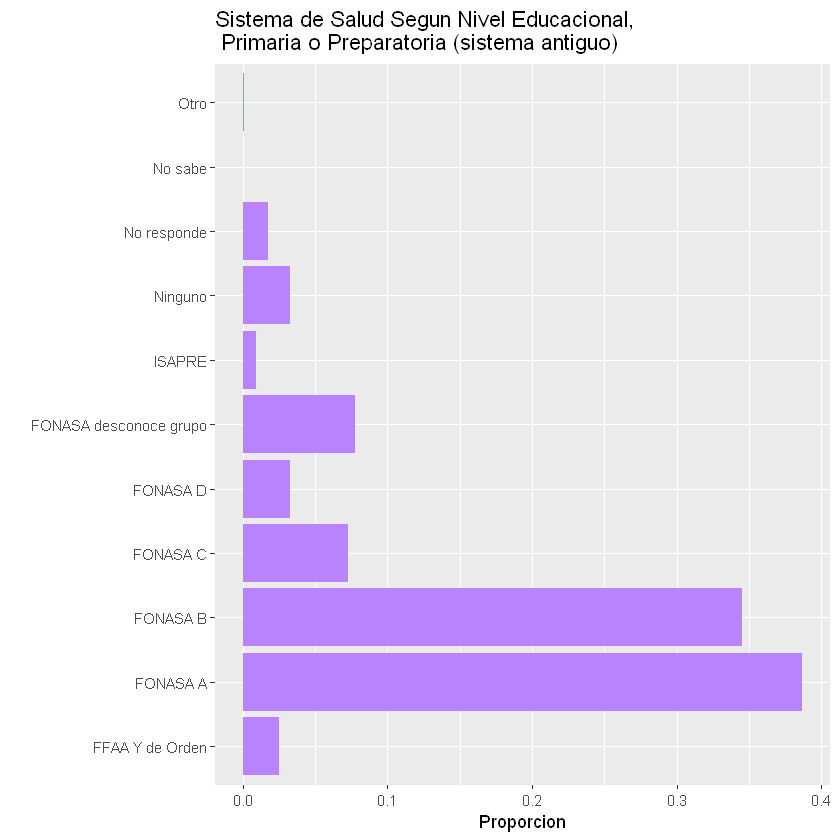

In [160]:
n=12
salud_educacion_tab_f(n)
salud_educacion_gra_f(n)

Nivel Educacional,Sistema de salud,Proporcion,Freq
<chr>,<fct>,<dbl>,<dbl>
Profesional (carreras 4 o más años),FONASA A,8.7901633,239916.143
Profesional (carreras 4 o más años),FONASA B,14.1483379,386160.592
Profesional (carreras 4 o más años),FONASA C,11.6508999,317996.252
Profesional (carreras 4 o más años),FONASA D,11.6230249,317235.440
Profesional (carreras 4 o más años),FONASA desconoce grupo,5.6879837,155246.163
Profesional (carreras 4 o más años),FFAA Y de Orden,2.2418135,61187.402
Profesional (carreras 4 o más años),ISAPRE,41.5517423,1134101.090
Profesional (carreras 4 o más años),Otro,0.2221193,6062.459
Profesional (carreras 4 o más años),Ninguno,2.5215686,68822.955


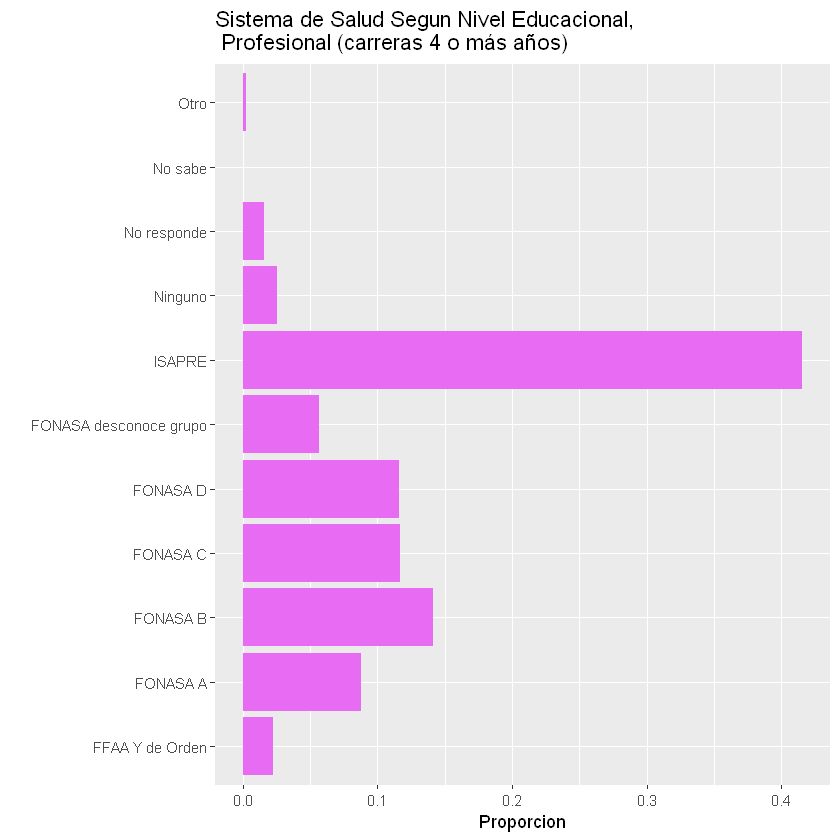

In [161]:
n=13
salud_educacion_tab_f(n)
salud_educacion_gra_f(n)

Nivel Educacional,Sistema de salud,Proporcion,Freq
<chr>,<fct>,<dbl>,<dbl>
"Técnica Comercial, Industrial o Normalista (sistema antiguo)",FONASA A,17.198237,67840.894
"Técnica Comercial, Industrial o Normalista (sistema antiguo)",FONASA B,31.040531,122443.797
"Técnica Comercial, Industrial o Normalista (sistema antiguo)",FONASA C,13.237647,52217.783
"Técnica Comercial, Industrial o Normalista (sistema antiguo)",FONASA D,13.484701,53192.323
"Técnica Comercial, Industrial o Normalista (sistema antiguo)",FONASA desconoce grupo,3.007787,11864.646
"Técnica Comercial, Industrial o Normalista (sistema antiguo)",FFAA Y de Orden,1.264710,4988.828
"Técnica Comercial, Industrial o Normalista (sistema antiguo)",ISAPRE,13.086010,51619.629
"Técnica Comercial, Industrial o Normalista (sistema antiguo)",Otro,1.416801,5588.775
"Técnica Comercial, Industrial o Normalista (sistema antiguo)",Ninguno,5.093963,20093.861


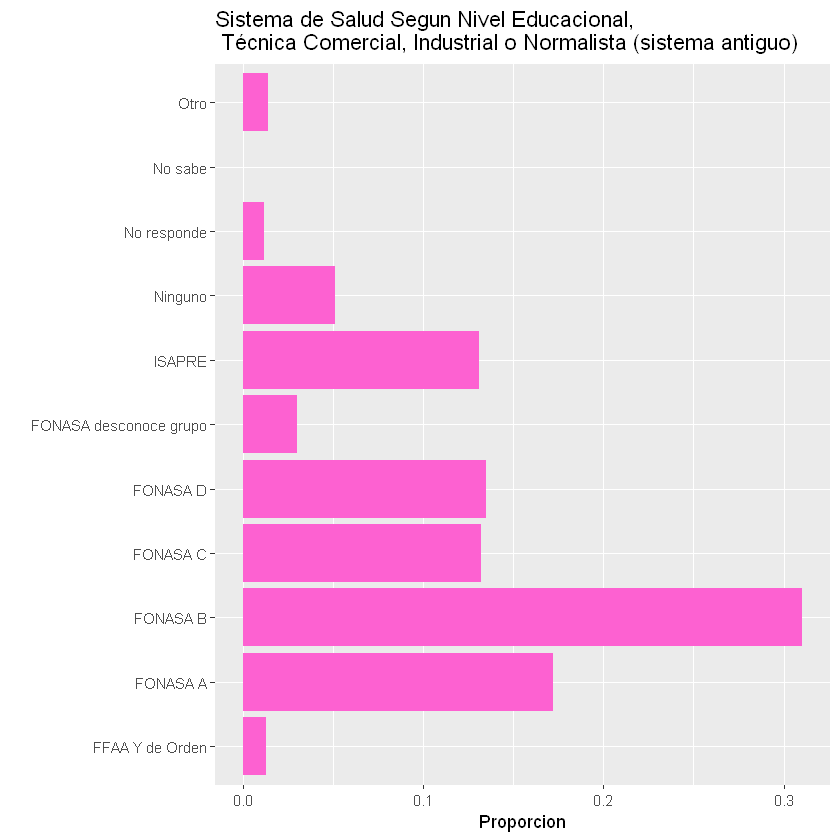

In [162]:
n=14
salud_educacion_tab_f(n)
salud_educacion_gra_f(n)

Nivel Educacional,Sistema de salud,Proporcion,Freq
<chr>,<fct>,<dbl>,<dbl>
Técnico Nivel Superior (carreras 1 a 3 años),FONASA A,7.4379443,118822.357
Técnico Nivel Superior (carreras 1 a 3 años),FONASA B,20.0219066,319853.178
Técnico Nivel Superior (carreras 1 a 3 años),FONASA C,19.7821100,316022.389
Técnico Nivel Superior (carreras 1 a 3 años),FONASA D,14.5634753,232653.860
Técnico Nivel Superior (carreras 1 a 3 años),FONASA desconoce grupo,4.6420337,74157.235
Técnico Nivel Superior (carreras 1 a 3 años),FFAA Y de Orden,2.7537470,43991.552
Técnico Nivel Superior (carreras 1 a 3 años),ISAPRE,25.1816635,402281.125
Técnico Nivel Superior (carreras 1 a 3 años),Otro,0.2297539,3670.356
Técnico Nivel Superior (carreras 1 a 3 años),Ninguno,1.7339268,27699.760


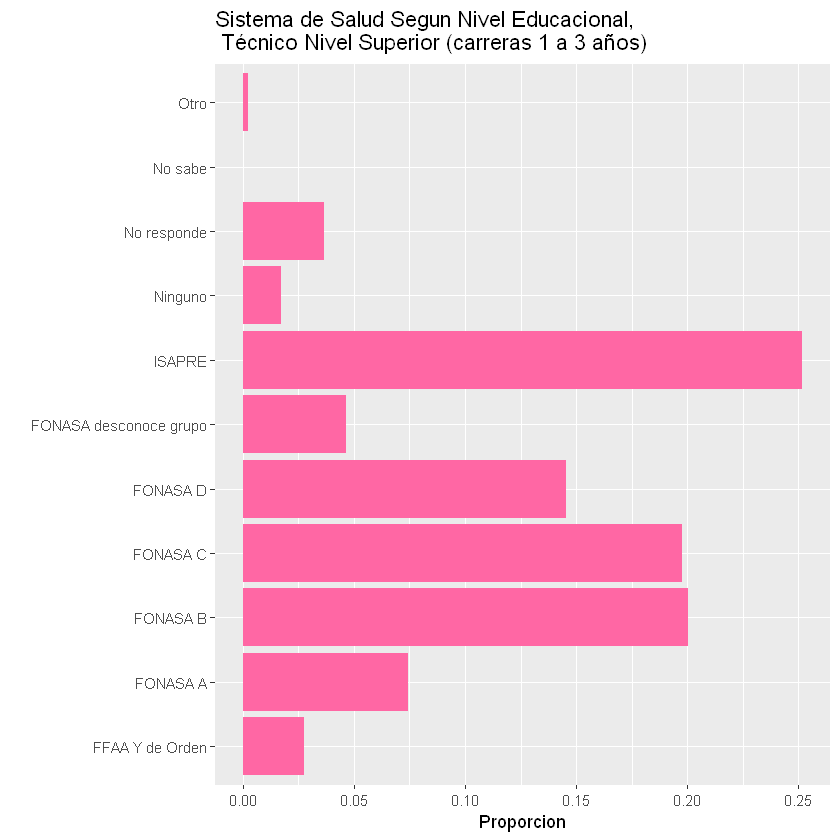

In [163]:
n=15
salud_educacion_tab_f(n)
salud_educacion_gra_f(n)

In [164]:
regiones=c('Tarapacá'
,'Antofagasta'
,'Atacama'
,'Coquimbo'
,'Valparaíso'
,'O’Higgins'
,'Maule'
,'Biobío'
,'La Araucanía'
,'Los Lagos'
,'Aysén'
,'Magallanes y Antártica'
,'Región Metropolitana'
,'Los Ríos'
,'Arica y Parinacota')

6. A continuacion procederemos a saleccionar a todas las personas que durante el ultimo mes ha fumado cigarrillo, con esto buscaremos a ver la cantidad de personas que fuman por cada region. luego de obtener solo que si han fumado procederemos a seleccionar al total encuestado para ver un promedio por region que fuma 

In [165]:
t=data.frame(svytotal(~interaction(Region, P6_14==1), diseño))
fumadores_region=t[16:30,1]
Proporcion_Regional=t[16:30,1]/(t[16:30,1]+t[1:15,1])
Total_Regional=t[16:30,1]+t[1:15,1]
Proporcion_t_regional=(Total_Regional/sum(Total_Regional))*100

fumadores=data.frame('Region'=regiones,fumadores_region,Total_Regional,'Proporcion de la region fumadora'=Proporcion_Regional,Proporcion_t_regional)
colnames(fumadores)=c('Region','Fumadores region','Total Regional','Proporcion de Fumadores','Proporcion de la region')

fumadores

Region,Fumadores region,Total Regional,Proporcion de Fumadores,Proporcion de la region
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Tarapacá,100422.01,255168,0.3935525,1.7794248
Antofagasta,97117.76,482565,0.2012532,3.3651873
Atacama,44631.46,241262,0.1849917,1.6824507
Coquimbo,189887.29,608615,0.3119990,4.2442023
Valparaíso,464958.71,1471962,0.3158768,10.2647889
O’Higgins,171285.54,730108,0.2346030,5.0914388
Maule,150568.22,833828,0.1805747,5.8147346
Biobío,511275.86,1695343,0.3015766,11.8225457
La Araucanía,187986.08,786773,0.2389331,5.4865946


In [166]:
fumadores[order(fumadores$`Proporcion de Fumadores`,decreasing = TRUE),]

,Region,Fumadores region,Total Regional,Proporcion de Fumadores,Proporcion de la region
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Tarapacá,100422.01,255168,0.3935525,1.7794248
13,Región Metropolitana,2084237.80,5848375,0.3563790,40.7838889
5,Valparaíso,464958.71,1471962,0.3158768,10.2647889
4,Coquimbo,189887.29,608615,0.3119990,4.2442023
8,Biobío,511275.86,1695343,0.3015766,11.8225457
11,Aysén,23810.29,83710,0.2844378,0.5837552
12,Magallanes y Antártica,35905.33,131648,0.2727374,0.9180529
15,Arica y Parinacota,47879.29,186055,0.2573394,1.2974624
9,La Araucanía,187986.08,786773,0.2389331,5.4865946


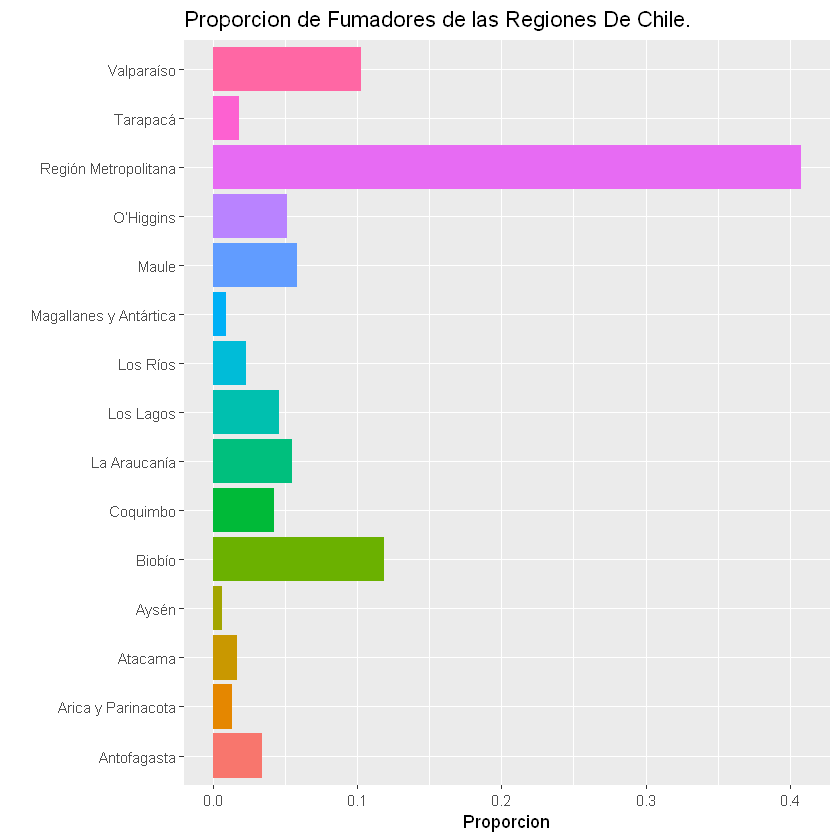

In [167]:
ggplot(fumadores,aes(x = Region, y = `Proporcion de la region`/sum(`Proporcion de la region`),fill=Region)) +  
  theme(legend.position = "none")+ scale_fill_manual(values=c(color_region))+ 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title =paste( "Proporcion de Fumadores de las Regiones De Chile."),y='Proporcion',x='')

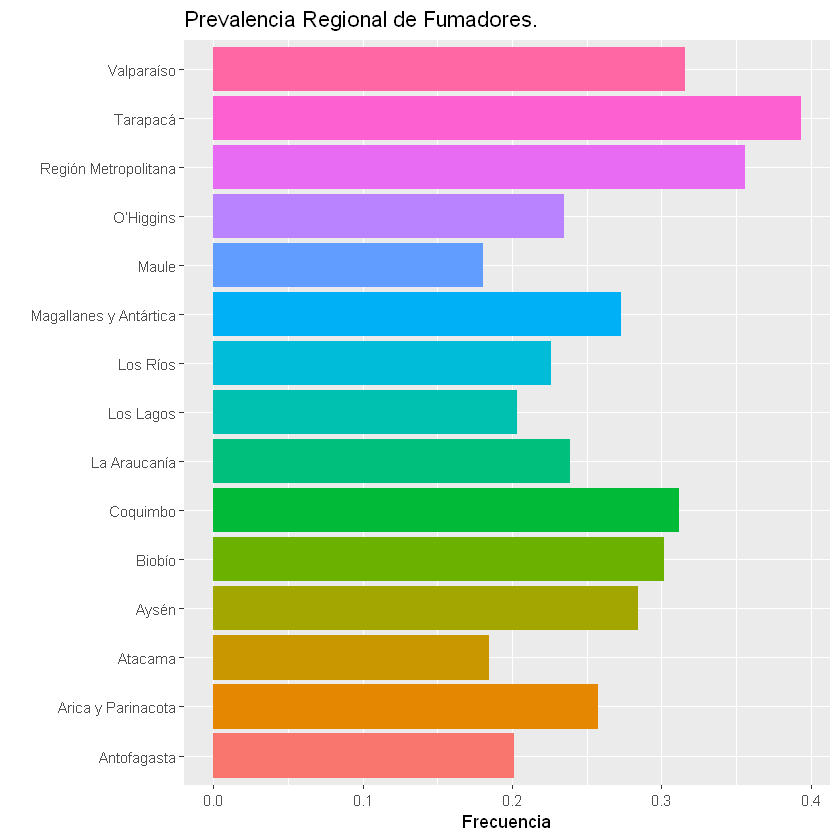

In [168]:
ggplot(fumadores,aes(x = Region, y = `Proporcion de Fumadores`,fill=Region)) +  
  theme(legend.position = "none")+ scale_fill_manual(values=c(color_region))+ 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title =paste( "Prevalencia Regional de Fumadores."),y='Frecuencia',x='')

Proporcion de fumadores segun educacion.

In [169]:
prop_fumador_educacion=data.frame(svymean(~interaction(P6_14[P6_14==1],S2.enc), diseño))
row.names(prop_fumador_educacion)=c()
prop_fumador_educacion

Warning message in ans * length(l) + if1:
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"


mean,SE
<dbl>,<dbl>
0.0160209419,0.0028901405
0.0007612109,0.0003143753
0.0003471467,0.0002868280
0.0046901229,0.0016159512
0.0395799749,0.0029011370
0.1616140031,0.0066093156
0.0410159117,0.0029223000
0.3111682676,0.0099626079
0.0275081299,0.0028126715


In [170]:
Nivel_educacional_n=c('Nunca asistió'
,'Jardín Infantil'
,'Kinder/Prekinder'
,'Educación Especial'
,'Primaria o Preparatoria (sistema antiguo)'
,'Educación Básica'
,'Humanidades (sistema antiguo)'
,'Educación Media C-H'
,'Técnica Comercial, Industrial o Normalista (sistema antiguo)'
,'Educación Media TP'
,'Técnico Nivel Superior (carreras 1 a 3 años)'
,'Profesional (carreras 4 o más años)'
,'Postgrado'
,'No sabe'
,'No responde')

In [171]:
f_e=data.frame(svytotal(~interaction(S2.enc, P6_14==1), diseño))
fumador=f_e[16:30,1]
proporcion=f_e[16:30,1]/(f_e[16:30,1]+f_e[1:15,1])
total=f_e[16:30,1]+f_e[1:15,1]
proporcion_fumadores=(total/sum(total))*100

fumadores_educacion=data.frame(Nivel_educacional_n,fumador,total,proporcion,proporcion_fumadores)
colnames(fumadores_educacion)=c('Nivel Educacional','Fumadores','Total Personas',
                                'Proporcion de Fumadores Segun Nivel Educacional','Proporcion de Nivel Educacional')

fumadores_educacion

Nivel Educacional,Fumadores,Total Personas,Proporcion de Fumadores Segun Nivel Educacional,Proporcion de Nivel Educacional
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Nunca asistió,29188.580,229738.946,0.12705108,1.60209419
Jardín Infantil,3404.513,10915.699,0.31189147,0.07612109
Kinder/Prekinder,4039.460,4978.055,0.81145358,0.03471467
Educación Especial,15657.666,67255.964,0.23280710,0.46901229
Primaria o Preparatoria (sistema antiguo),50461.476,567573.477,0.08890739,3.95799749
Educación Básica,559131.495,2317531.069,0.24126170,16.16140031
Humanidades (sistema antiguo),105147.925,588164.687,0.17877293,4.10159117
Educación Media C-H,1445584.686,4462126.509,0.32396766,31.11682676
"Técnica Comercial, Industrial o Normalista (sistema antiguo)",108116.796,394464.244,0.27408516,2.75081299


In [172]:
fumadores_educacion[order(fumadores_educacion$`Proporcion de Nivel Educacional`,decreasing = TRUE),]

,Nivel Educacional,Fumadores,Total Personas,Proporcion de Fumadores Segun Nivel Educacional,Proporcion de Nivel Educacional
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
8,Educación Media C-H,1445584.686,4462126.509,0.32396766,31.11682676
12,Profesional (carreras 4 o más años),852377.278,2729370.723,0.31229810,19.03338145
6,Educación Básica,559131.495,2317531.069,0.24126170,16.16140031
11,Técnico Nivel Superior (carreras 1 a 3 años),644083.706,1597516.083,0.40317823,11.14034555
10,Educación Media TP,286884.269,851592.149,0.33687989,5.93861364
7,Humanidades (sistema antiguo),105147.925,588164.687,0.17877293,4.10159117
5,Primaria o Preparatoria (sistema antiguo),50461.476,567573.477,0.08890739,3.95799749
9,"Técnica Comercial, Industrial o Normalista (sistema antiguo)",108116.796,394464.244,0.27408516,2.75081299
15,No responde,186255.381,386754.285,0.48158582,2.69704726


In [173]:
fumadores_educacion[order(fumadores_educacion$`Proporcion de Fumadores Segun Nivel Educacional`,decreasing = TRUE),]

,Nivel Educacional,Fumadores,Total Personas,Proporcion de Fumadores Segun Nivel Educacional,Proporcion de Nivel Educacional
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
3,Kinder/Prekinder,4039.460,4978.055,0.81145358,0.03471467
14,No sabe,1422.418,2541.015,0.55978345,0.01771988
15,No responde,186255.381,386754.285,0.48158582,2.69704726
11,Técnico Nivel Superior (carreras 1 a 3 años),644083.706,1597516.083,0.40317823,11.14034555
10,Educación Media TP,286884.269,851592.149,0.33687989,5.93861364
8,Educación Media C-H,1445584.686,4462126.509,0.32396766,31.11682676
12,Profesional (carreras 4 o más años),852377.278,2729370.723,0.31229810,19.03338145
2,Jardín Infantil,3404.513,10915.699,0.31189147,0.07612109
9,"Técnica Comercial, Industrial o Normalista (sistema antiguo)",108116.796,394464.244,0.27408516,2.75081299


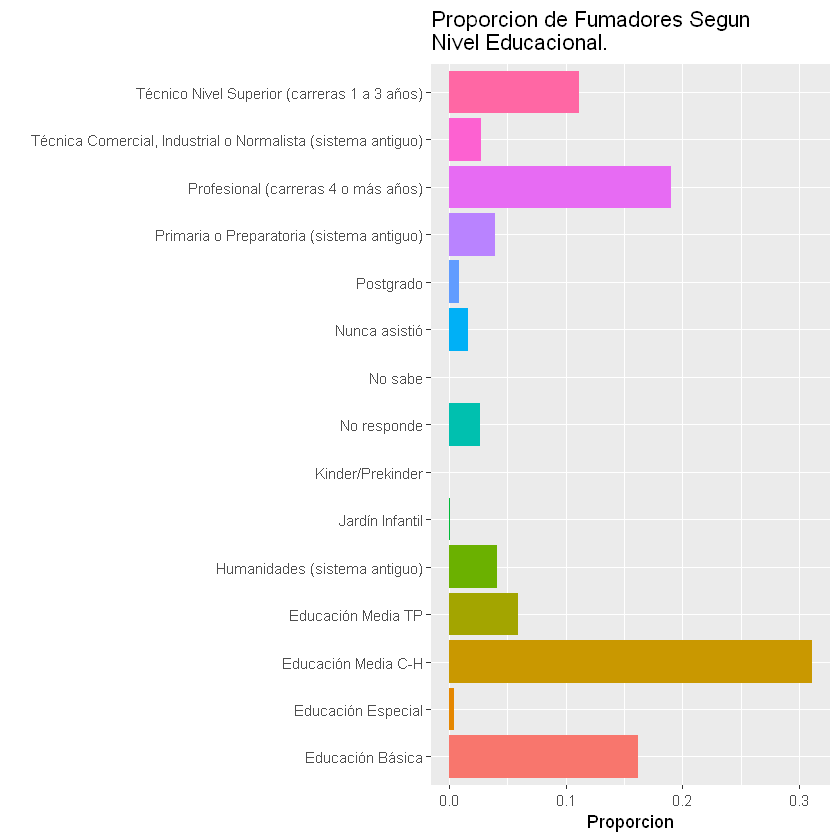

In [174]:
ggplot(fumadores_educacion,aes(x = `Nivel Educacional`, y = `Proporcion de Nivel Educacional`/sum(`Proporcion de Nivel Educacional`),fill=`Nivel Educacional`)) +  
  theme(legend.position = "none")+ scale_fill_manual(values=c(color_region))+ 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title =paste( "Proporcion de Fumadores Segun \nNivel Educacional."),y='Proporcion',x='')

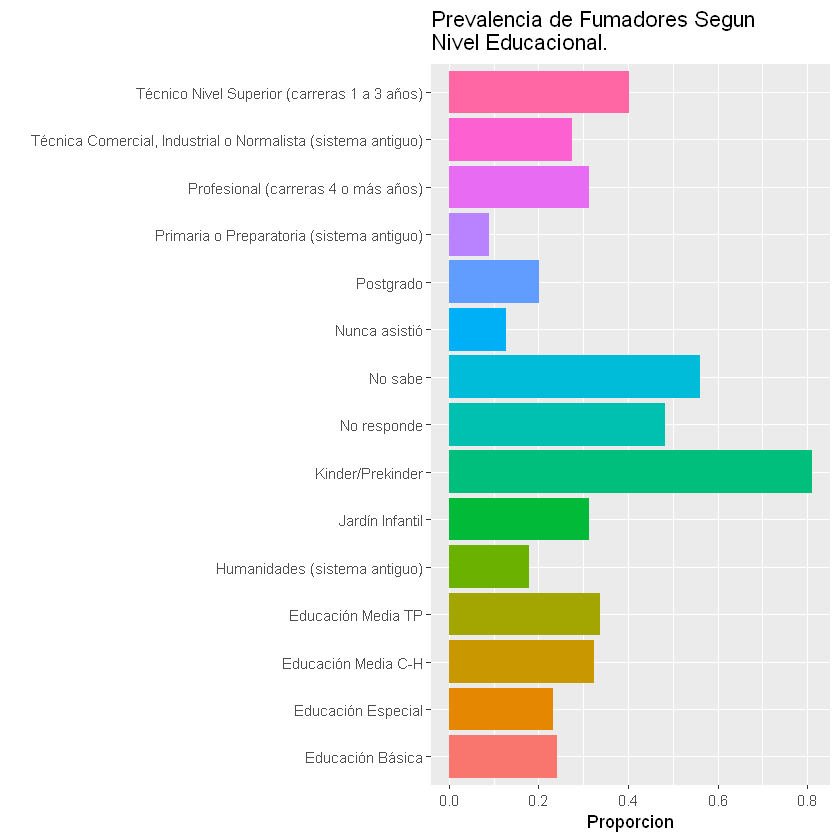

In [175]:
ggplot(fumadores_educacion,aes(x = `Nivel Educacional`, y = `Proporcion de Fumadores Segun Nivel Educacional`
                               ,fill=`Nivel Educacional`)) +  
  theme(legend.position = "none")+ scale_fill_manual(values=c(color_region))+ 
  geom_bar(stat = "identity",position = 'dodge')+  coord_flip() +
  labs(title =paste( "Prevalencia de Fumadores Segun \nNivel Educacional."),y='Proporcion',x='')